In [9]:
from project_paths import *

import pandas as pd
import numpy as np
import math
import matplotlib
from matplotlib import pylab as plt

#### We analyze the target variable to understand its distribution and set a cut off for popularity

In [10]:
# read the data
df = pd.read_csv(working_data_csv)
print("Row count:", df.shape[0], "Column count:", df.shape[1])

# Creating some dictionaries for ease of visualization
nunique_dict = {c:df[c].nunique() for c in df.columns}
desc_dict = pd.read_csv(features_list).set_index("features").to_dict()["descriptions"]

Row count: 39644 Column count: 61


In [11]:
var = 'shares'

print("Variable:", var)
print("Data description:", desc_dict[var])
print("Unique value count:", df[var].nunique())
print("Feature Describe:")
print(df[var].describe())


Variable: shares
Data description: Number of shares (target)
Unique value count: 1454
Feature Describe:
count     39644.000000
mean       3395.380184
std       11626.950749
min           1.000000
25%         946.000000
50%        1400.000000
75%        2800.000000
max      843300.000000
Name: shares, dtype: float64


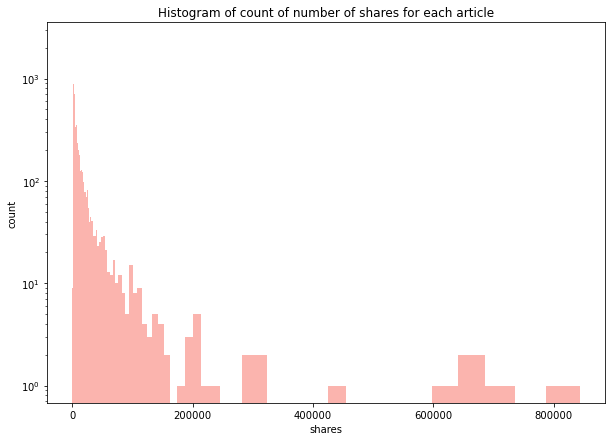

In [5]:
# df[var].plot.hist(log=True, bins = np.logspace(np.log10(1),np.log10(np.max(df[var])),200))
df[var].plot.hist(log=True, bins = np.logspace(np.log10(1),np.log10(np.max(df[var])),200), colormap='Pastel1', figsize=(10,7))
plt.xlabel(var)
plt.ylabel('count')
plt.title('Histogram of count of number of shares for each article')
# plt.show()
plt.rcParams["figure.dpi"] = 300
plt.savefig(figures_dir + '2_y_histogram.png')

We can see that the distribution of the number of shares is **highly non-linear**, since even on a log scale, the histogram of the number of shares is not linear. 
Most articles have relatively few shares, but some are extreme outliers. 

To convert this into a classification task, we must **find an appropriate cutoff for the number of shares beyond which we will call the articles 'popular'**. 
We can do this by trying different thresholds and seeing how it splits the dataset.

In [6]:
def view_threshold_breakdown(var_col):
    print(var_col.value_counts())
    pd.value_counts(var_col, normalize=True).loc[[0, 1]].plot.bar()
    plt.ylabel('fraction')
    plt.show()

In [7]:
thresholds = np.logspace(start=2, stop=math.ceil(np.log10(df[var].max()/10)), num=60, endpoint=True, base=10.0)

Threshold Value: 100.0
1    39557
0       87
Name: shares, dtype: int64


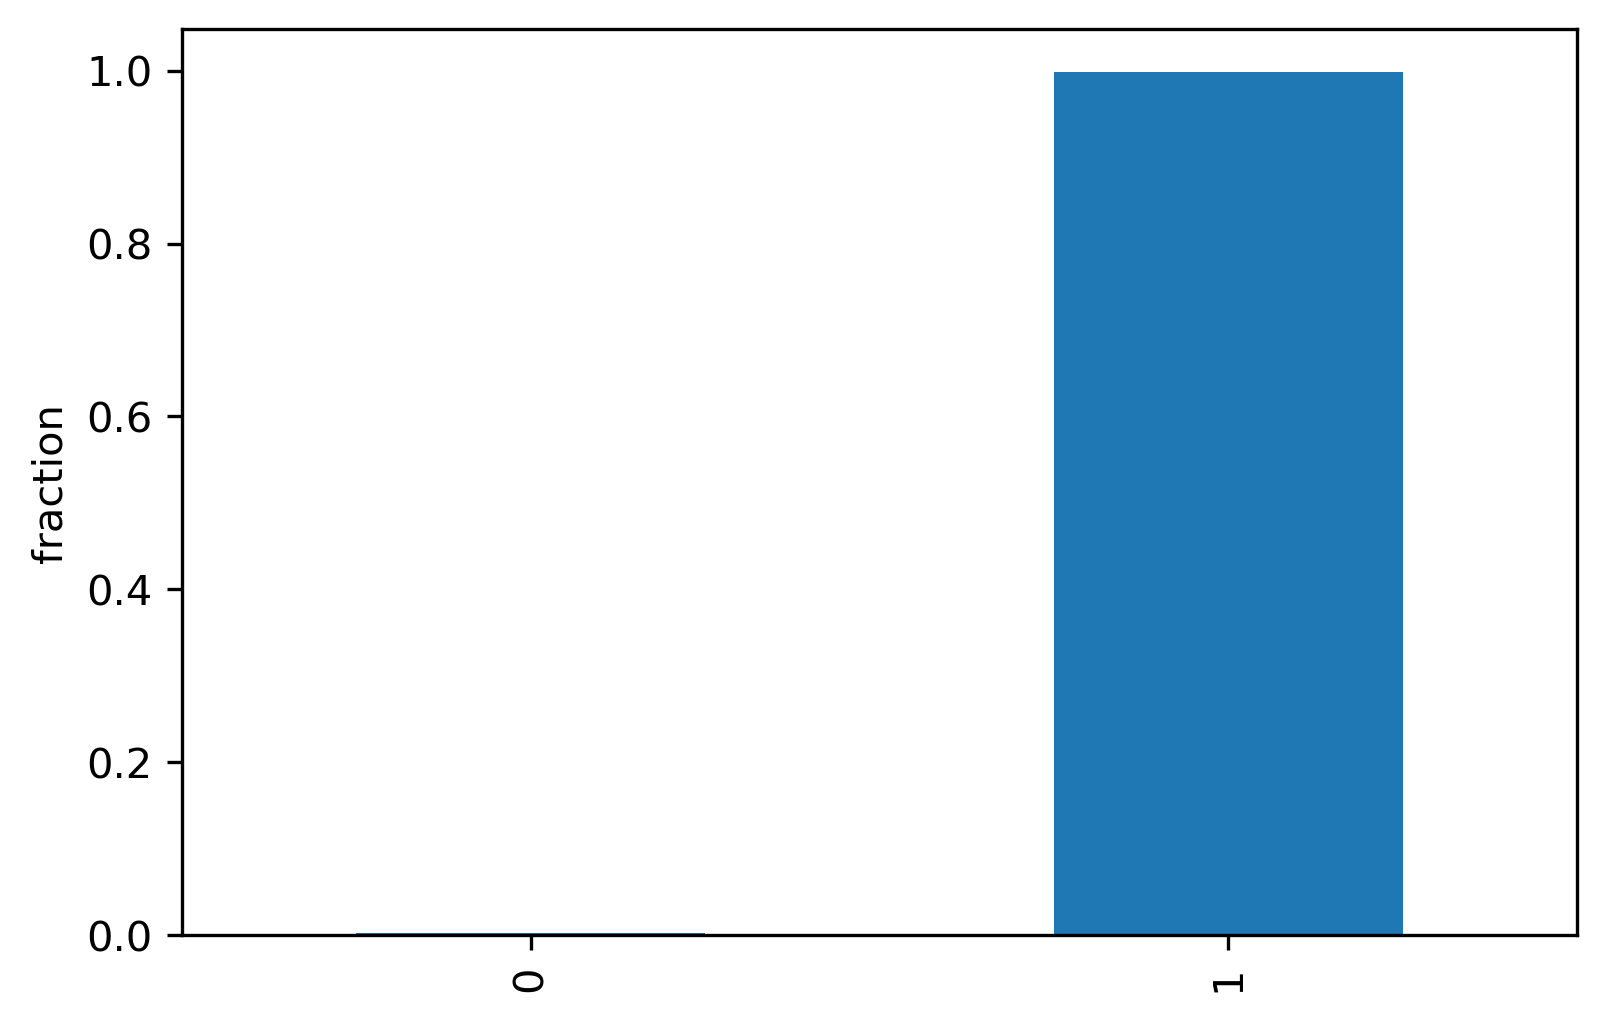

Threshold Value: 112.42100350620862
1    39546
0       98
Name: shares, dtype: int64


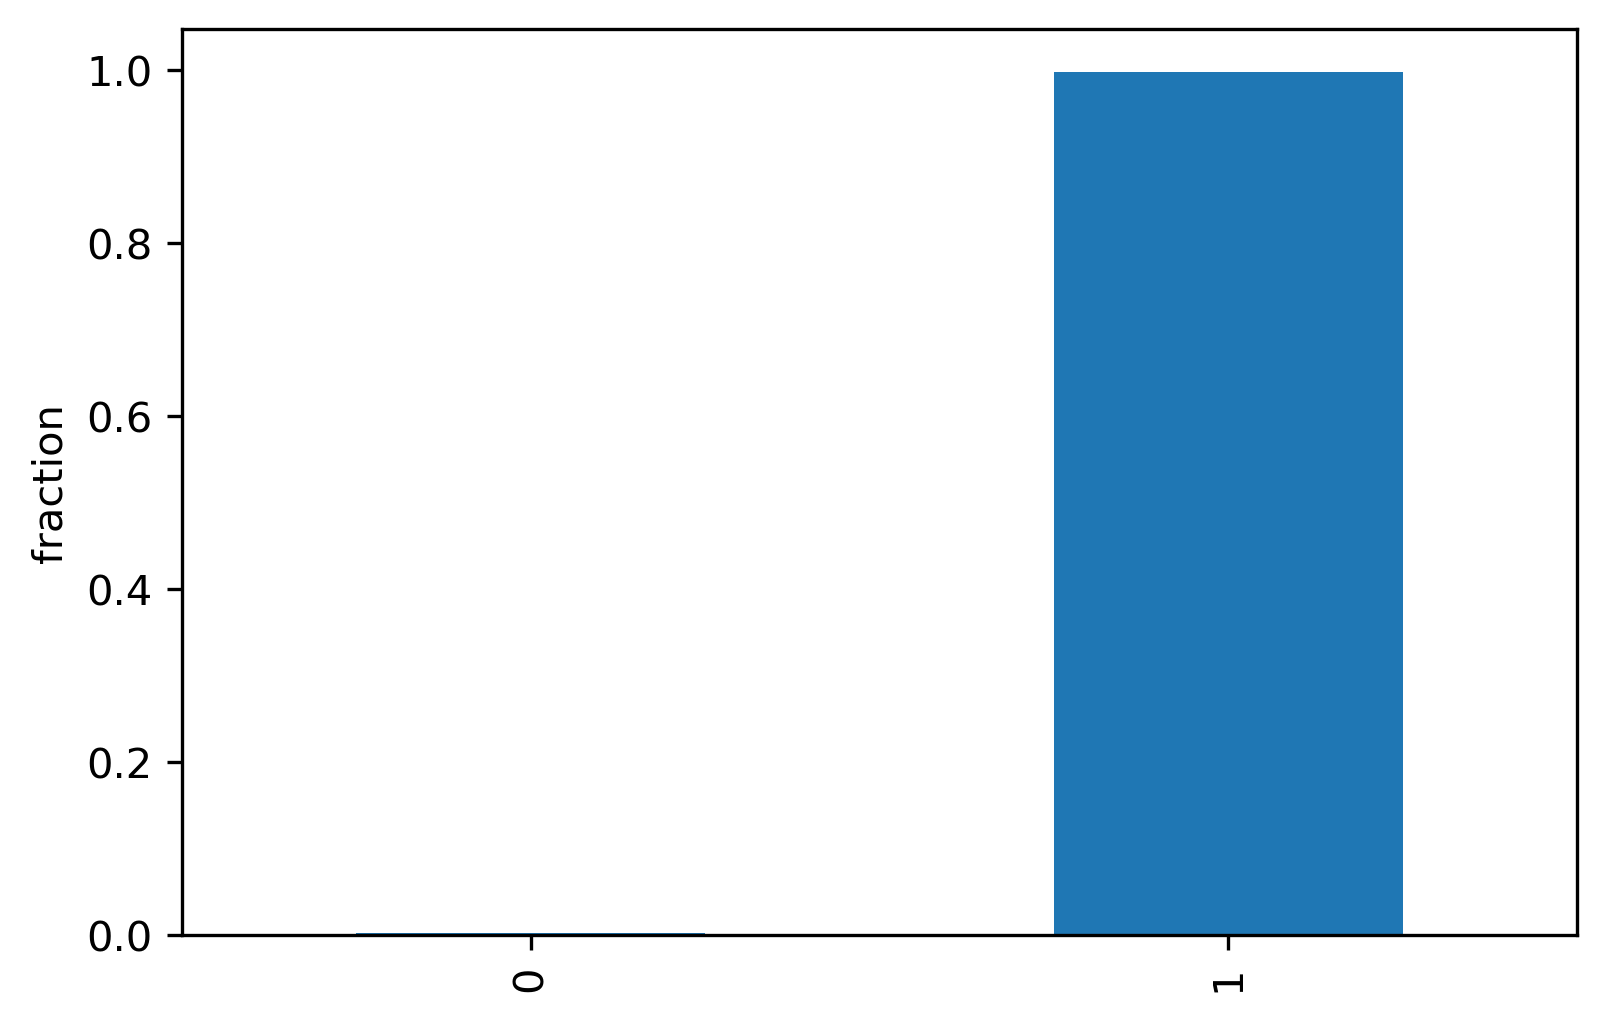

Threshold Value: 126.38482029342984
1    39534
0      110
Name: shares, dtype: int64


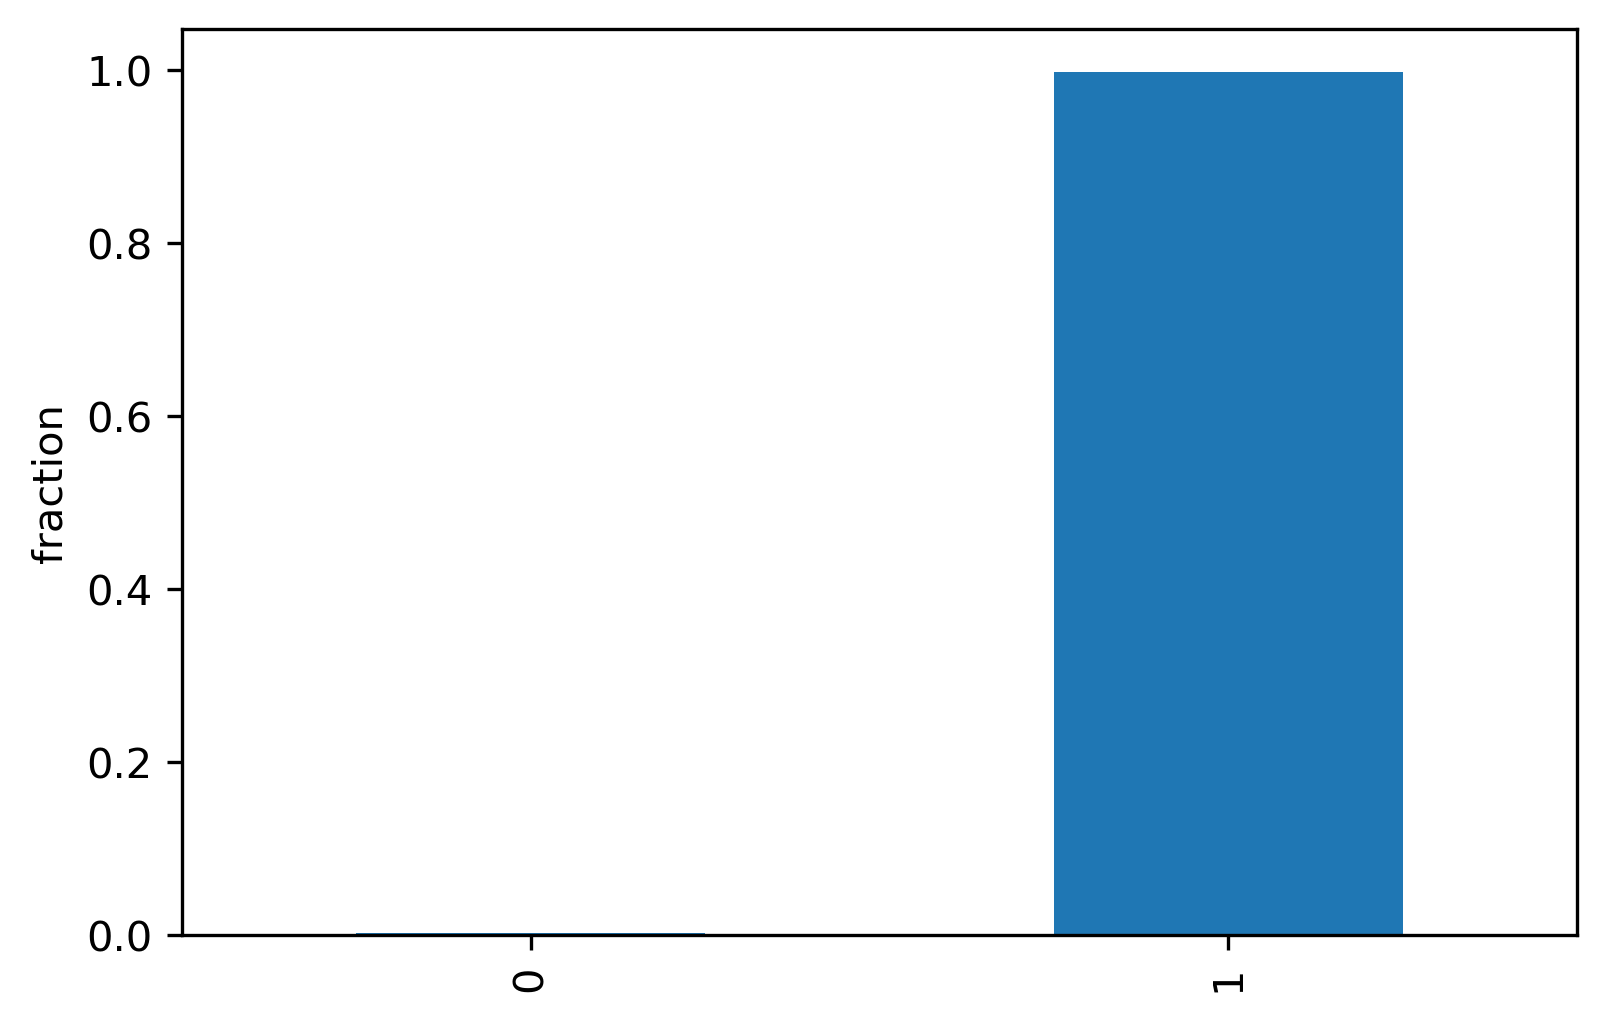

Threshold Value: 142.08308325339223
1    39520
0      124
Name: shares, dtype: int64


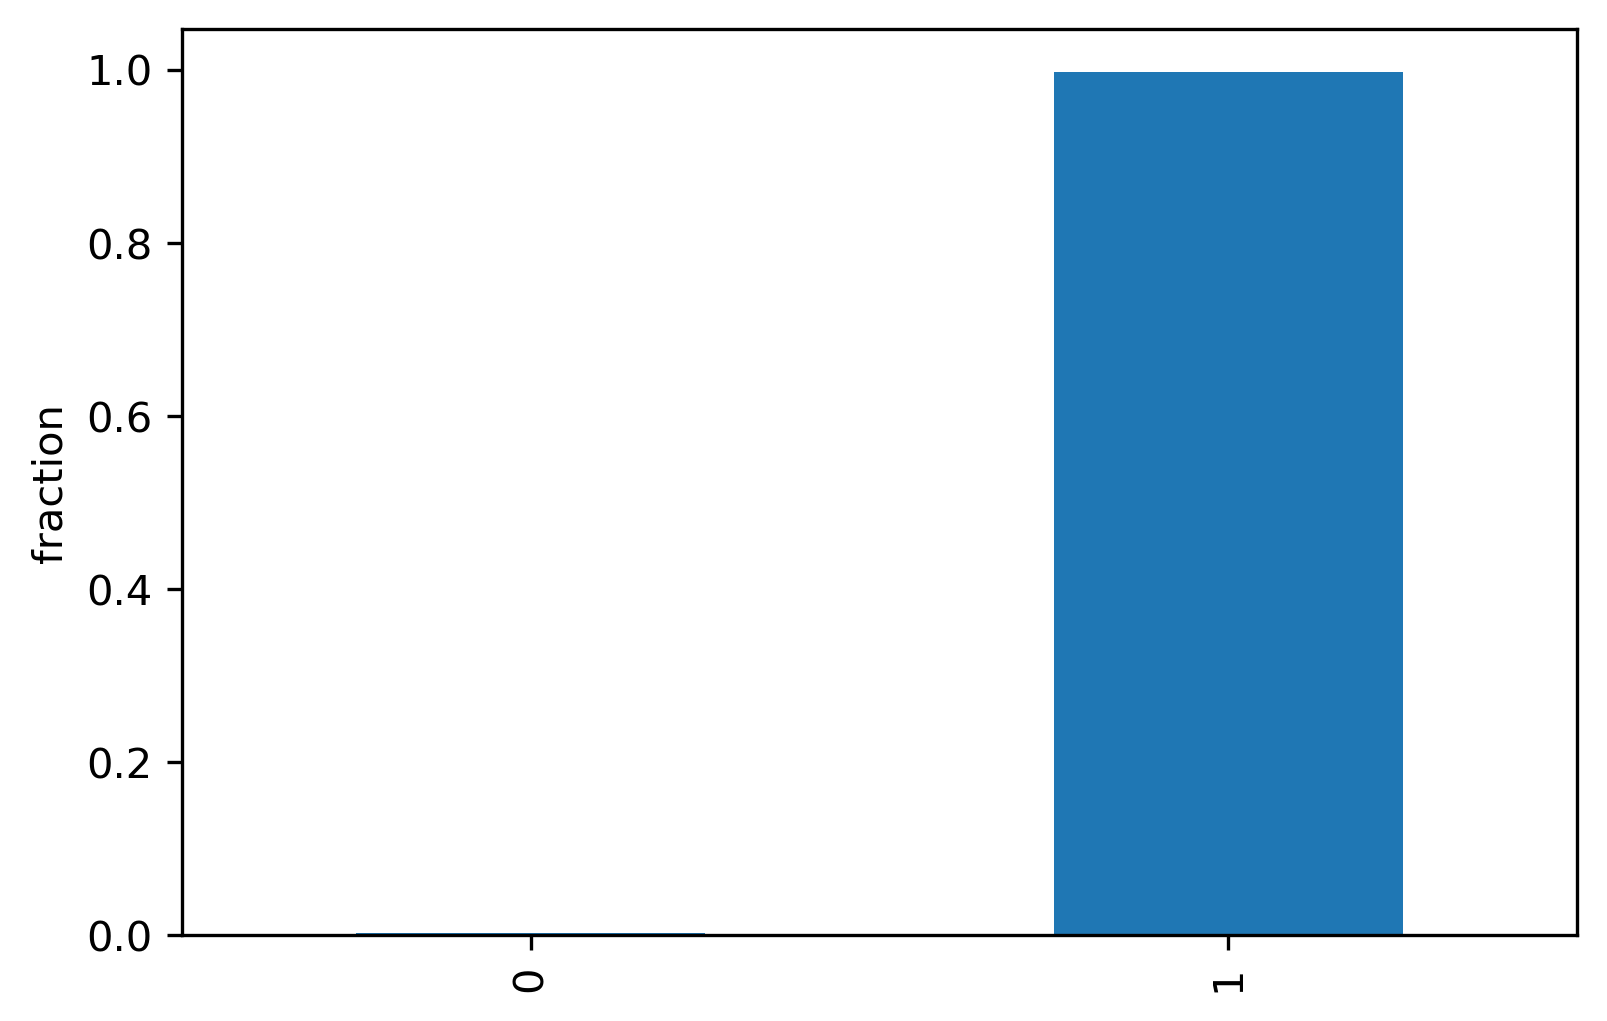

Threshold Value: 159.7312280060254
1    39507
0      137
Name: shares, dtype: int64


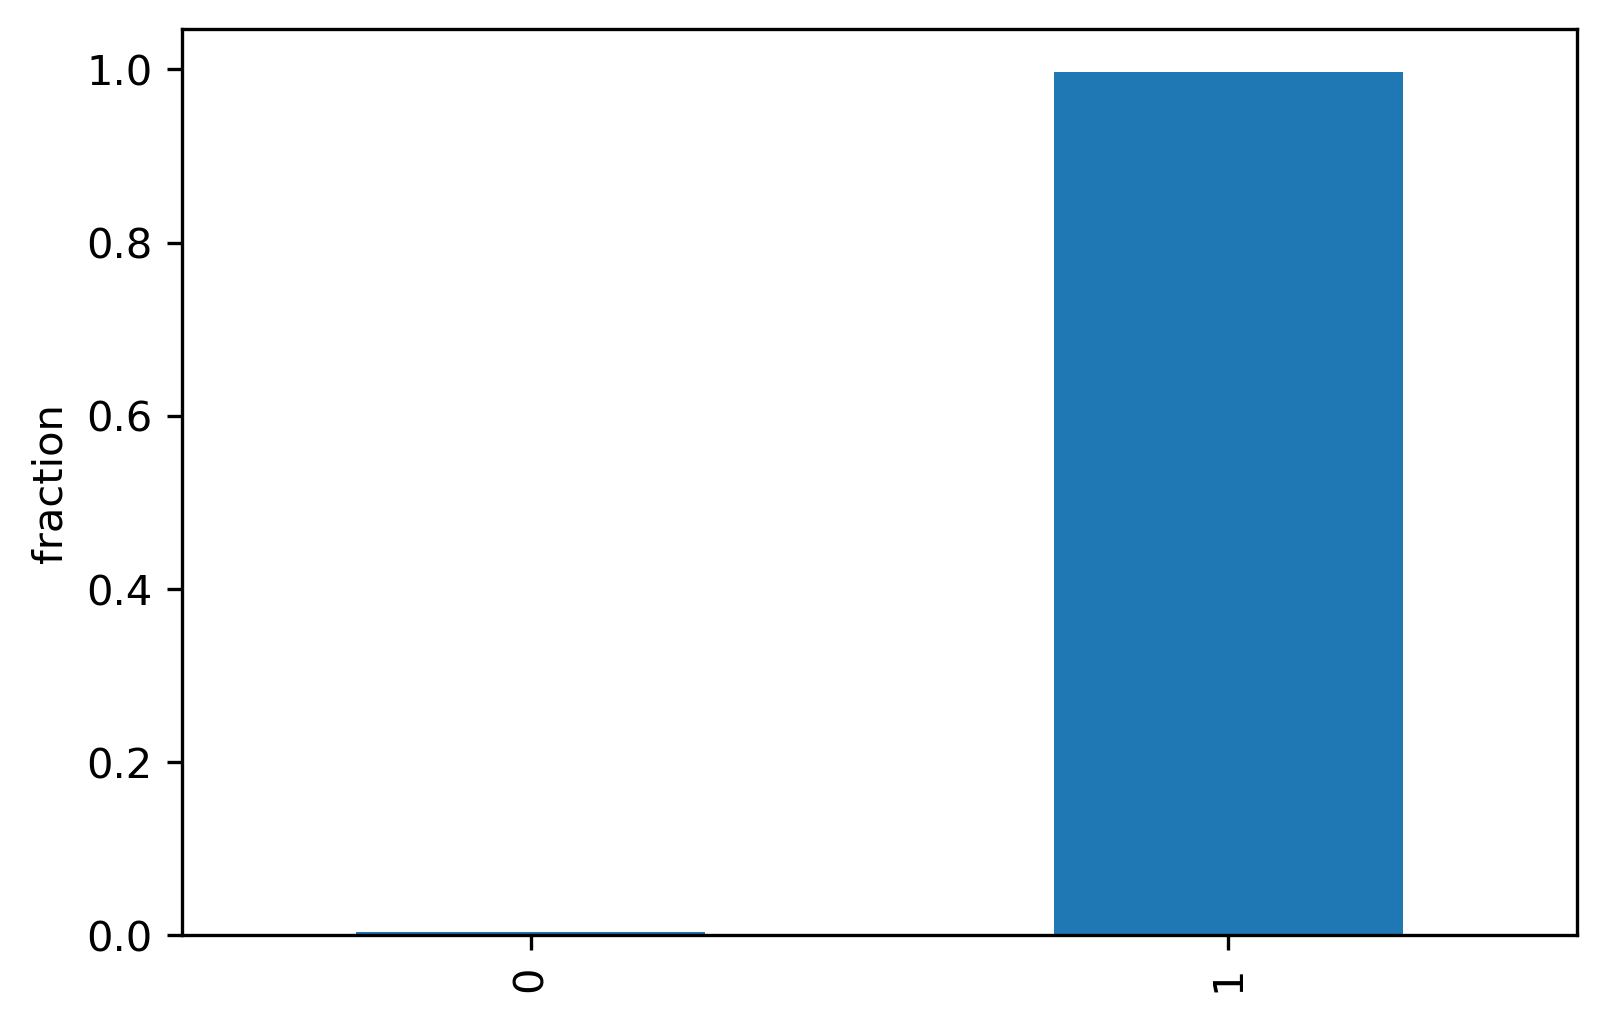

Threshold Value: 179.5714494371641
1    39493
0      151
Name: shares, dtype: int64


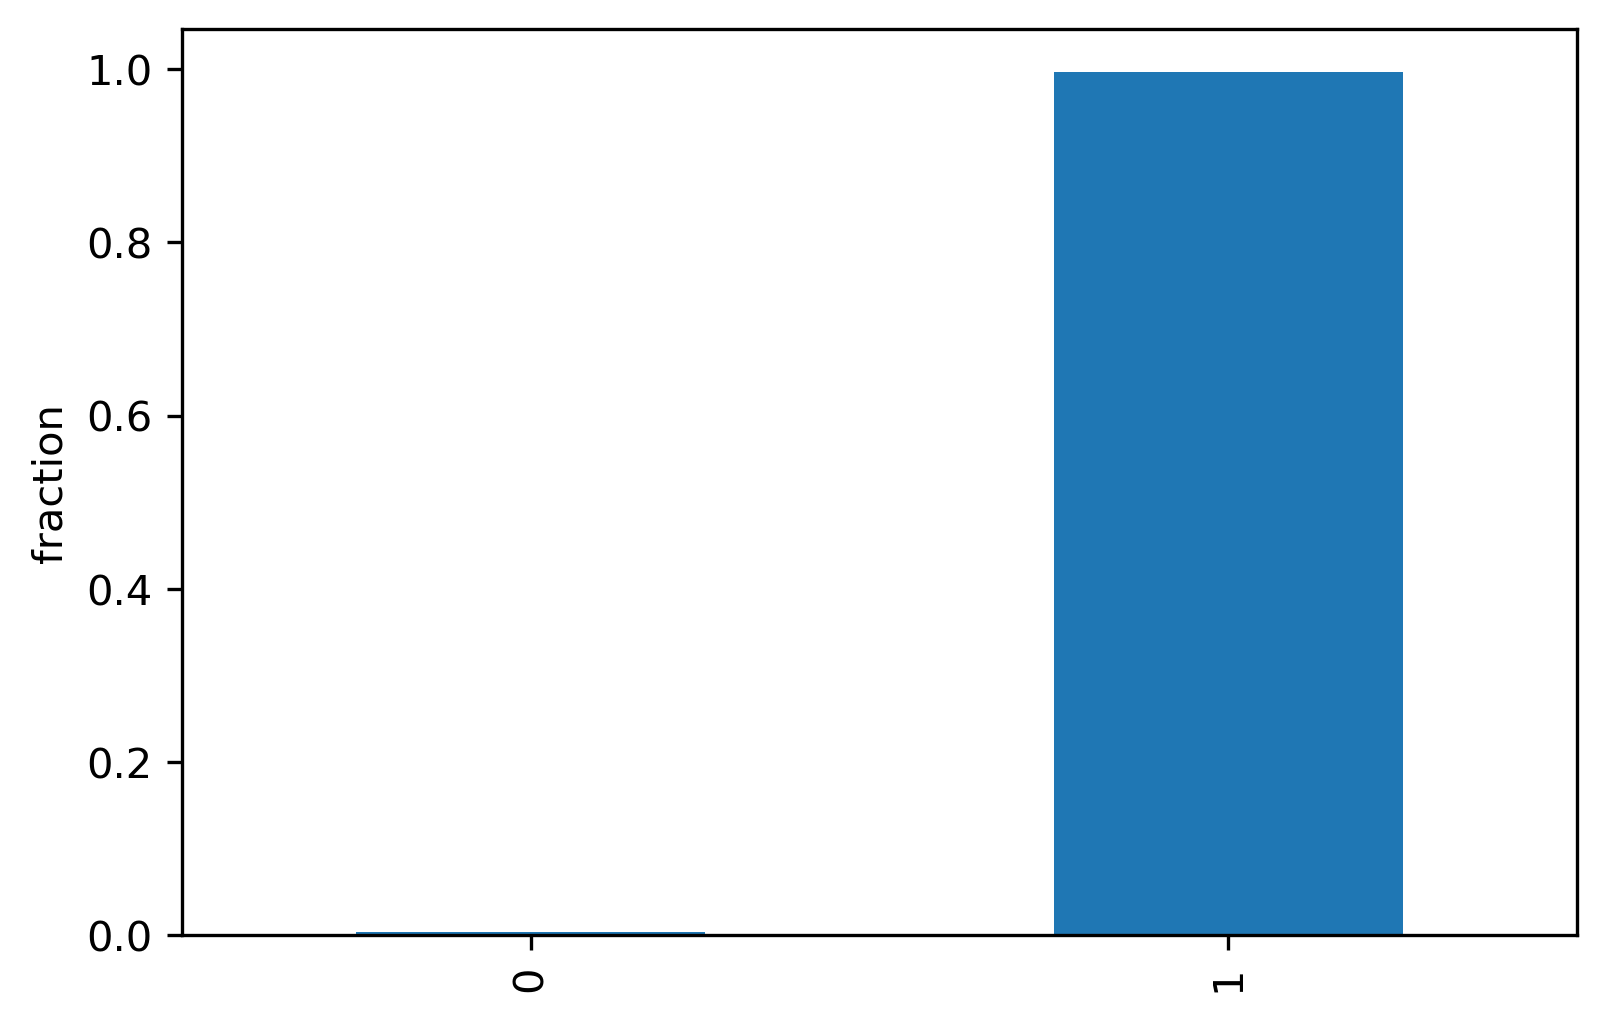

Threshold Value: 201.8760254679039
1    39475
0      169
Name: shares, dtype: int64


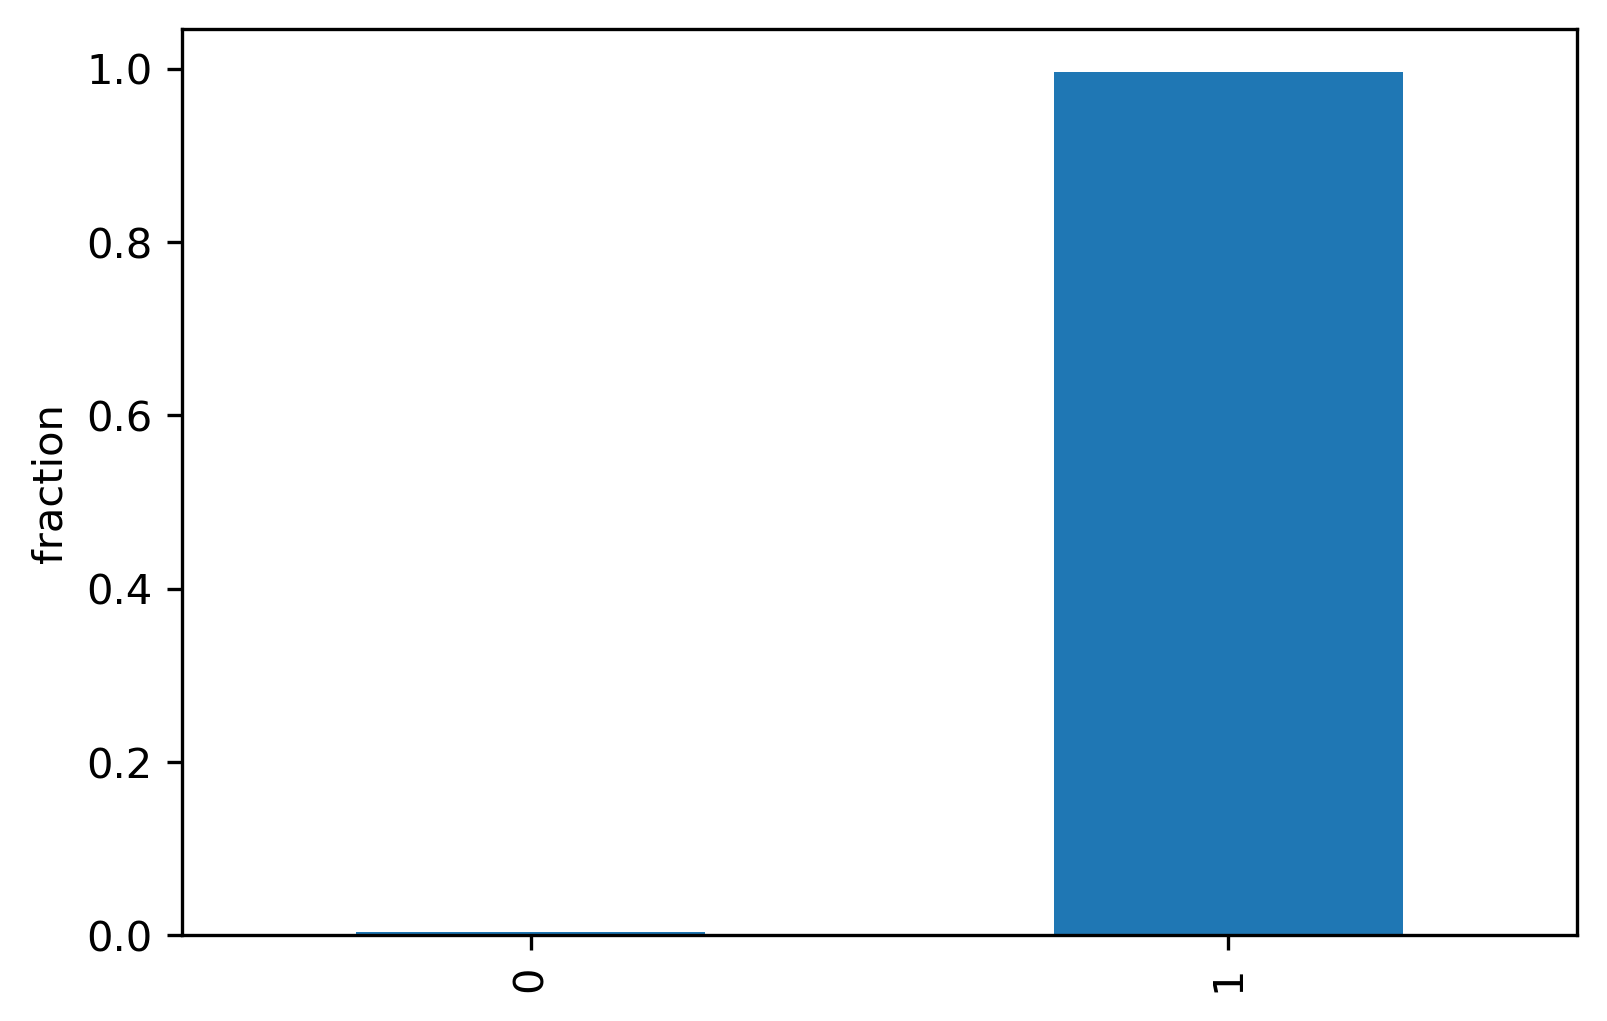

Threshold Value: 226.95105366946683
1    39448
0      196
Name: shares, dtype: int64


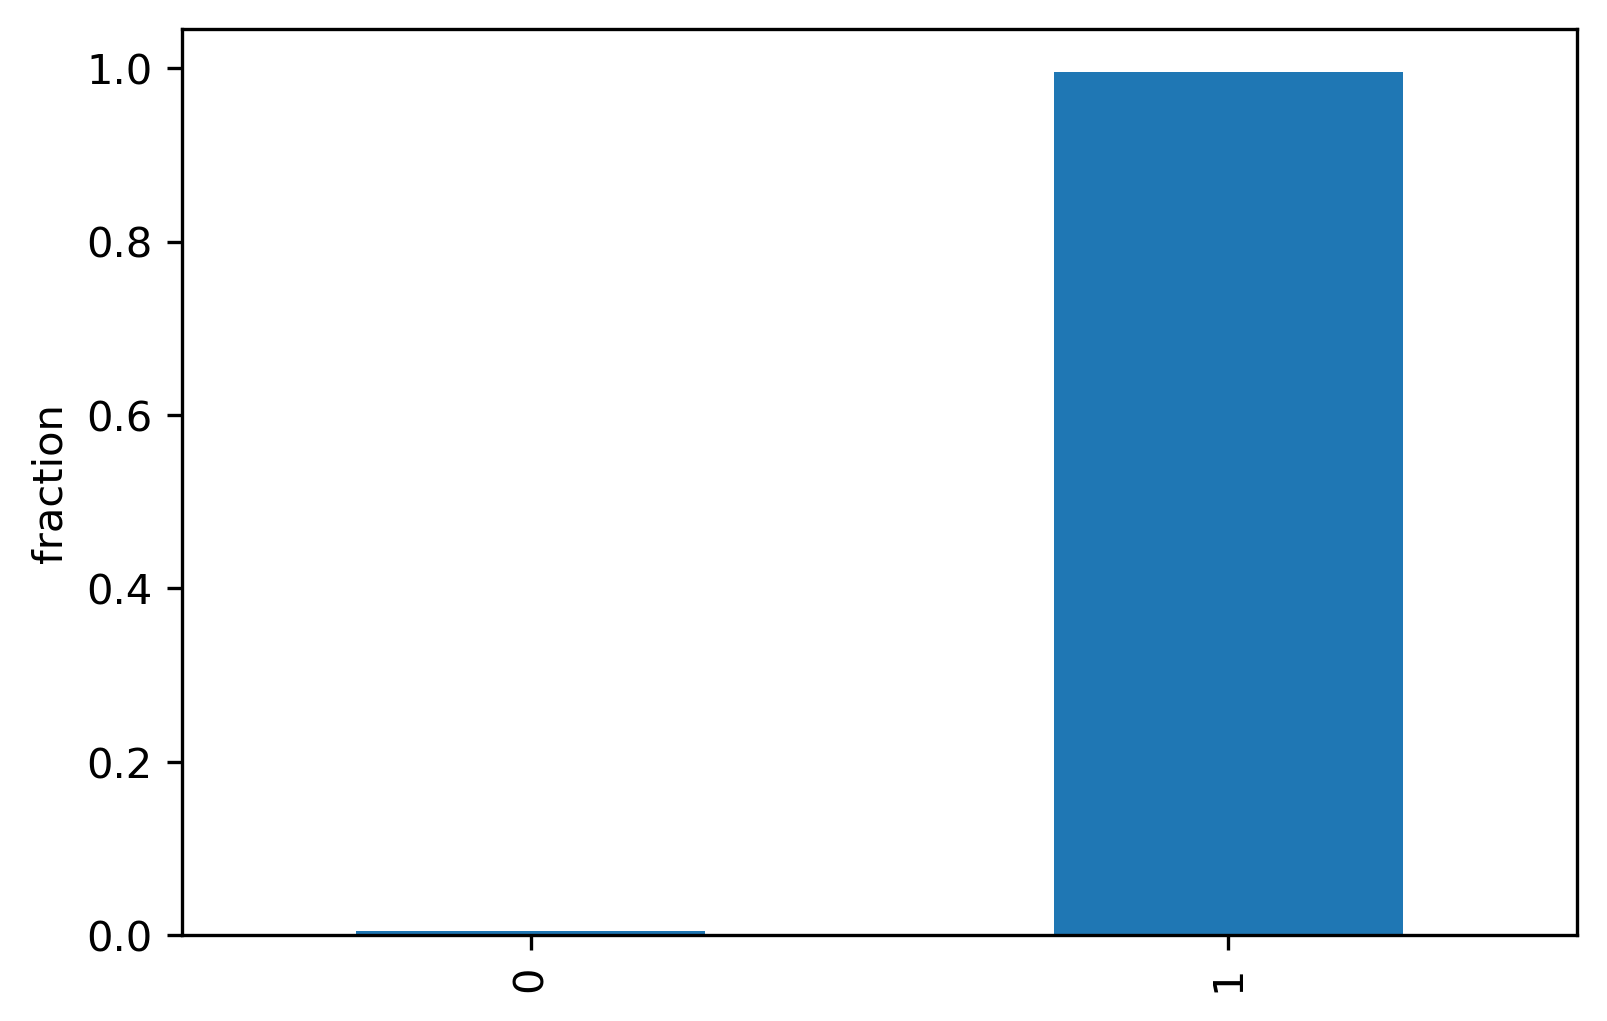

Threshold Value: 255.14065200312874
1    39419
0      225
Name: shares, dtype: int64


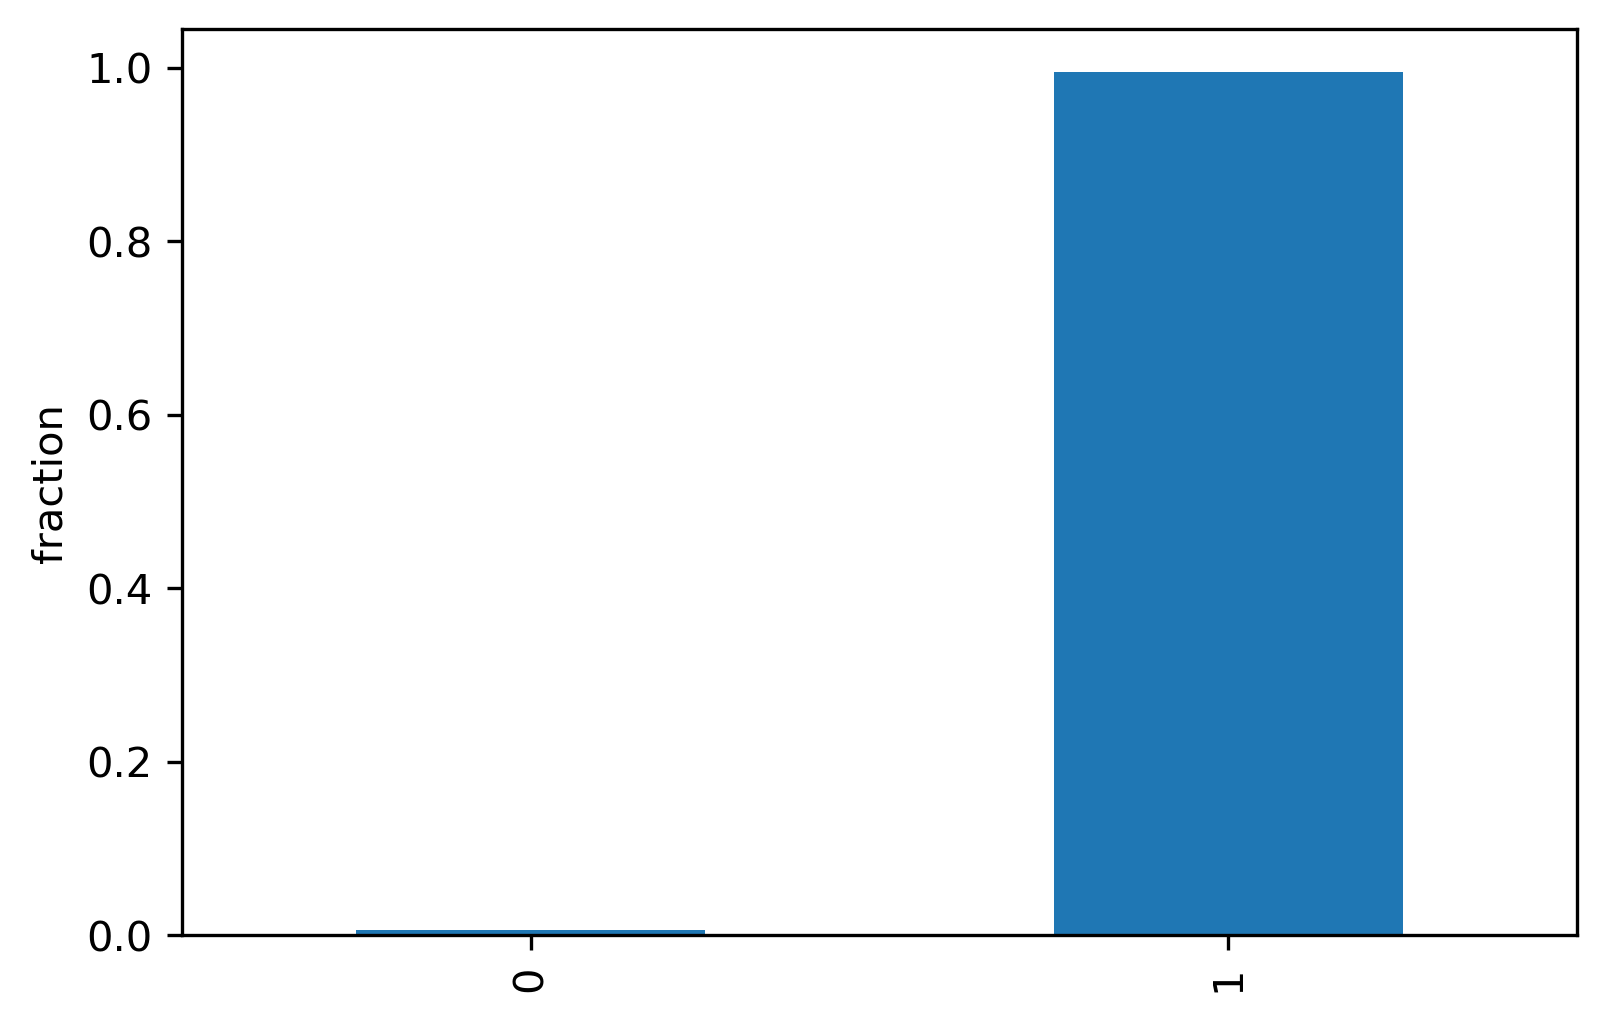

Threshold Value: 286.83168133420116
1    39392
0      252
Name: shares, dtype: int64


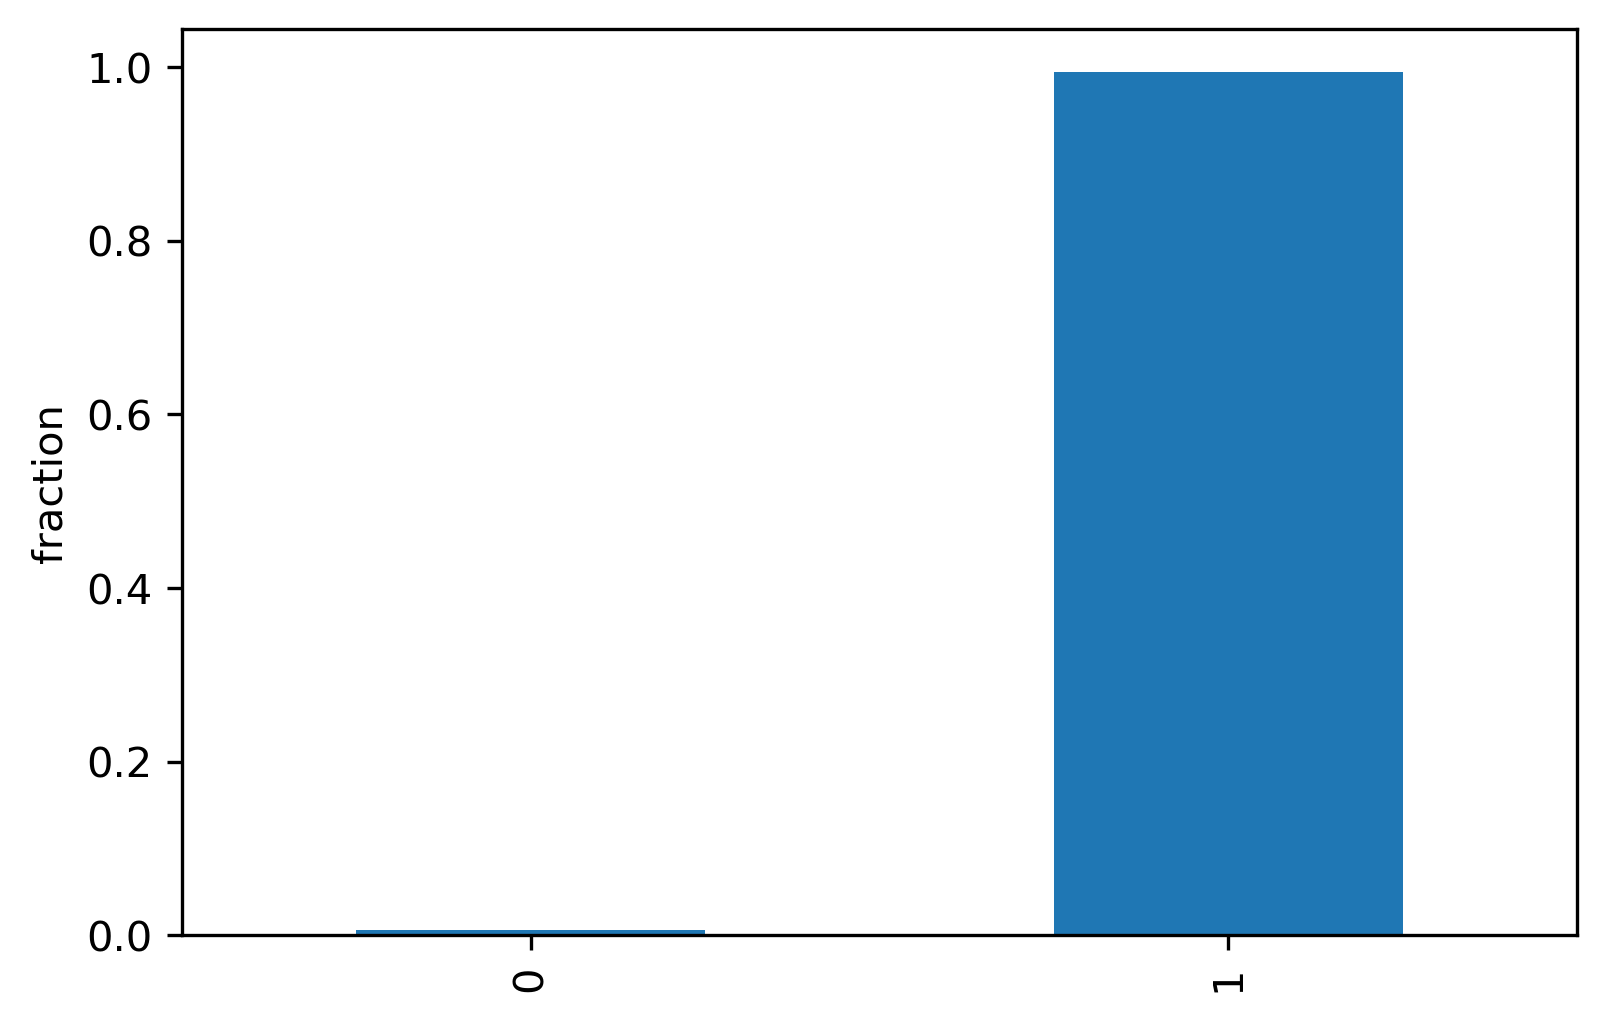

Threshold Value: 322.45905452963945
1    39356
0      288
Name: shares, dtype: int64


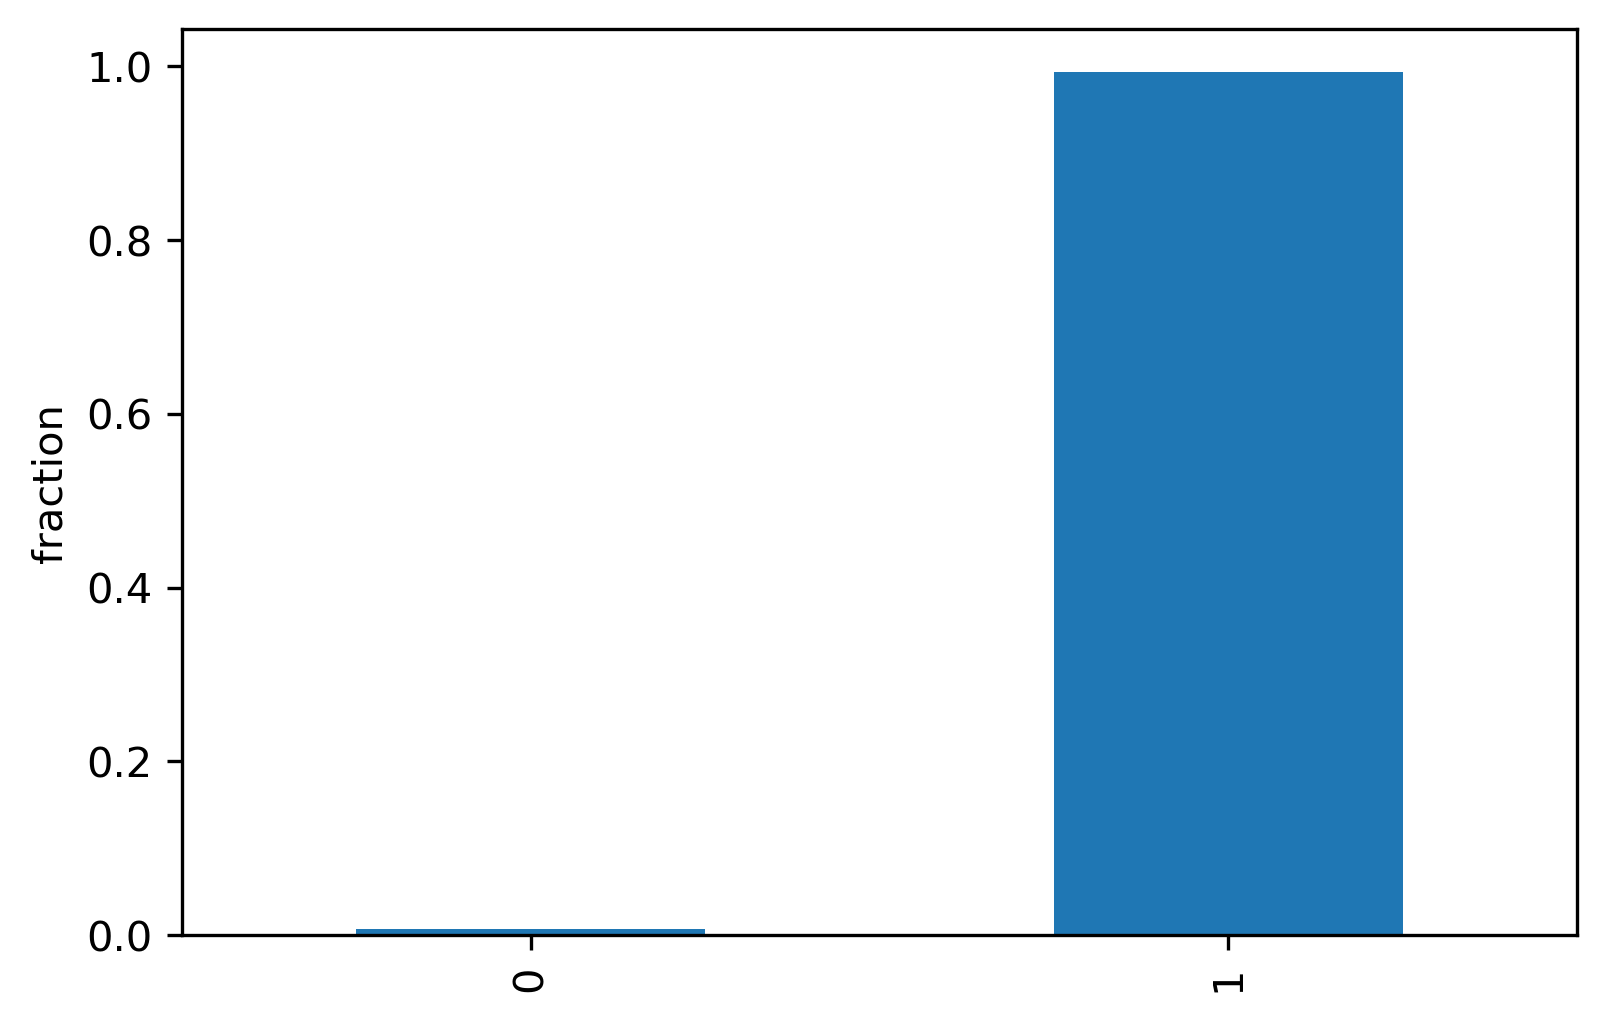

Threshold Value: 362.51170499885353
1    39296
0      348
Name: shares, dtype: int64


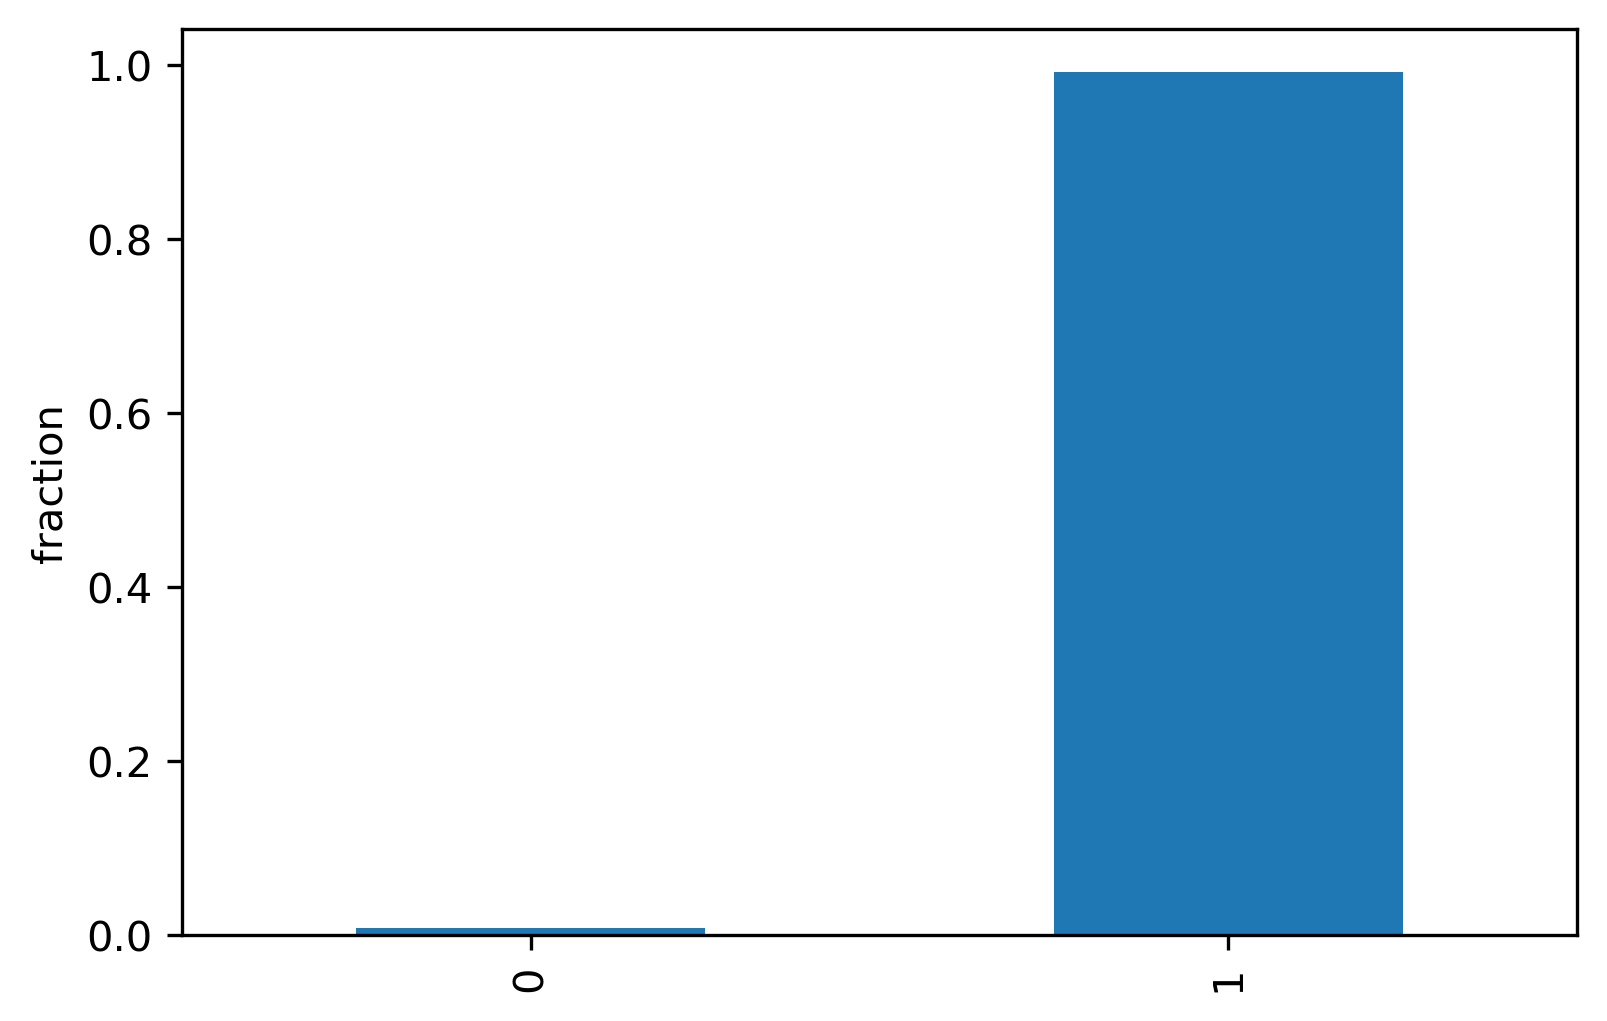

Threshold Value: 407.5392965871778
1    39150
0      494
Name: shares, dtype: int64


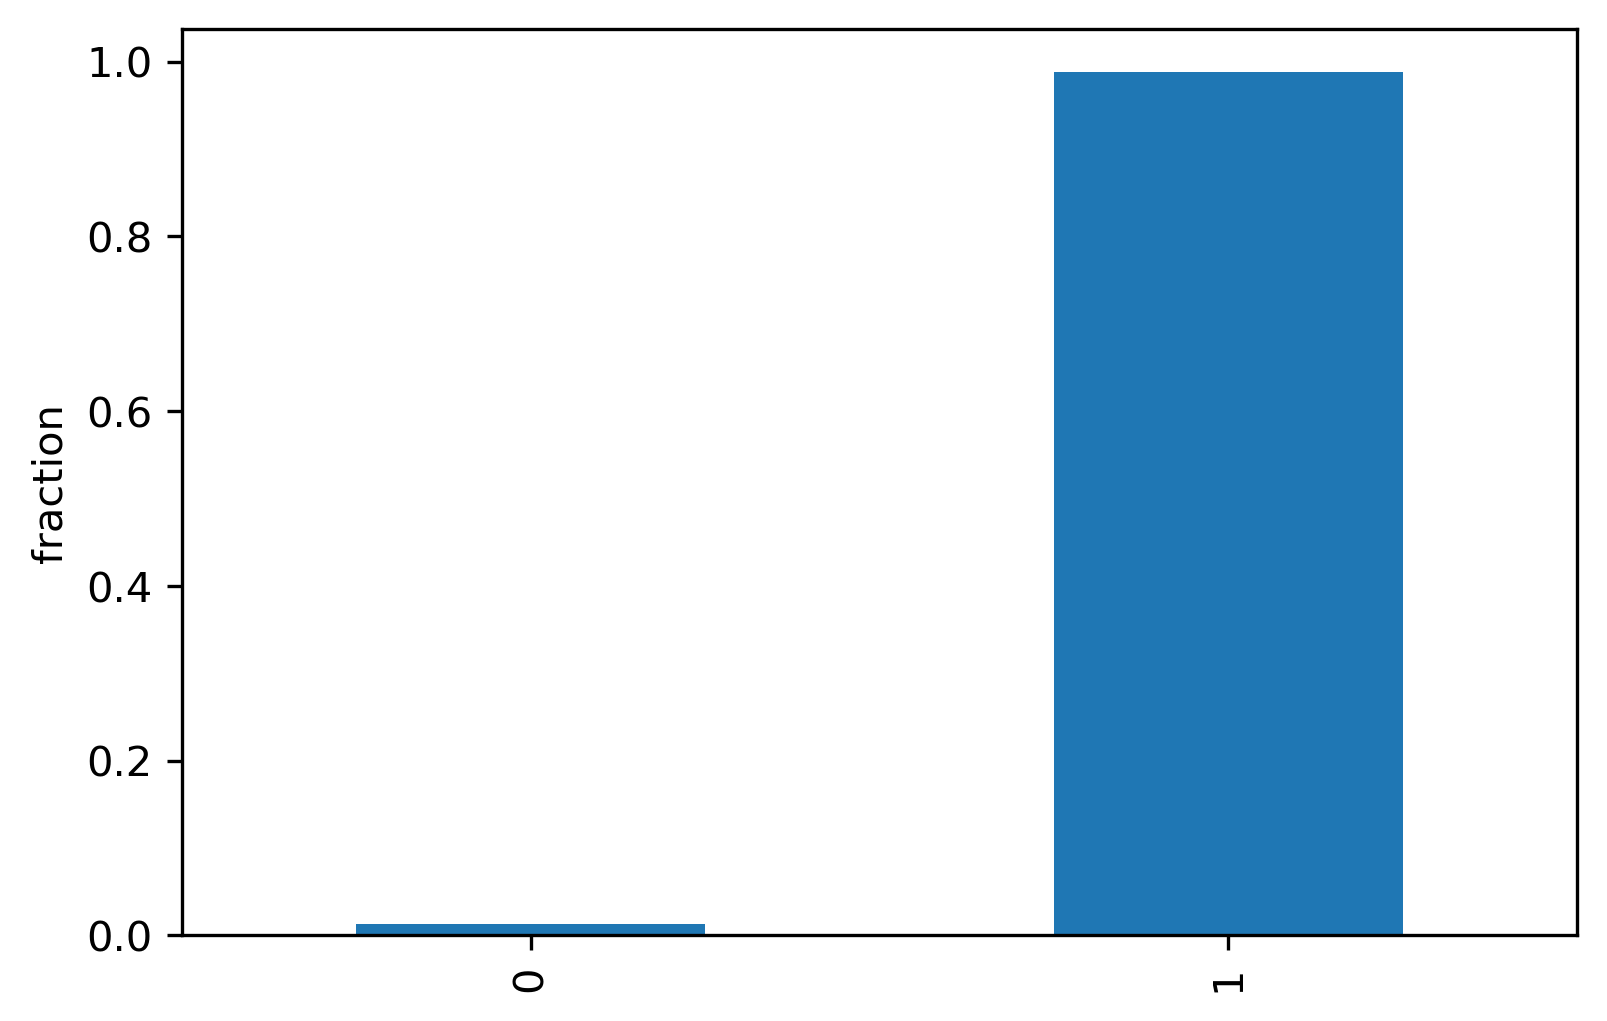

Threshold Value: 458.1597669054491
1    38886
0      758
Name: shares, dtype: int64


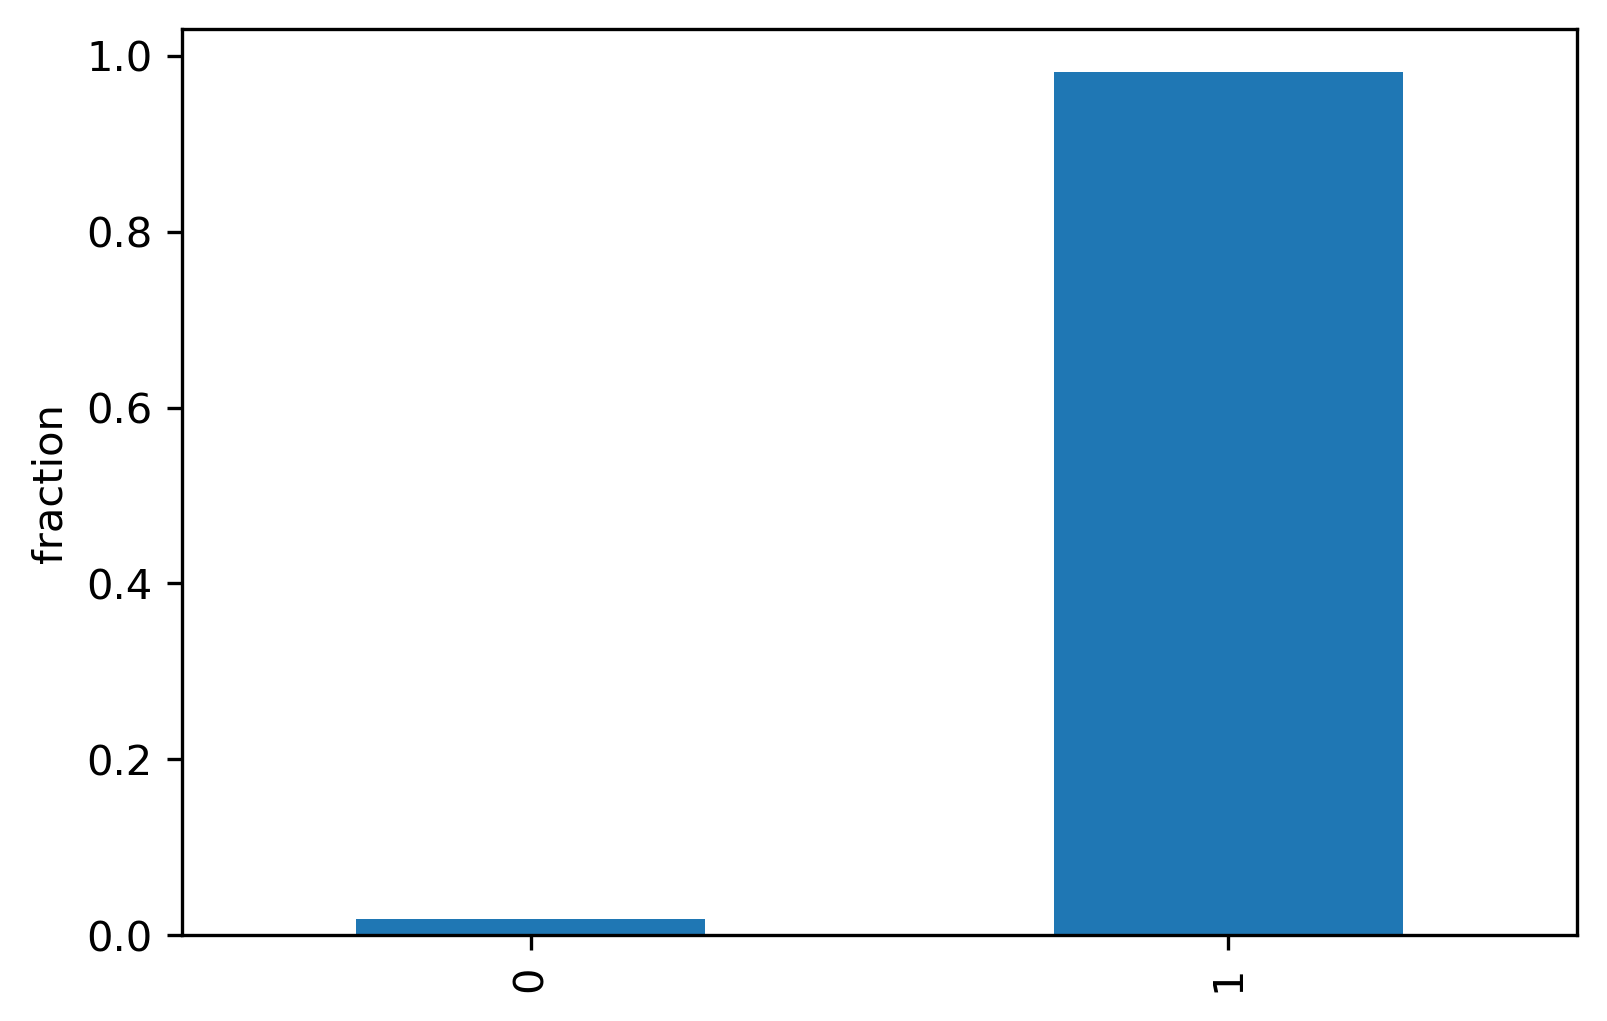

Threshold Value: 515.0678076168122
1    38440
0     1204
Name: shares, dtype: int64


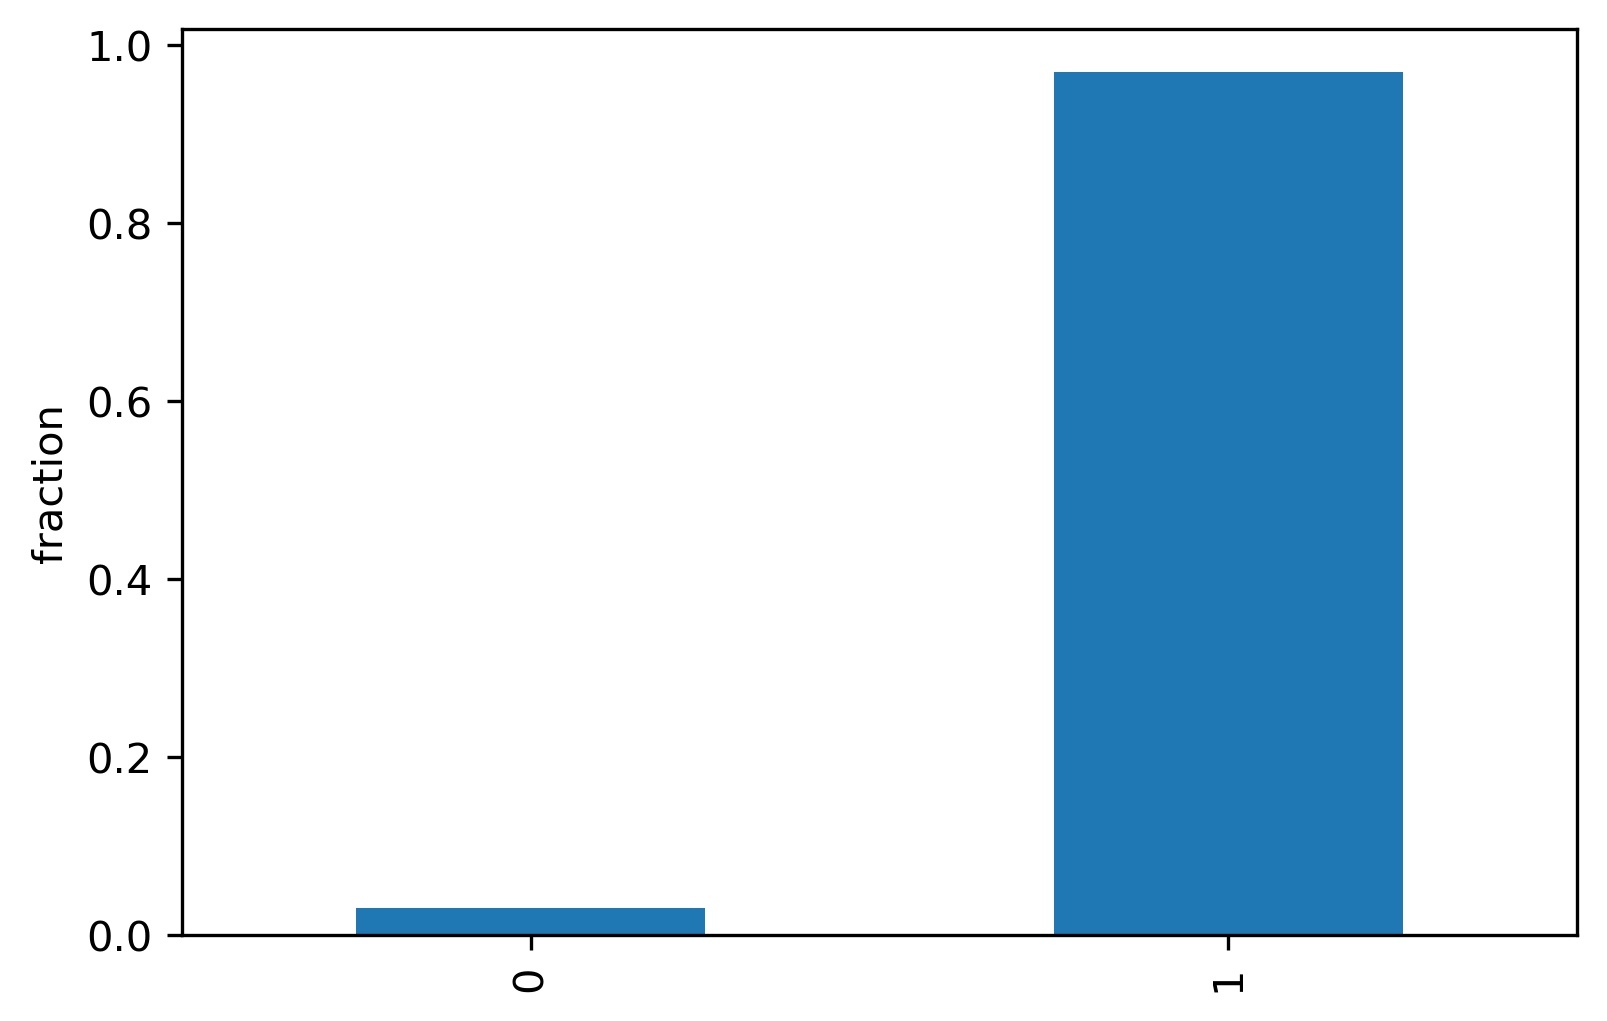

Threshold Value: 579.0443980602489
1    37723
0     1921
Name: shares, dtype: int64


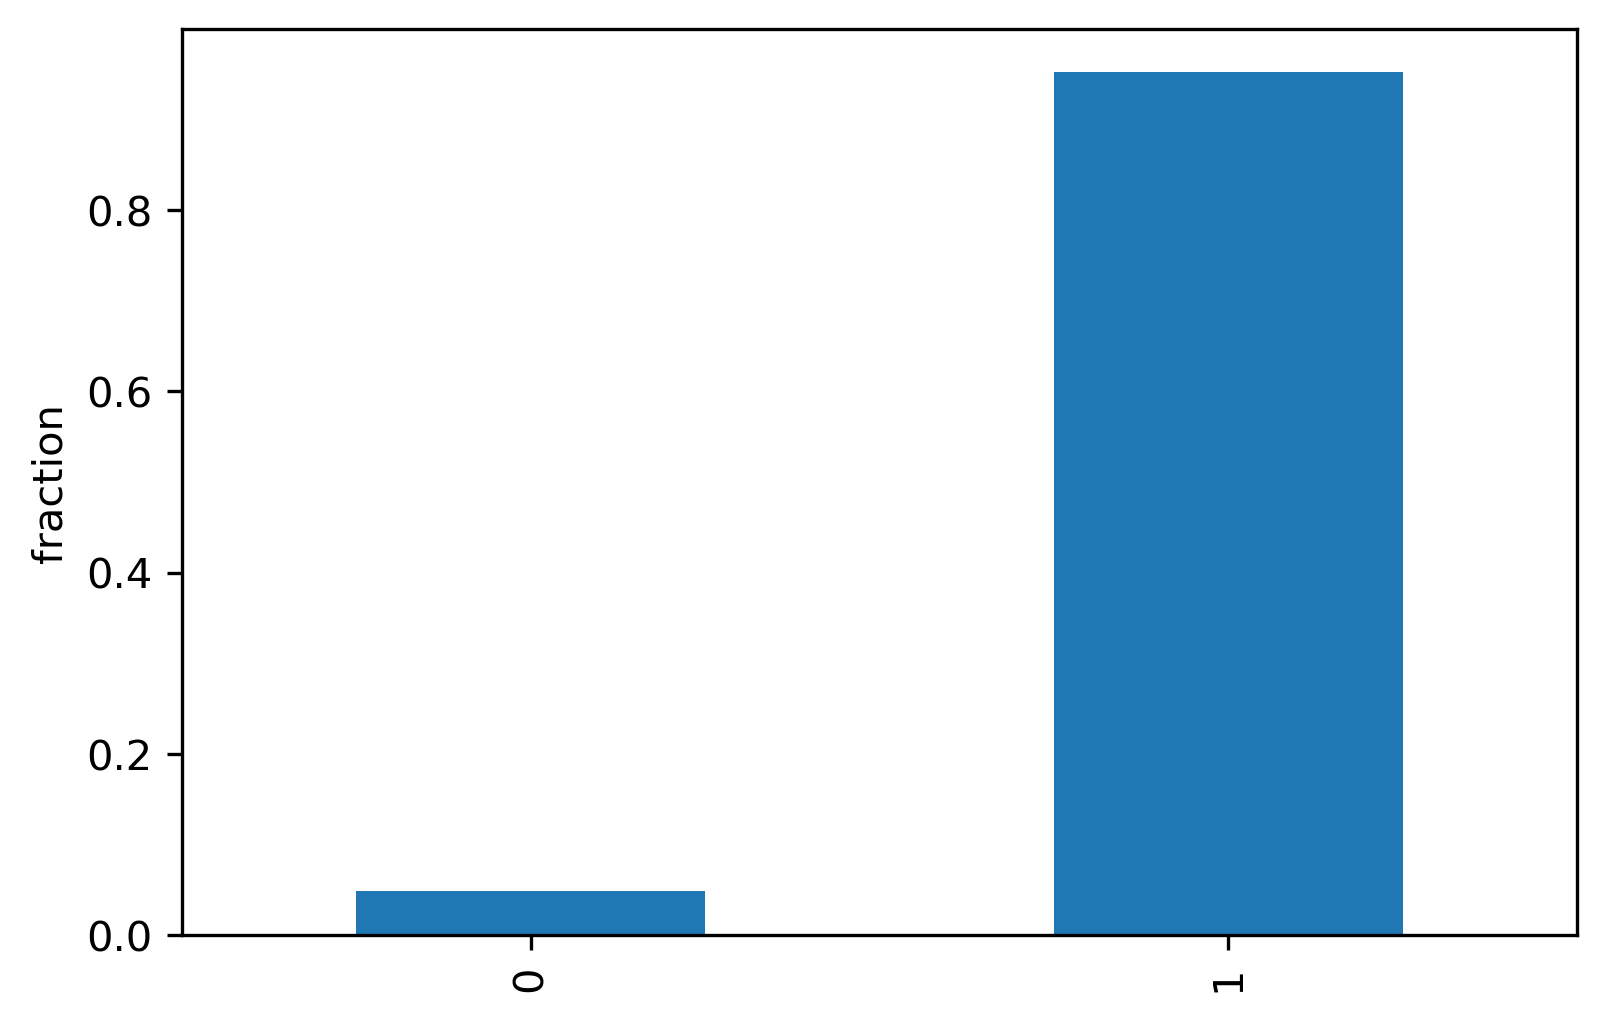

Threshold Value: 650.9675230458171
1    36725
0     2919
Name: shares, dtype: int64


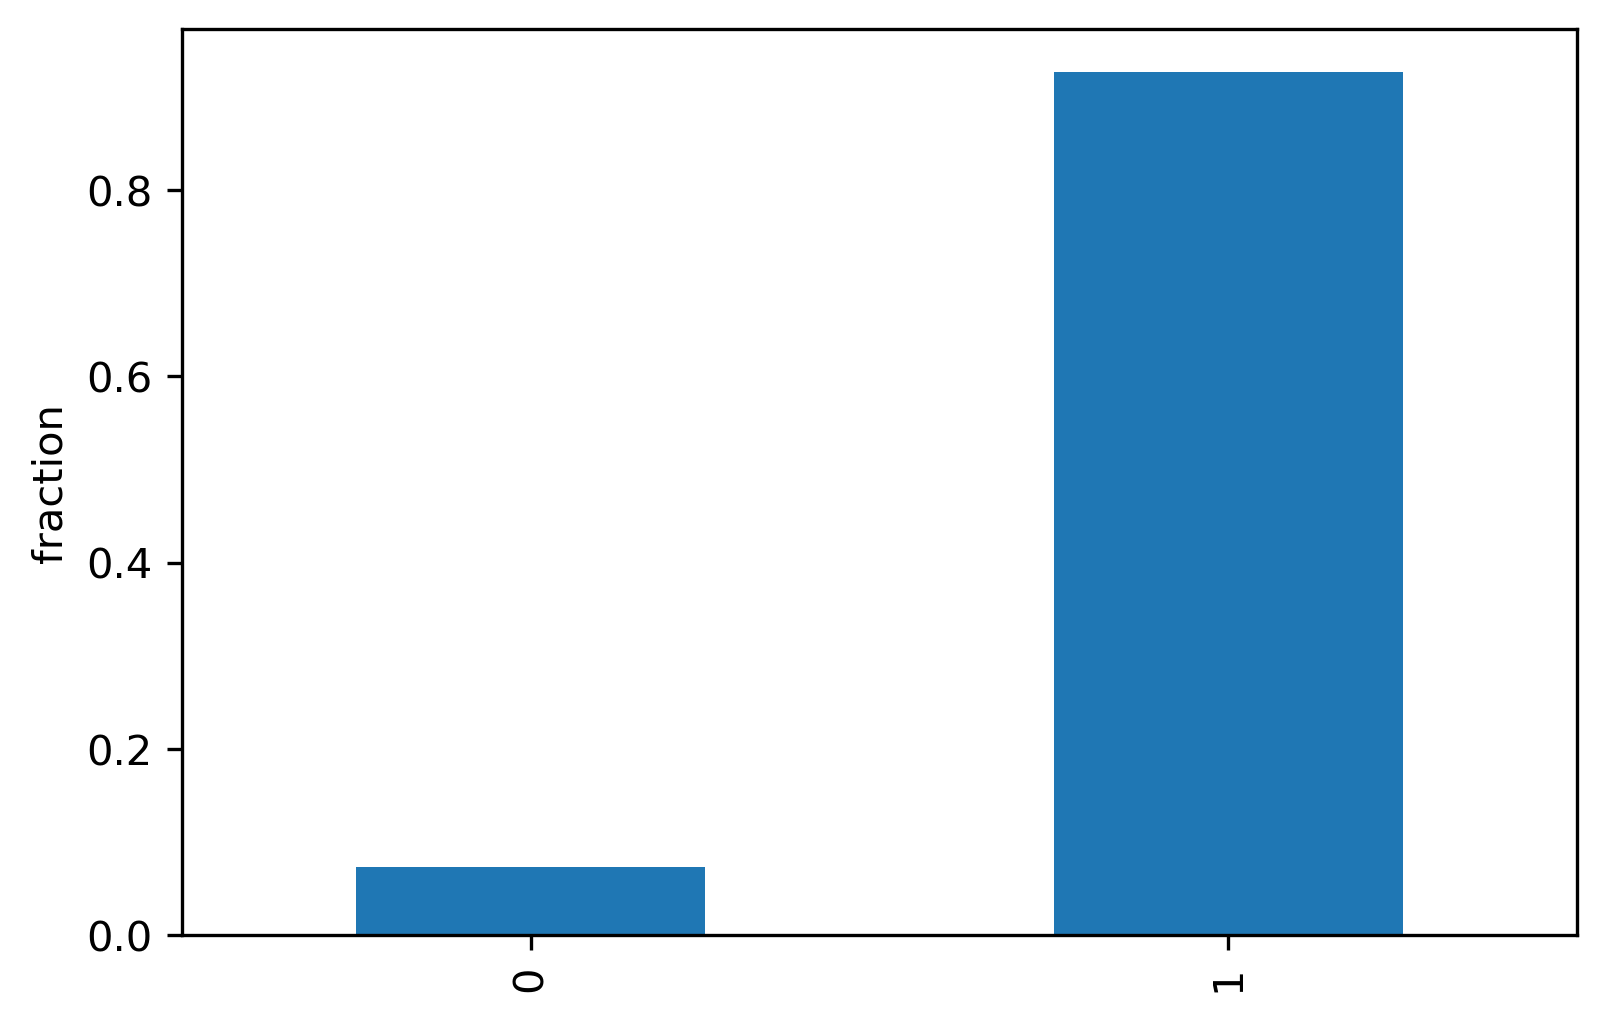

Threshold Value: 731.8242219076174
1    35127
0     4517
Name: shares, dtype: int64


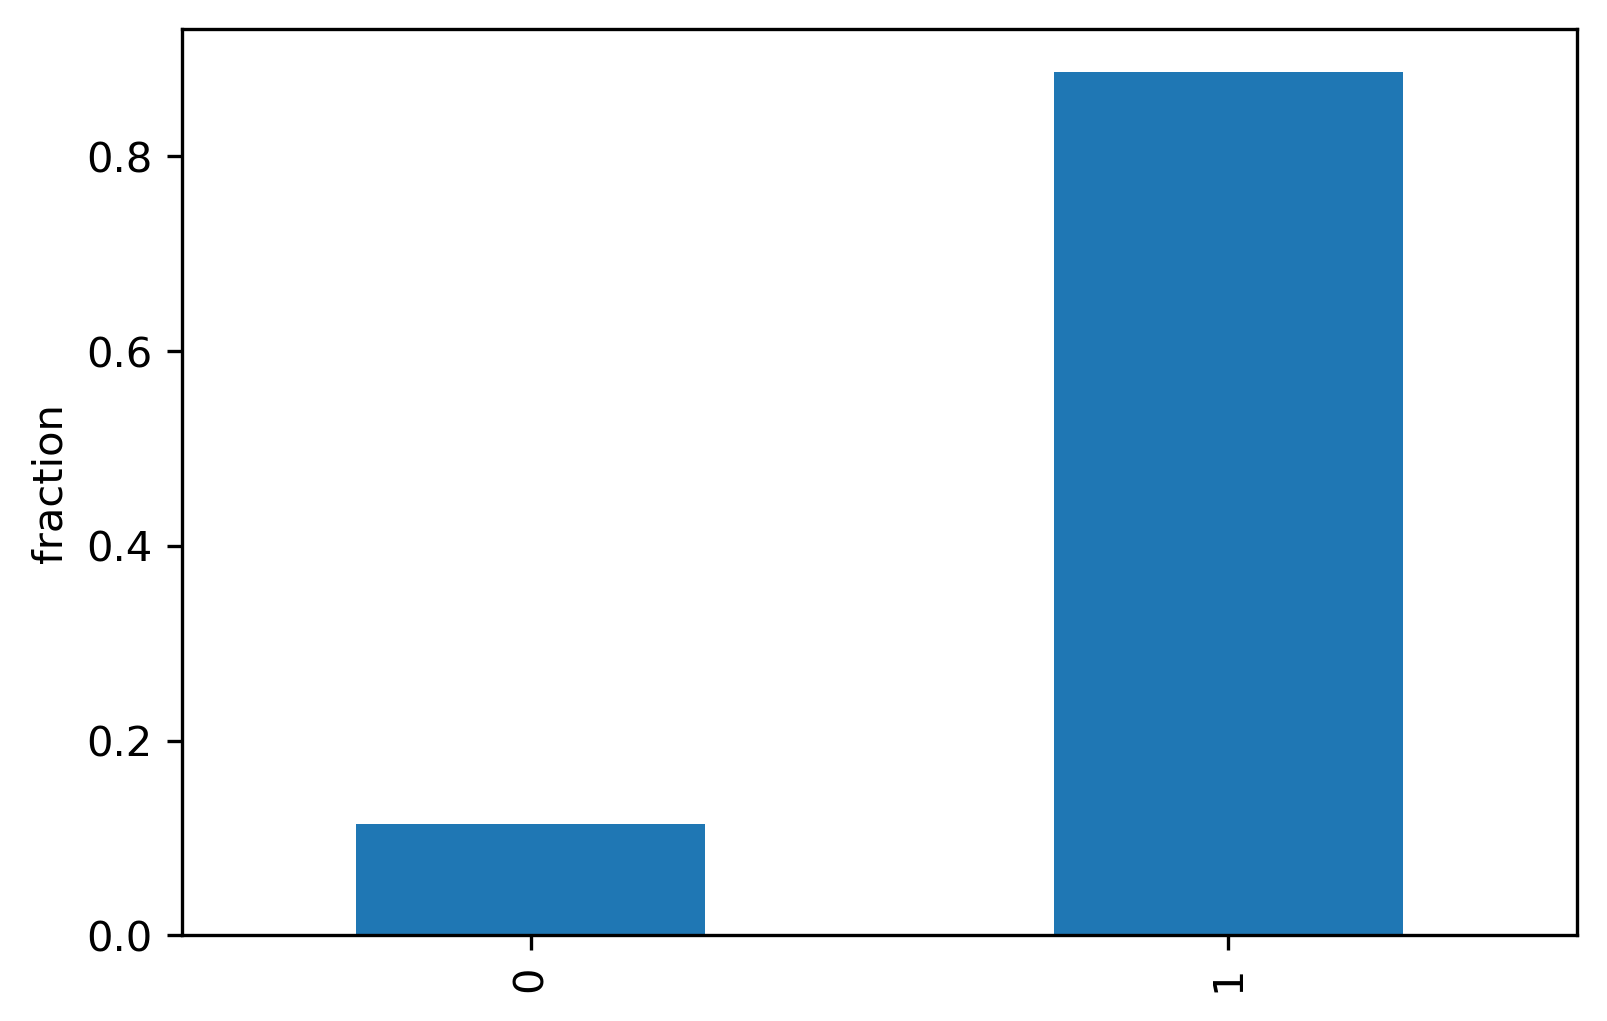

Threshold Value: 822.7241341700474
1    32956
0     6688
Name: shares, dtype: int64


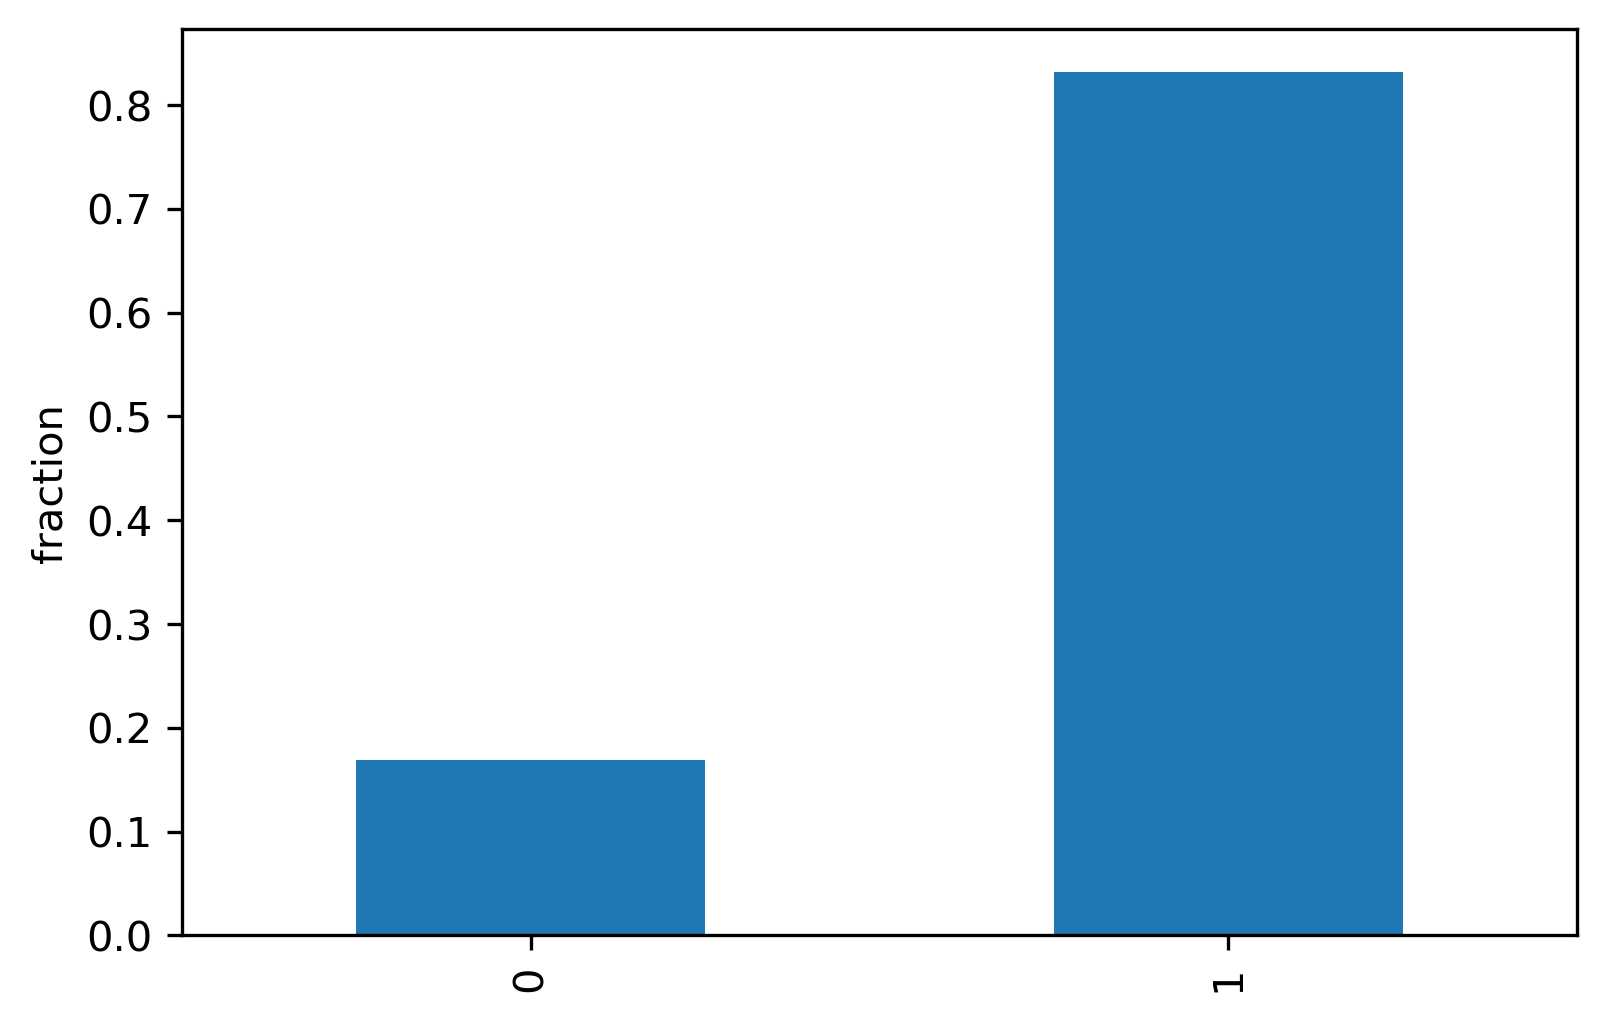

Threshold Value: 924.9147277217335
1    30298
0     9346
Name: shares, dtype: int64


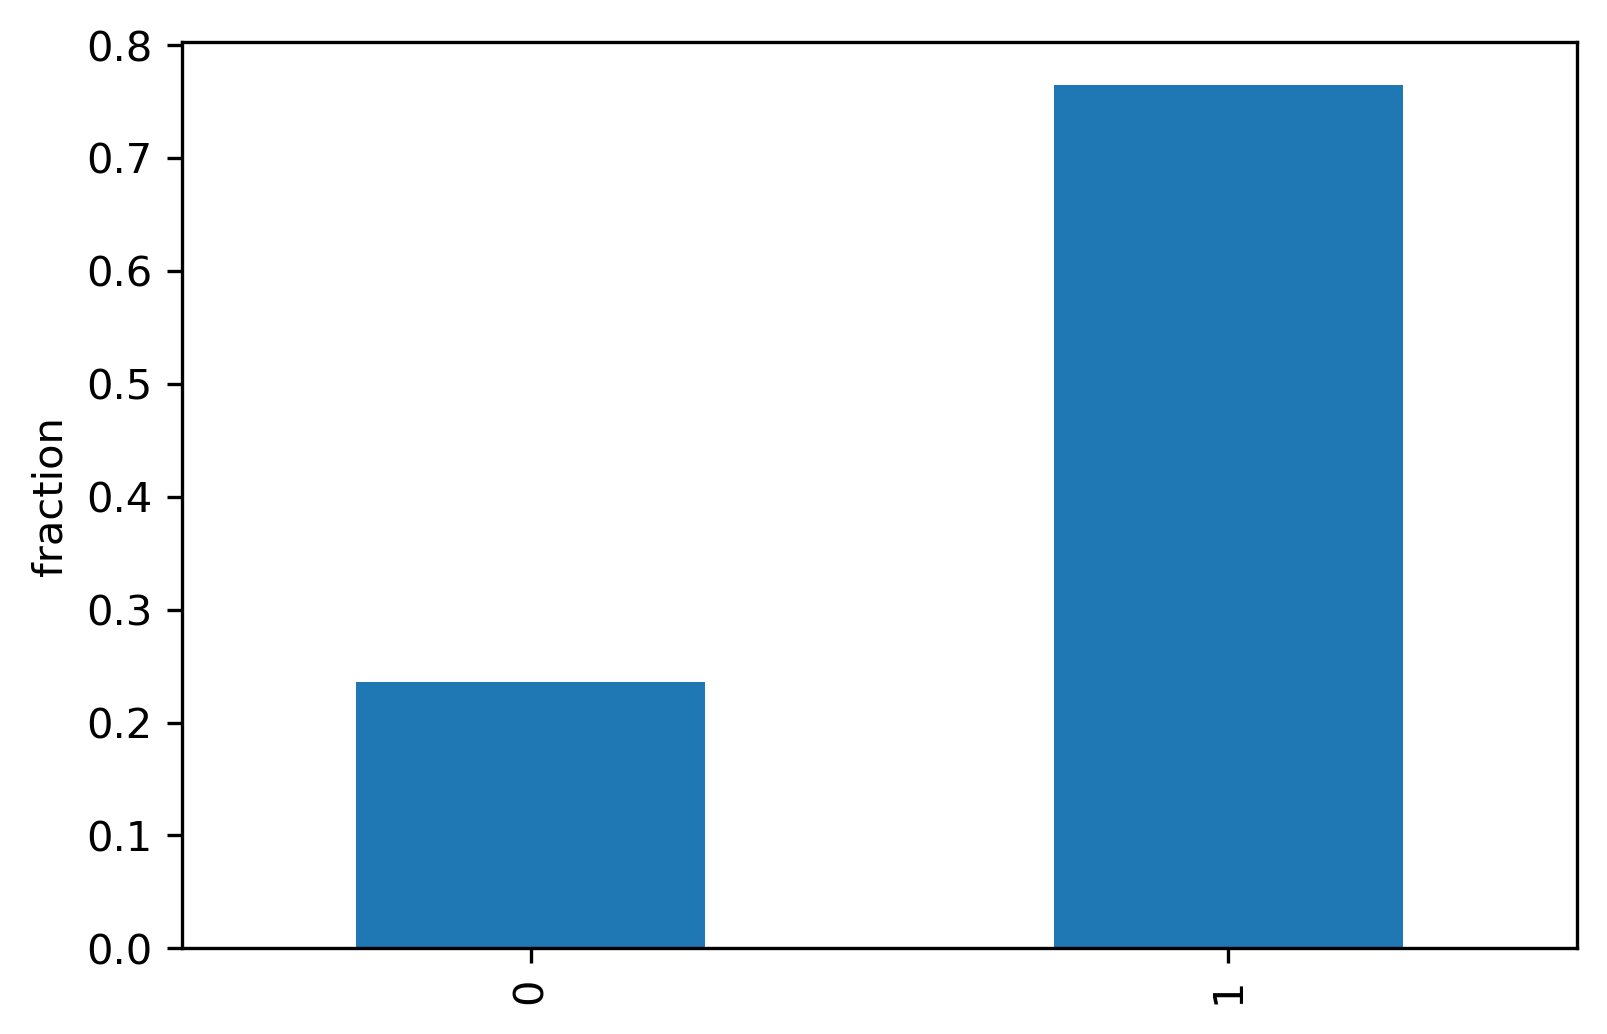

Threshold Value: 1039.79841848149
1    27220
0    12424
Name: shares, dtype: int64


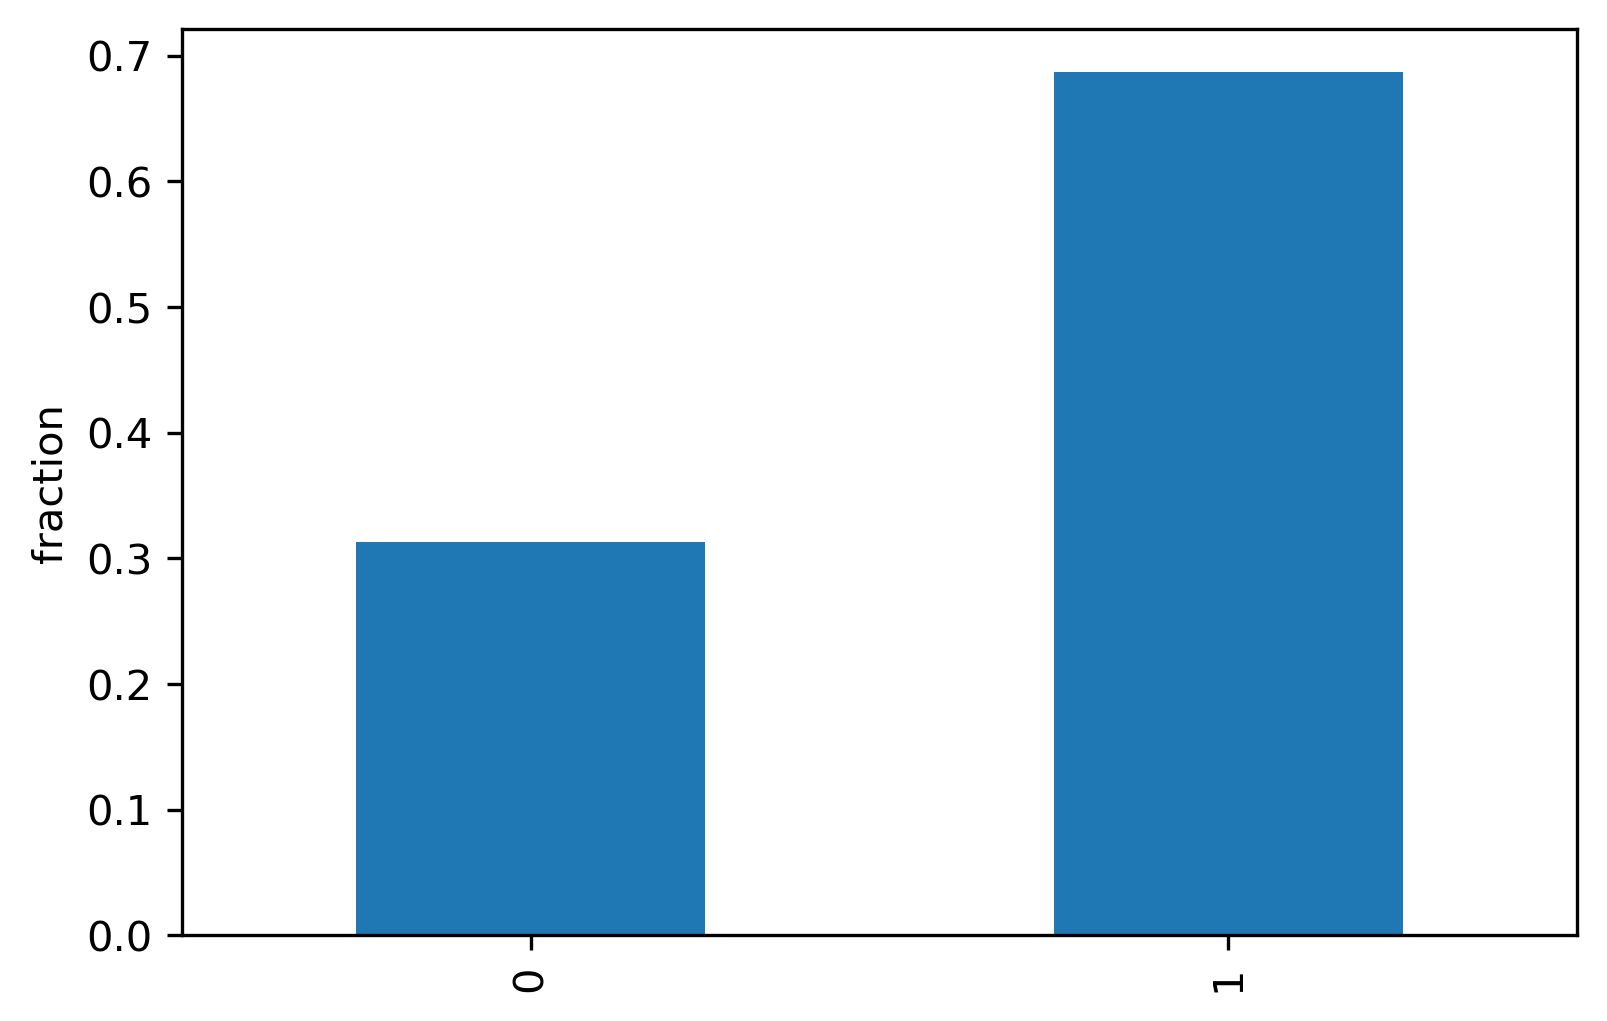

Threshold Value: 1168.9518164985777
1    24912
0    14732
Name: shares, dtype: int64


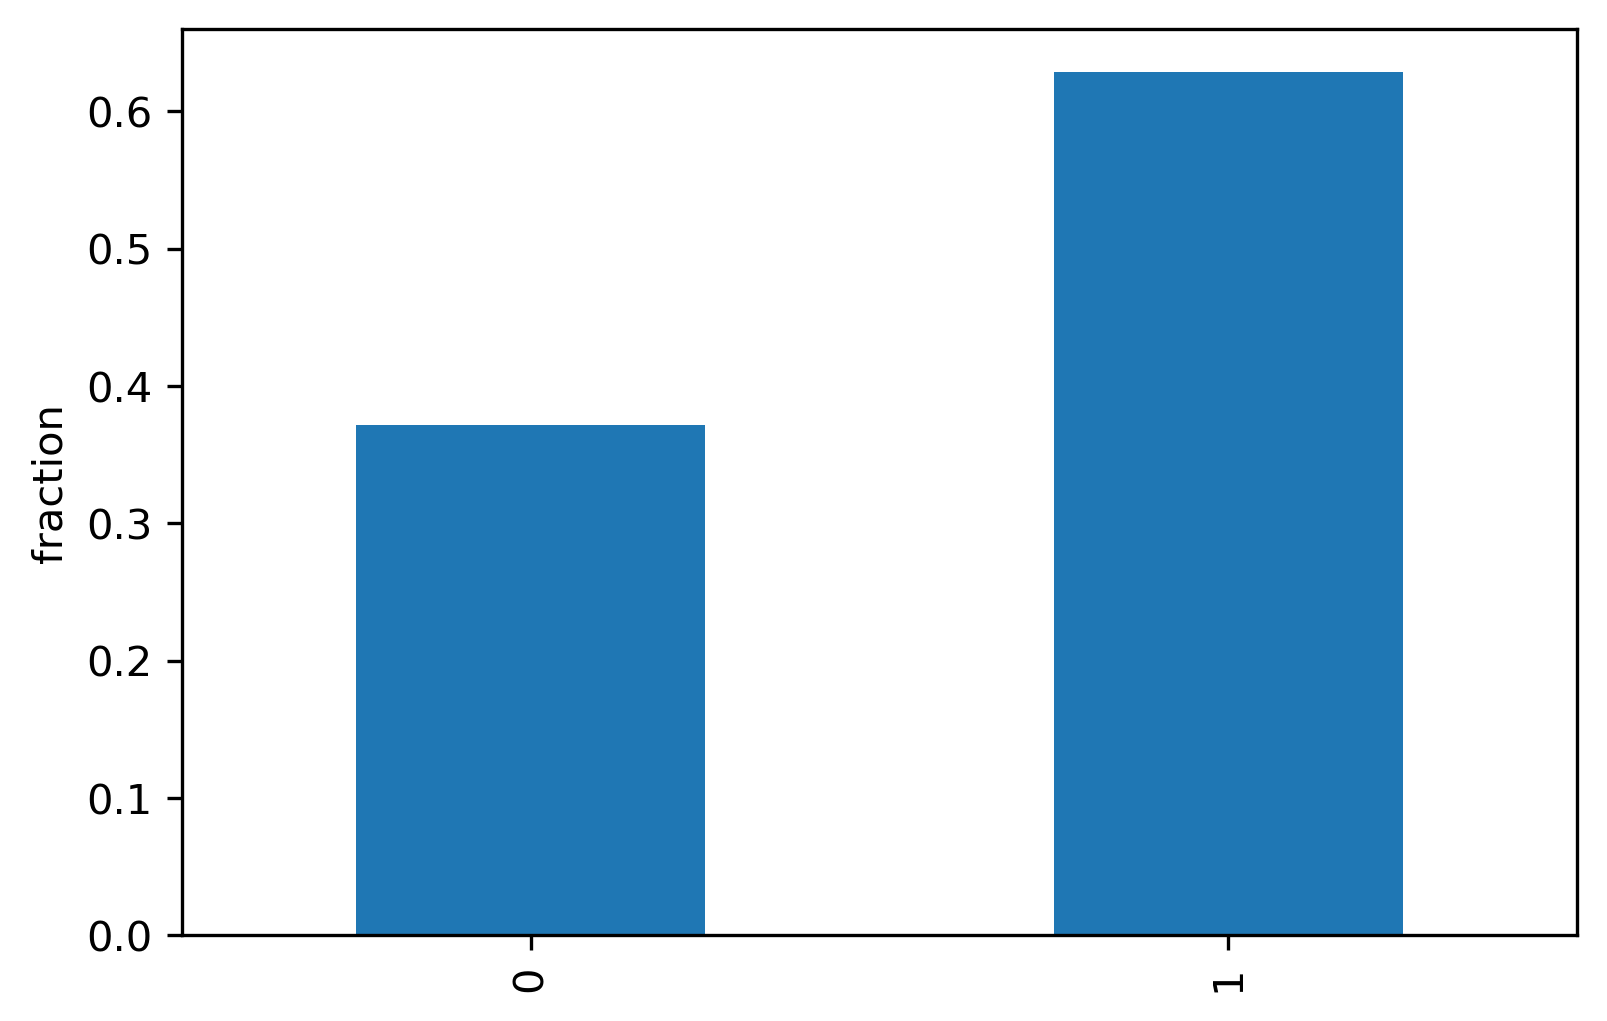

Threshold Value: 1314.1473626117568
1    21154
0    18490
Name: shares, dtype: int64


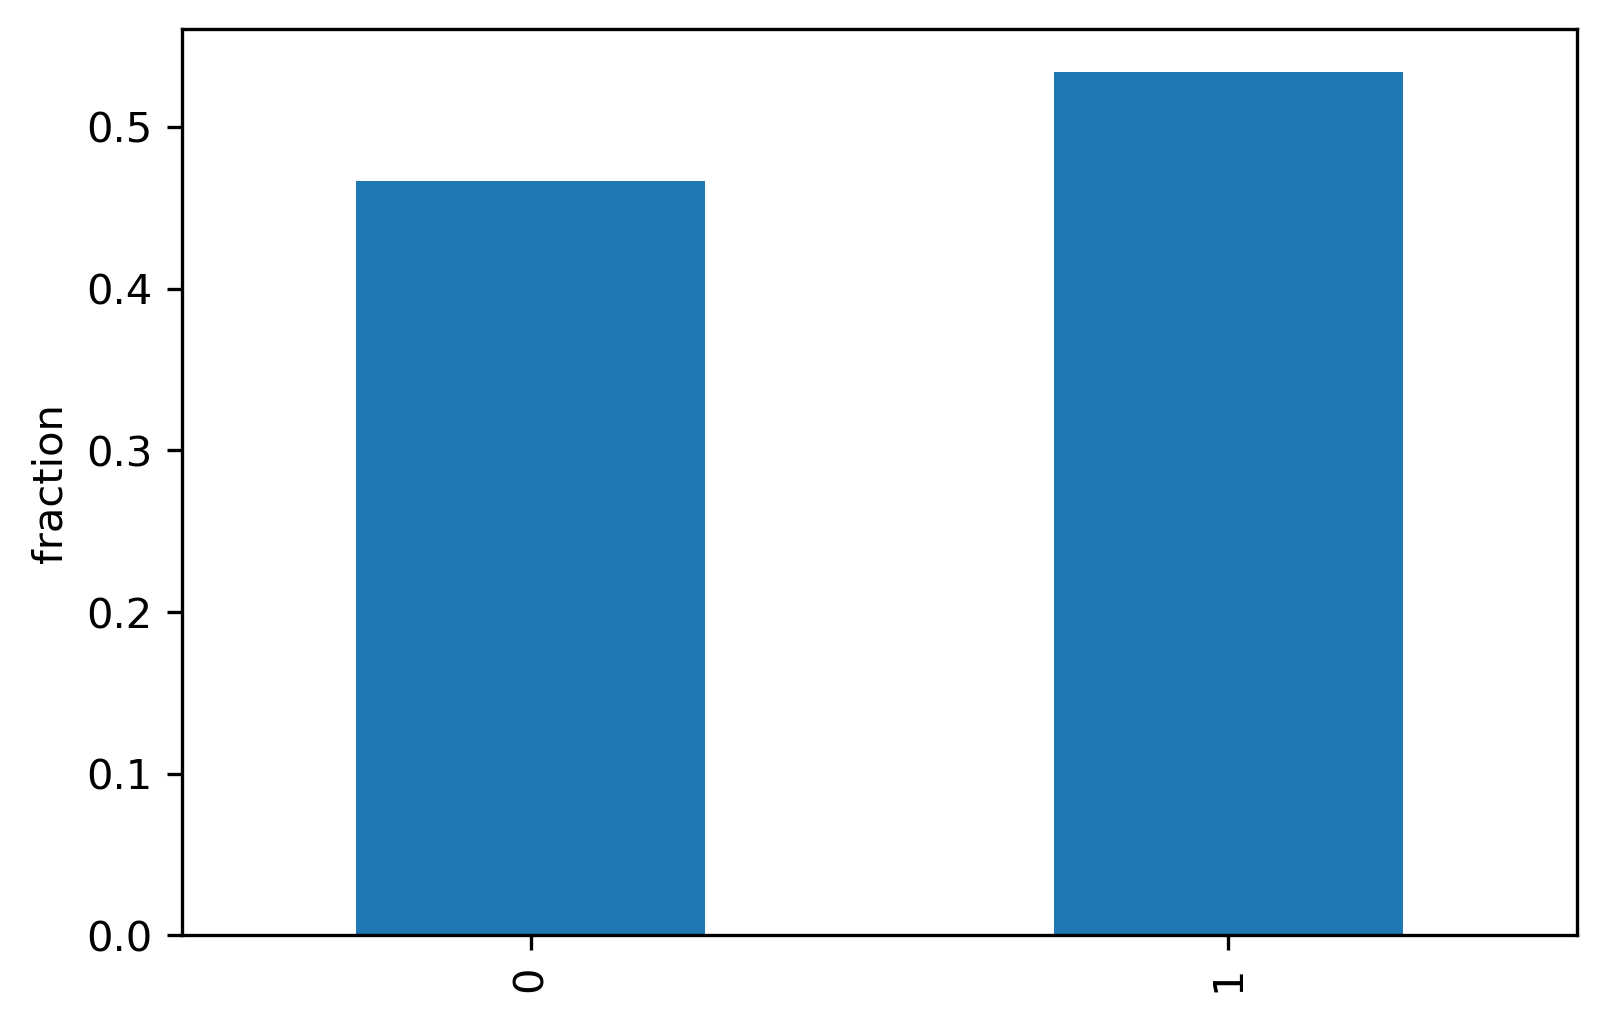

Threshold Value: 1477.377652598511
0    20082
1    19562
Name: shares, dtype: int64


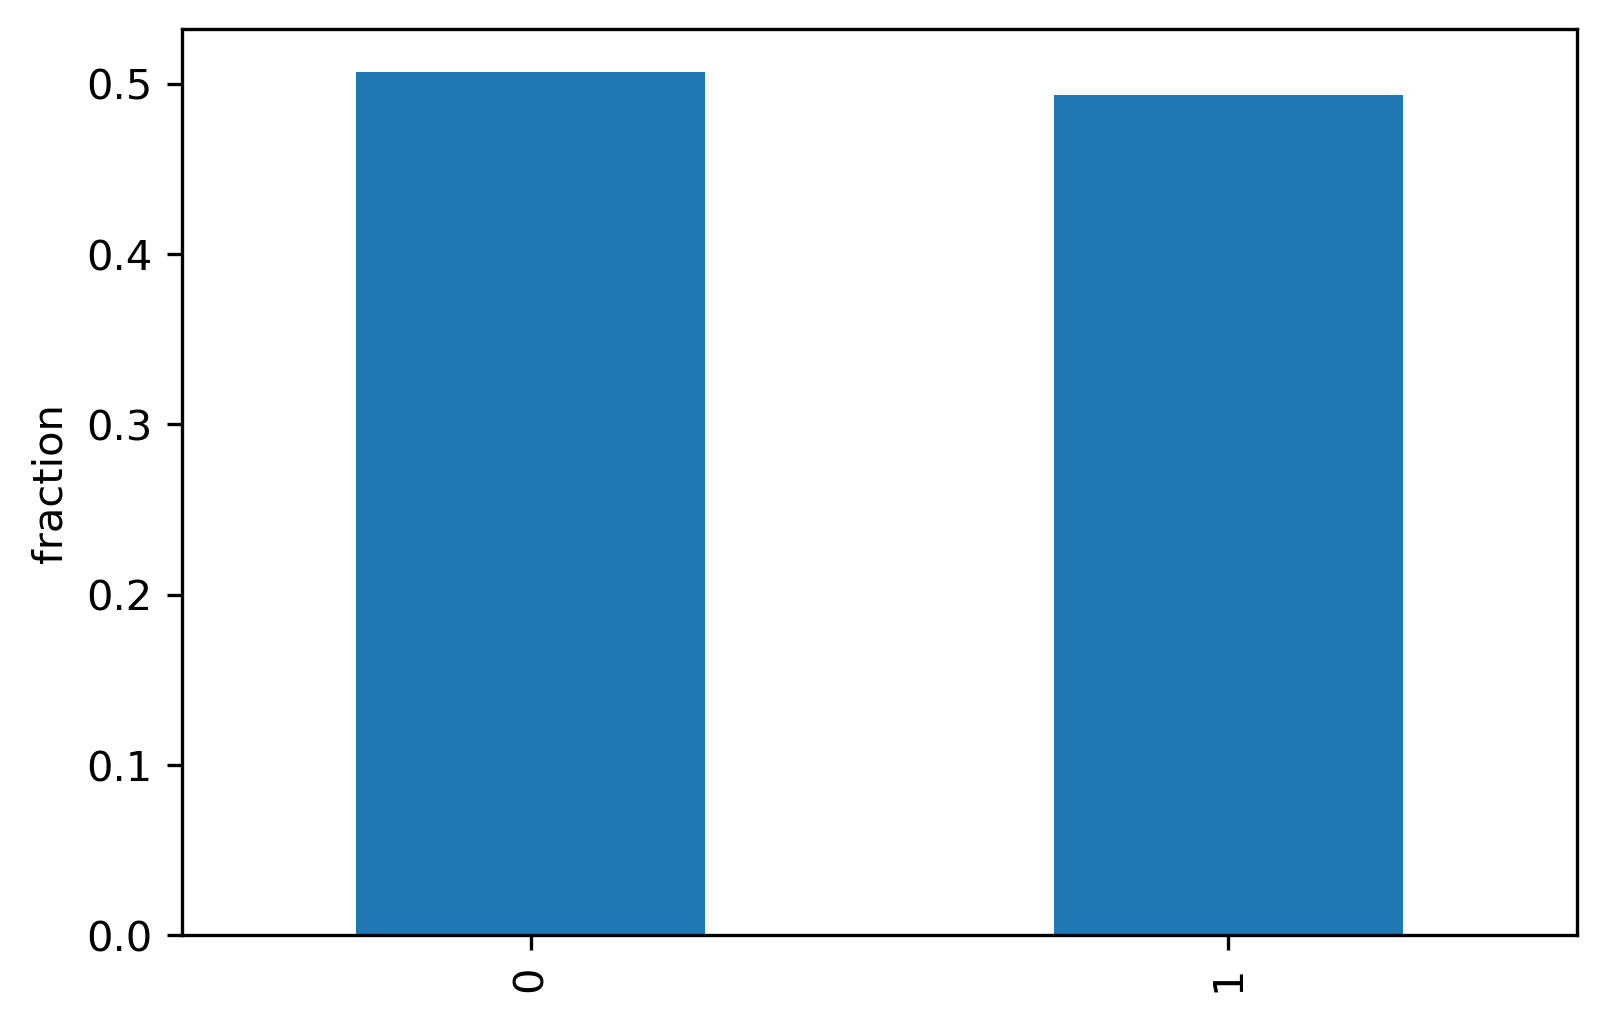

Threshold Value: 1660.8827826277166
0    22542
1    17102
Name: shares, dtype: int64


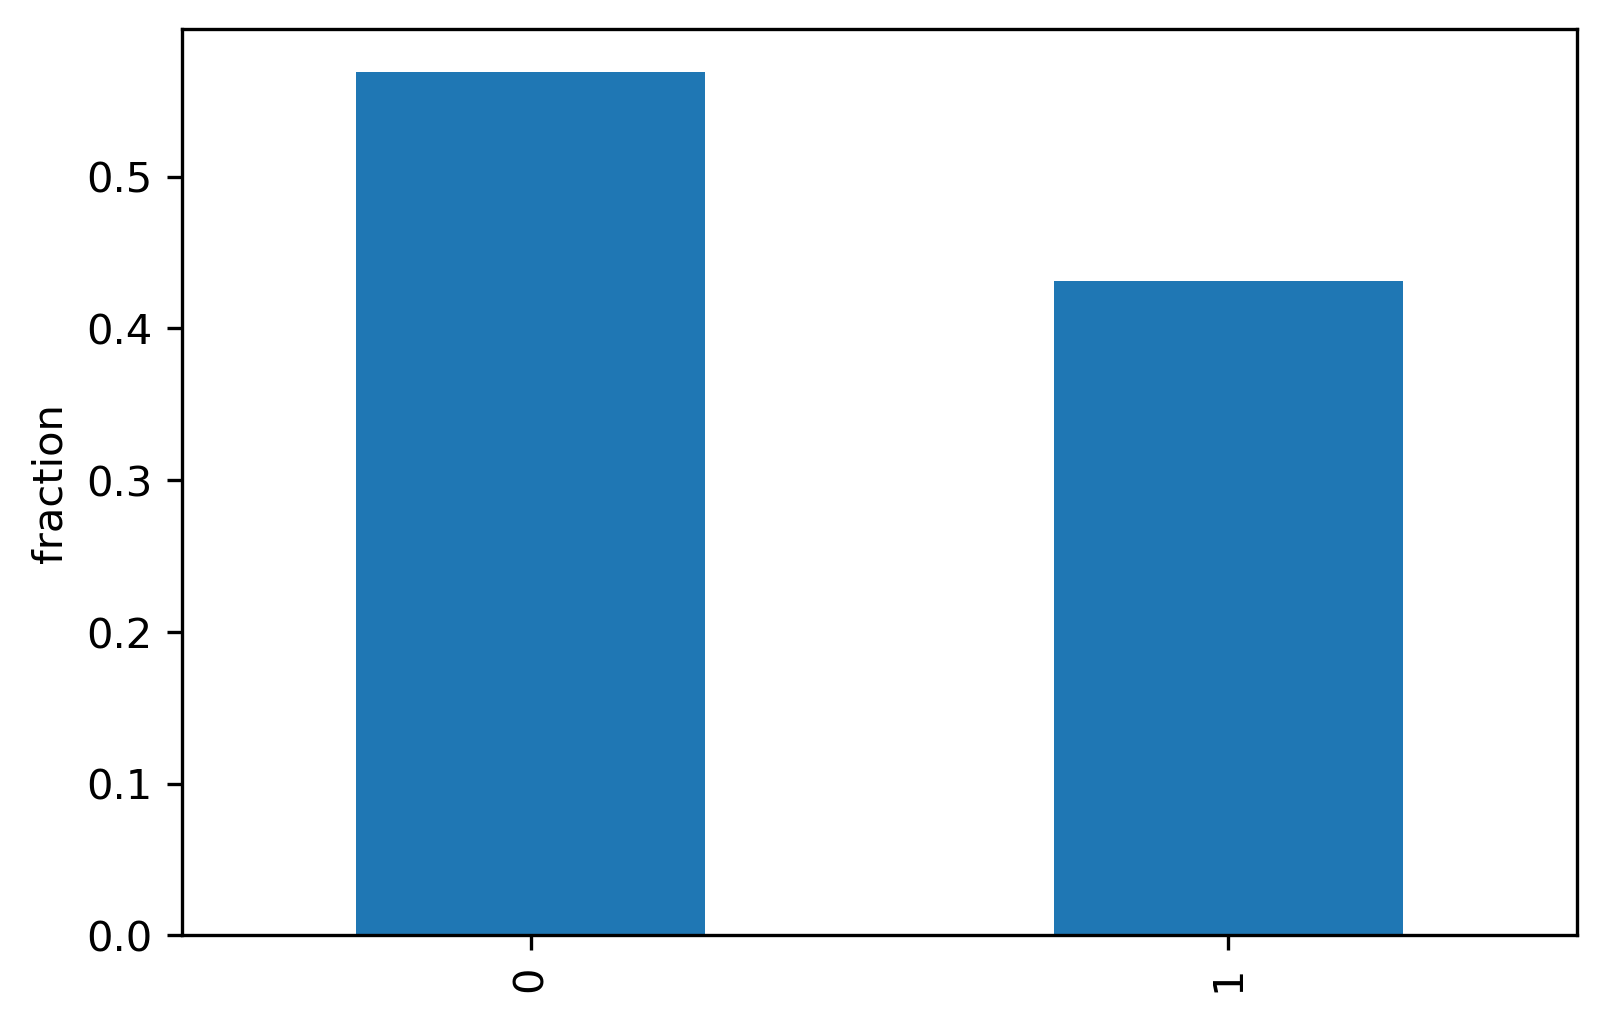

Threshold Value: 1867.1810912919207
0    24444
1    15200
Name: shares, dtype: int64


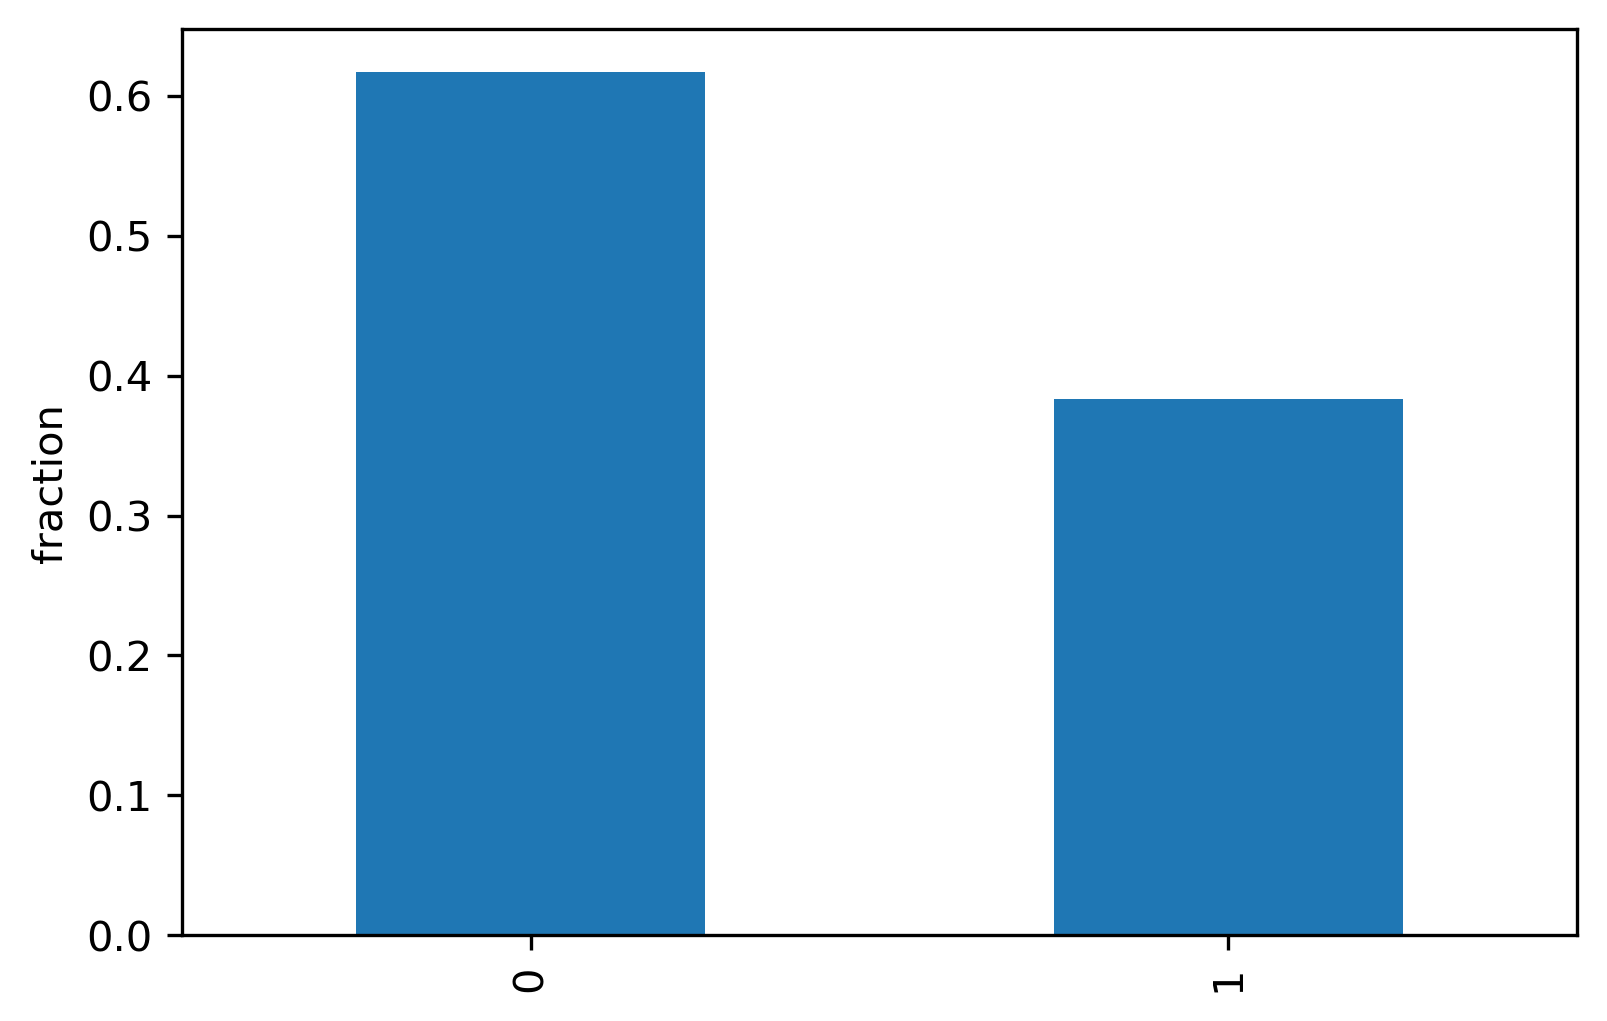

Threshold Value: 2099.1037201085546
0    26028
1    13616
Name: shares, dtype: int64


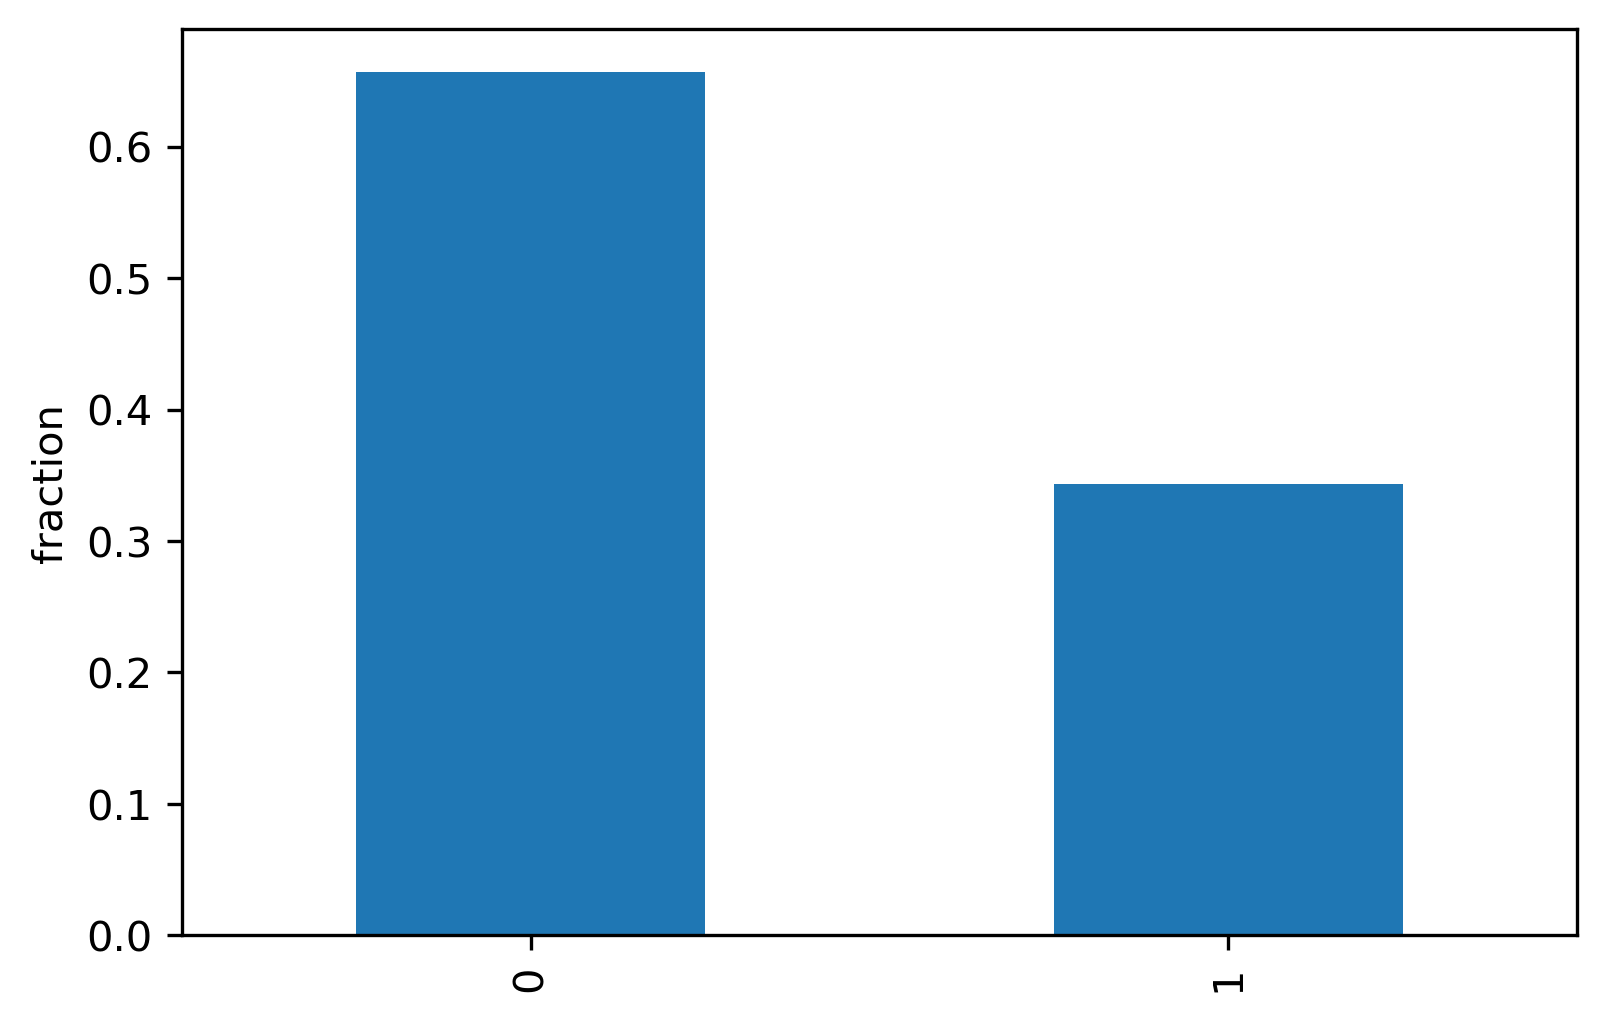

Threshold Value: 2359.8334667821937
0    27831
1    11813
Name: shares, dtype: int64


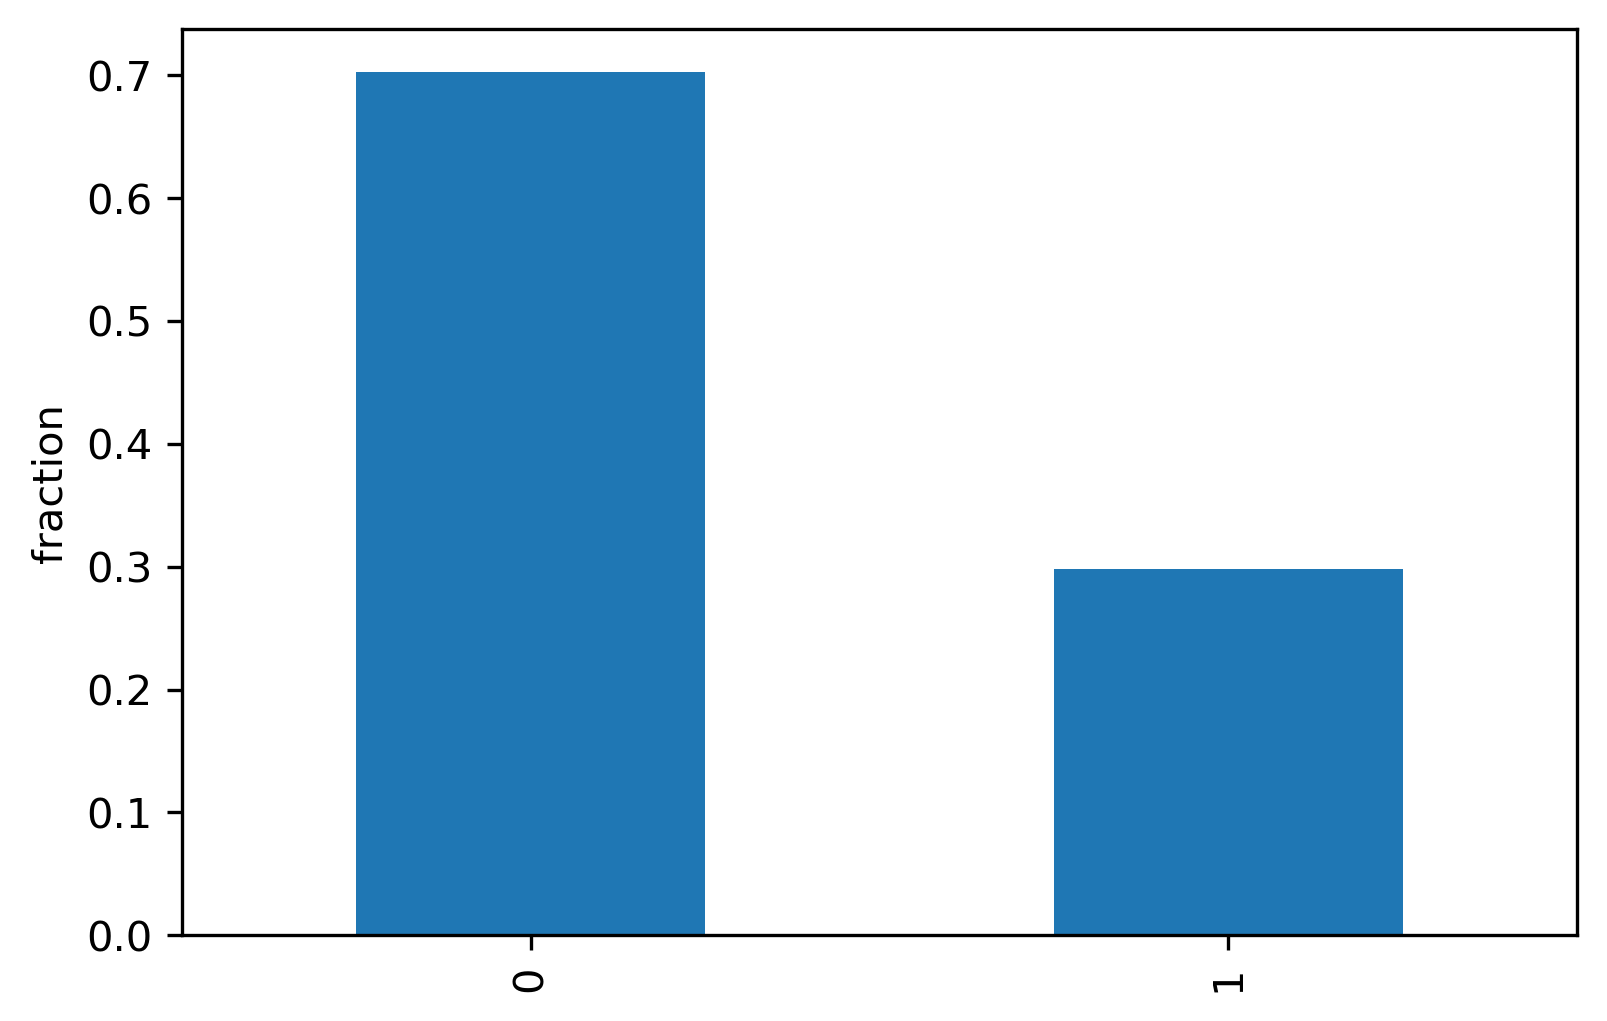

Threshold Value: 2652.9484644318973
0    29220
1    10424
Name: shares, dtype: int64


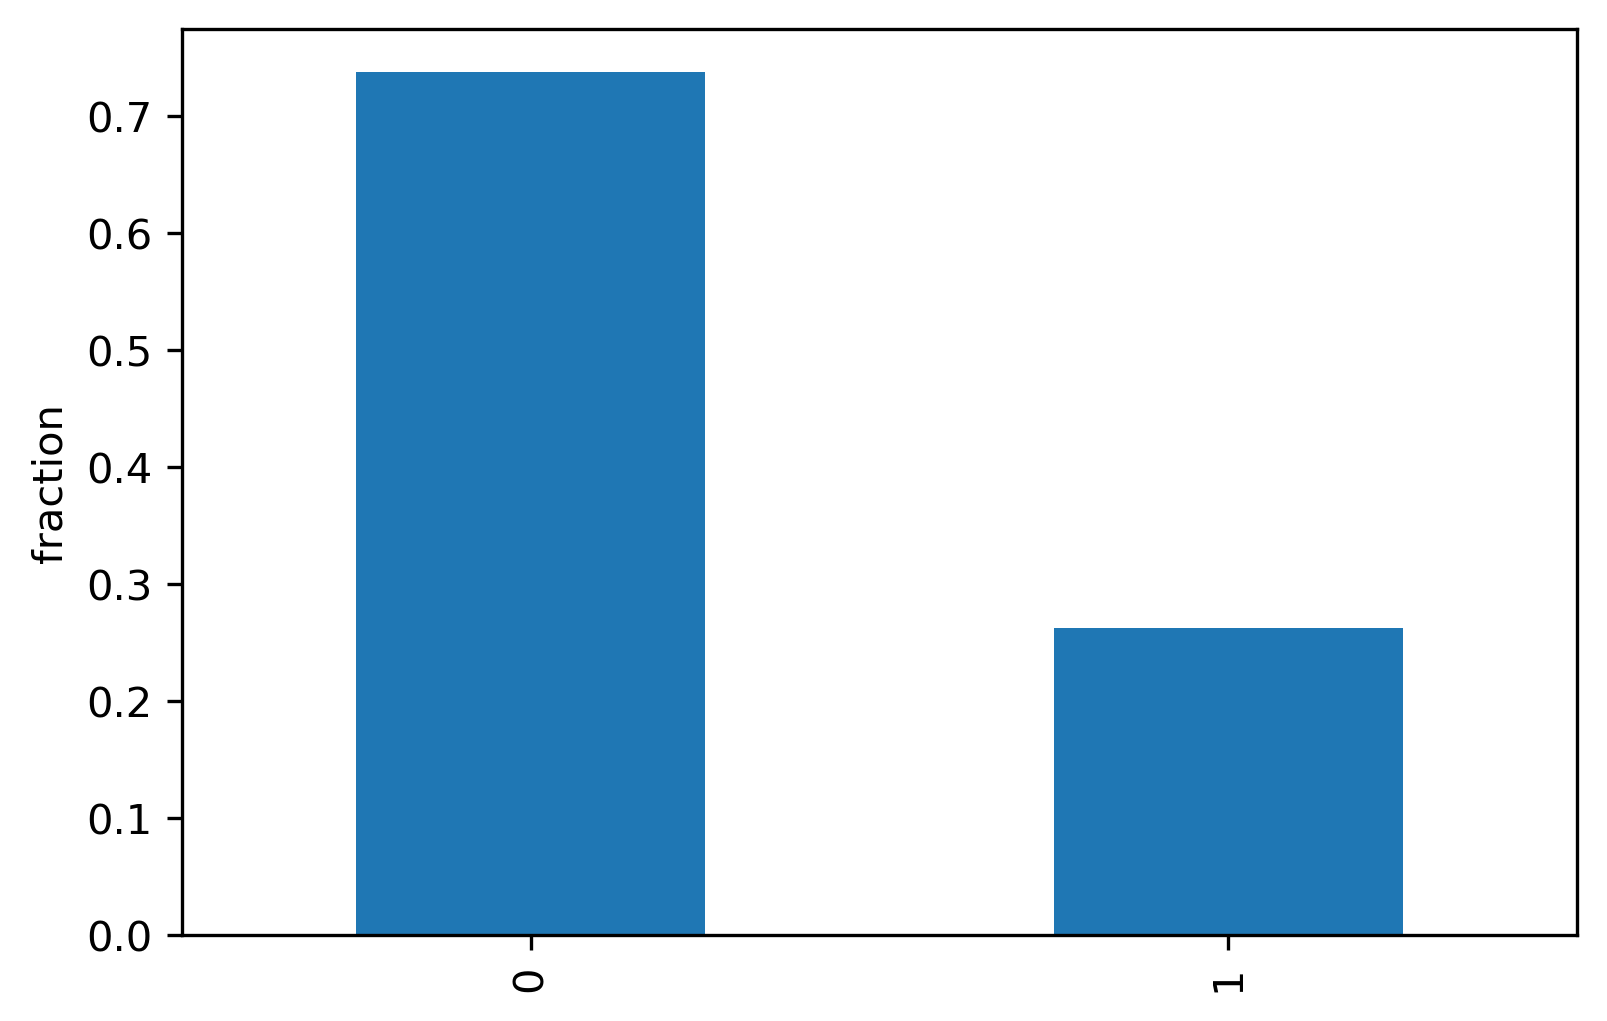

Threshold Value: 2982.4712862168913
0    30370
1     9274
Name: shares, dtype: int64


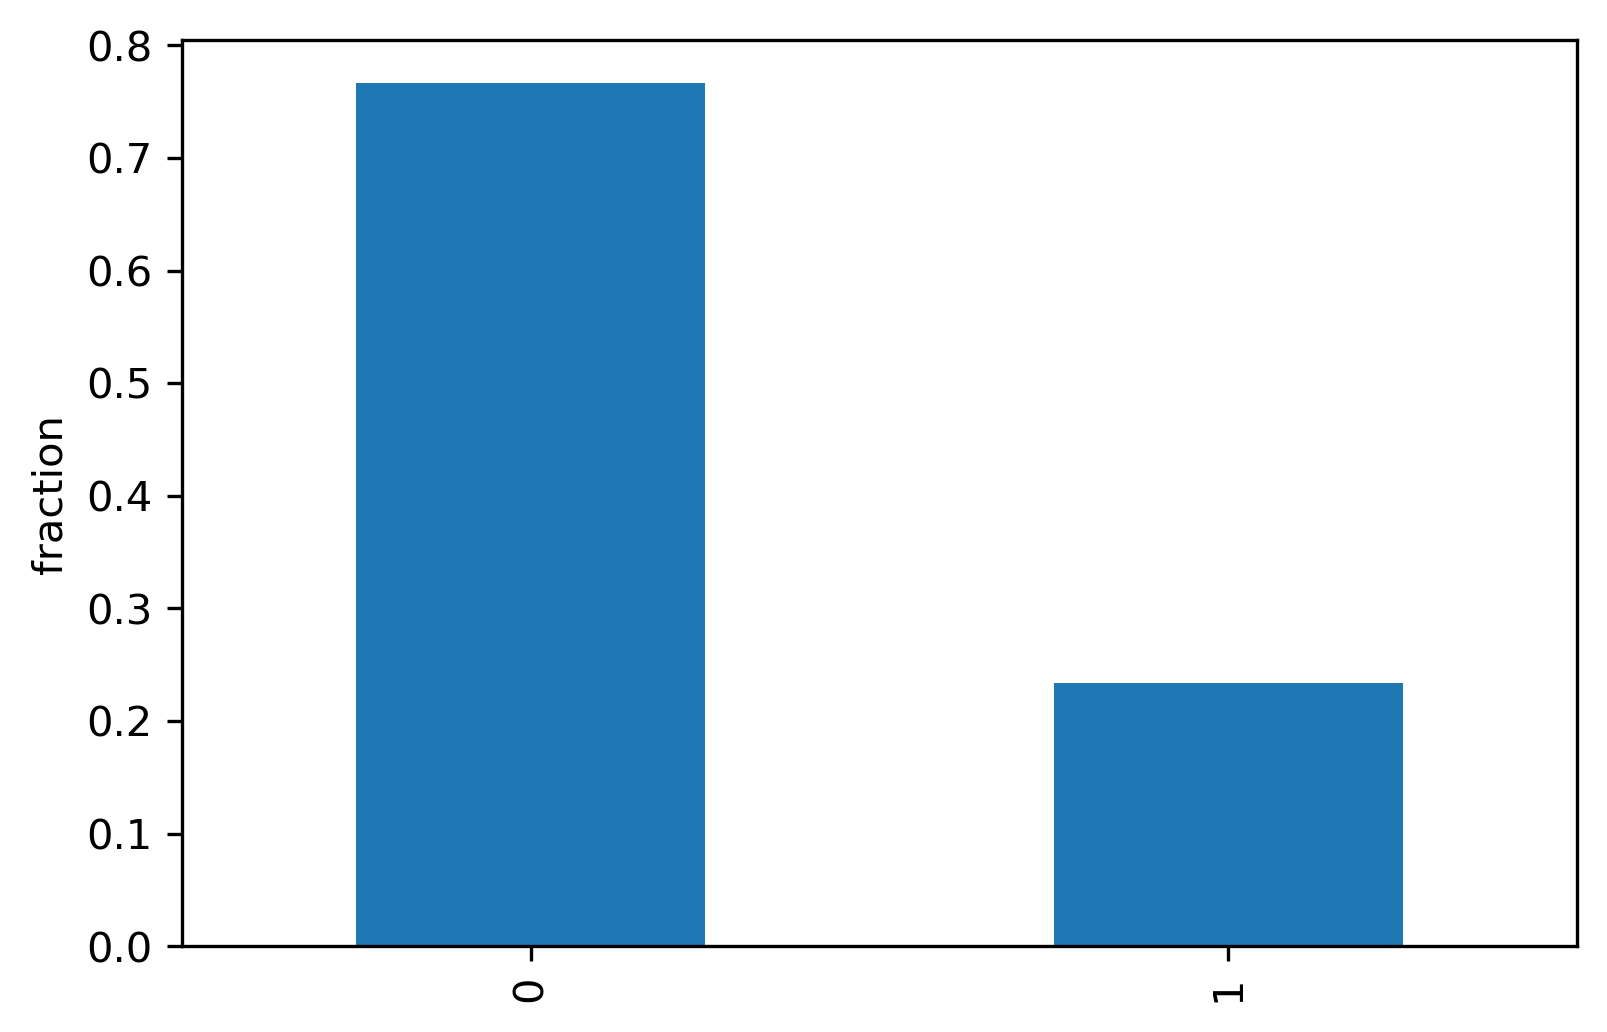

Threshold Value: 3352.92414924956
0    31565
1     8079
Name: shares, dtype: int64


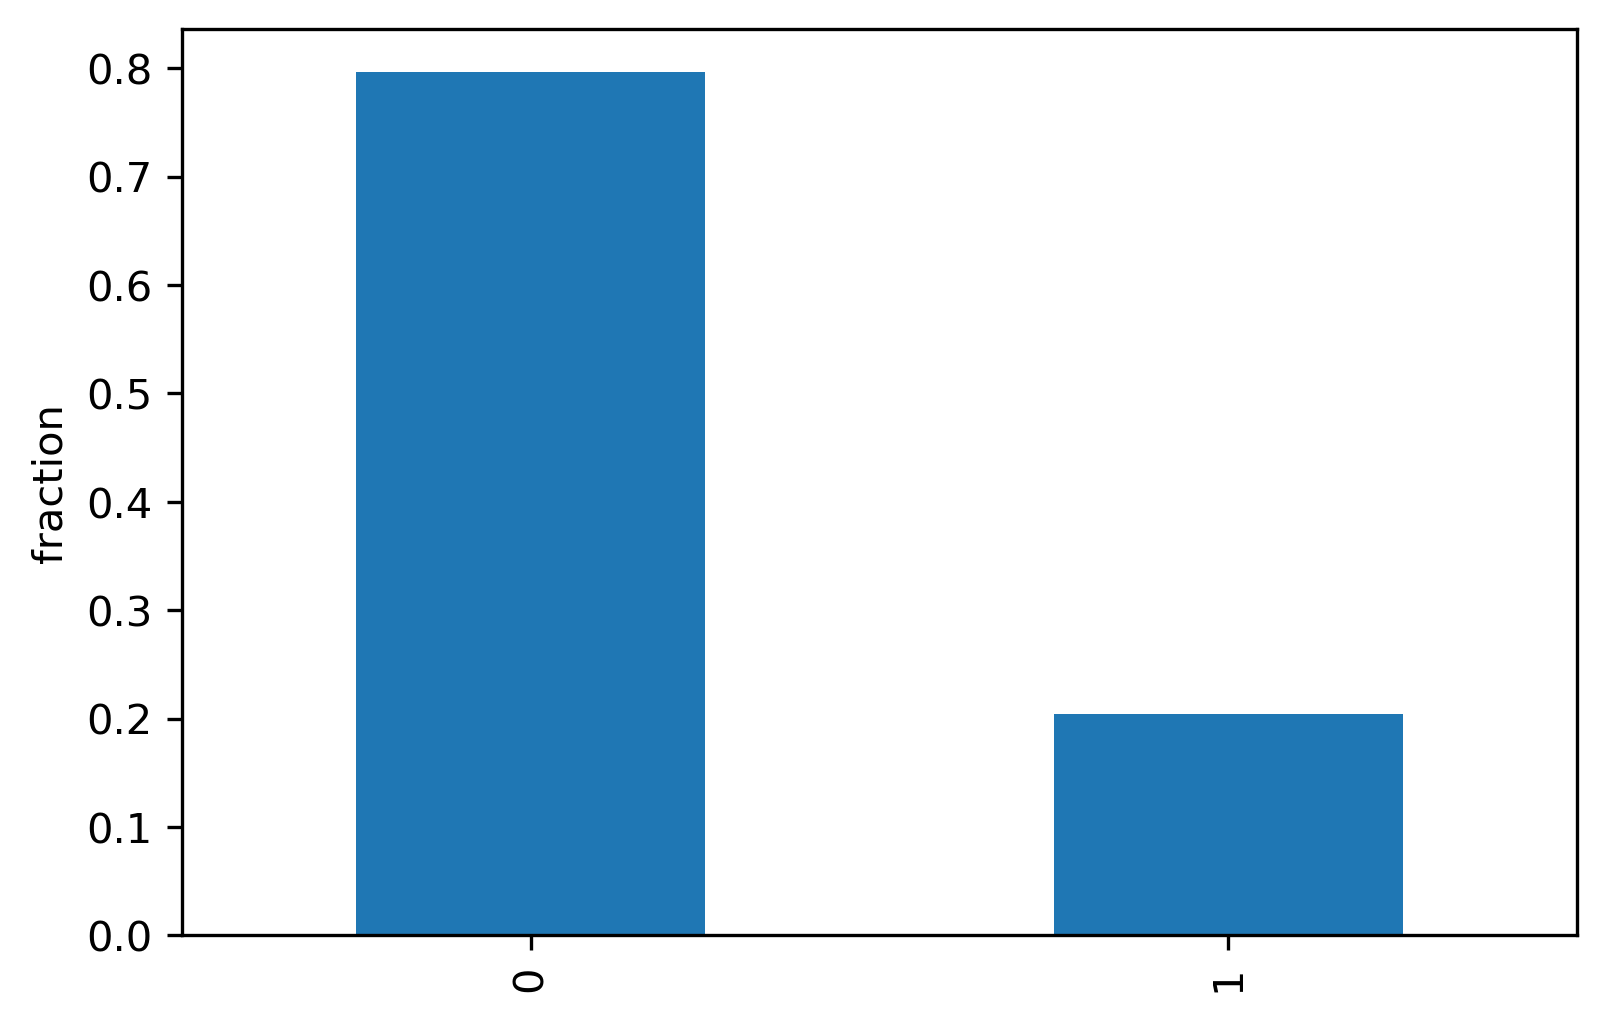

Threshold Value: 3769.3909753883636
0    32544
1     7100
Name: shares, dtype: int64


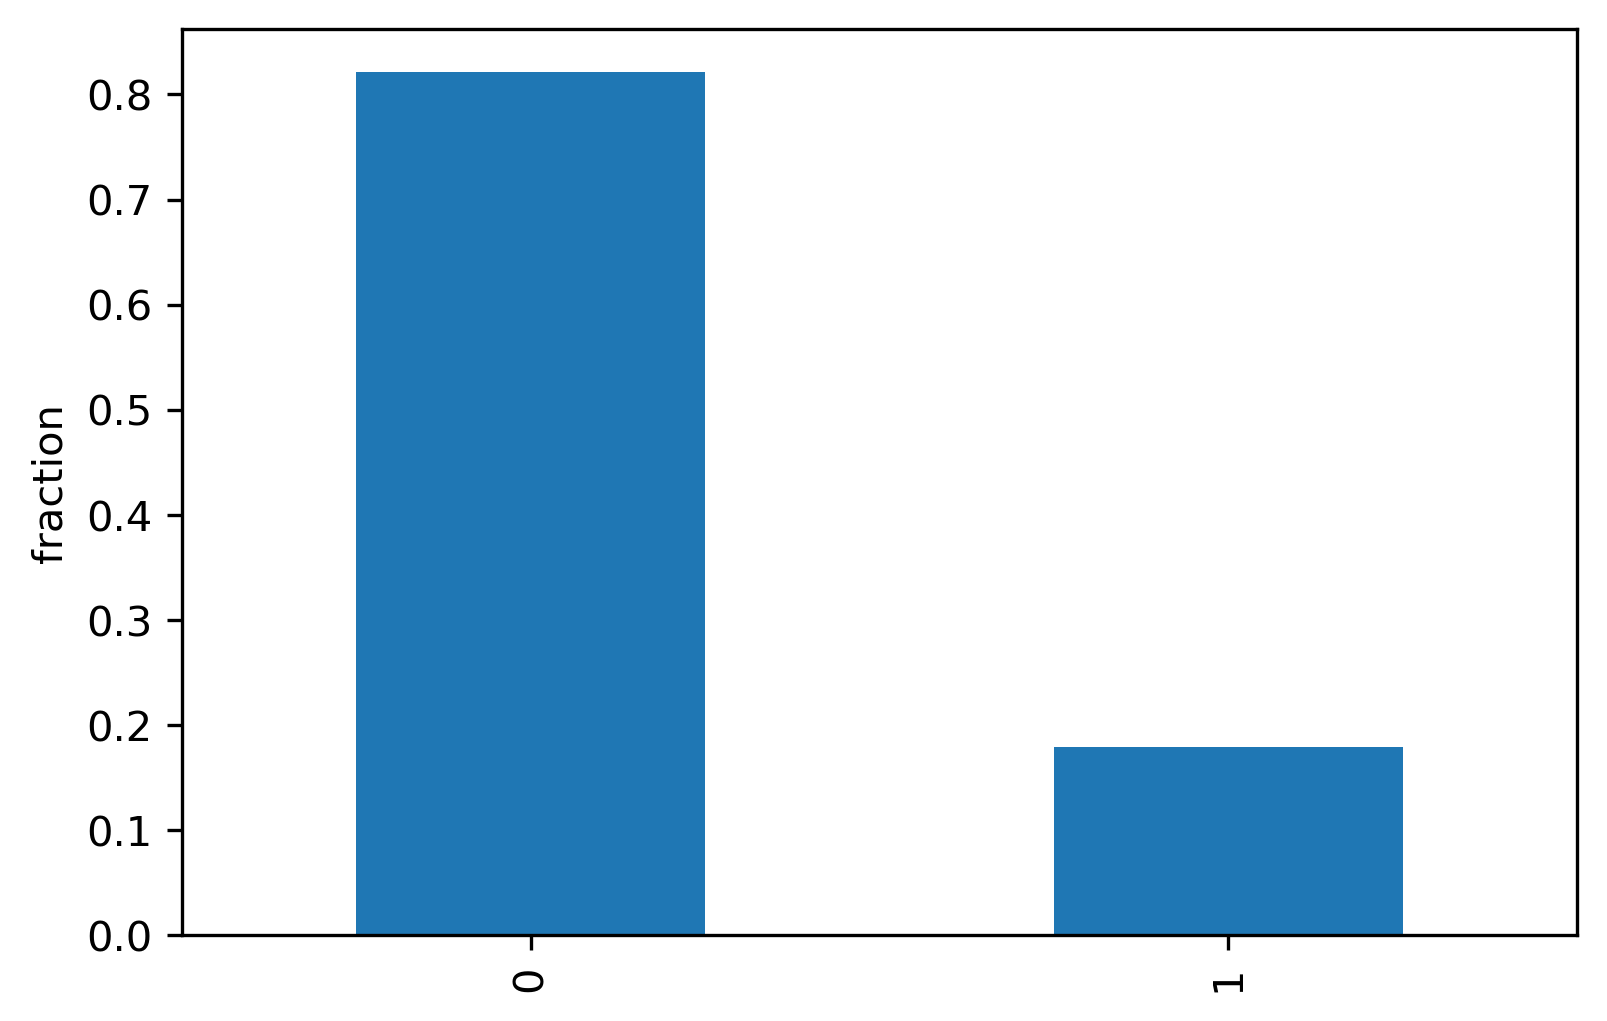

Threshold Value: 4237.587160604064
0    33486
1     6158
Name: shares, dtype: int64


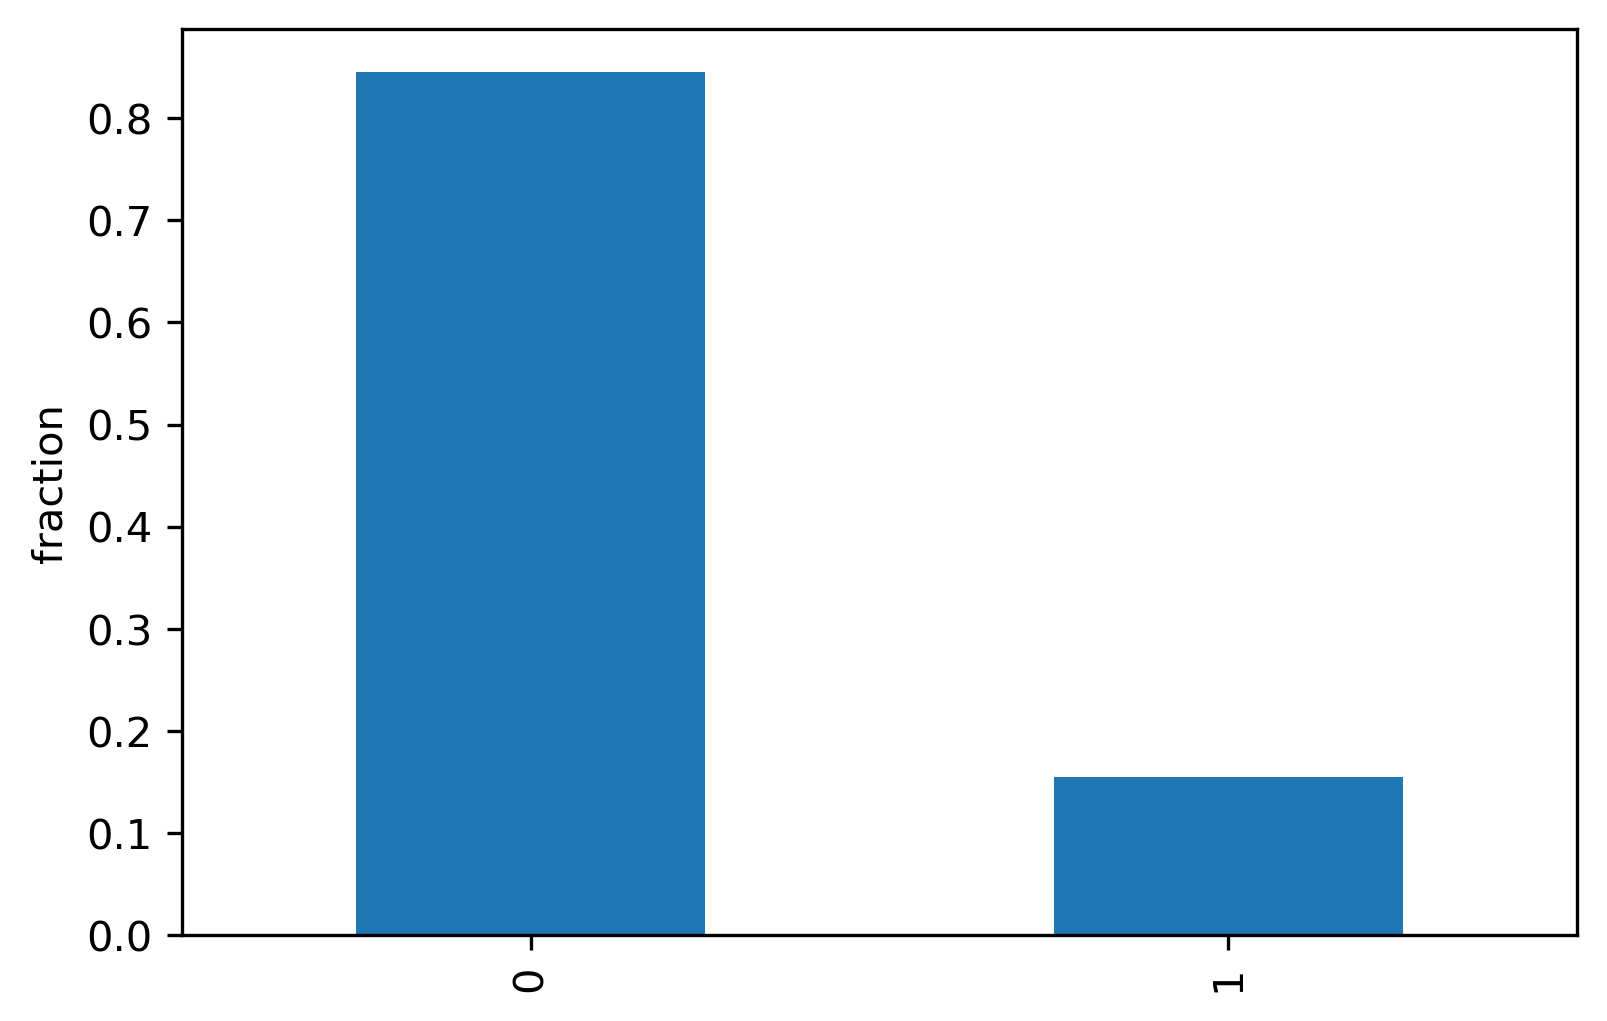

Threshold Value: 4763.938010401341
0    34207
1     5437
Name: shares, dtype: int64


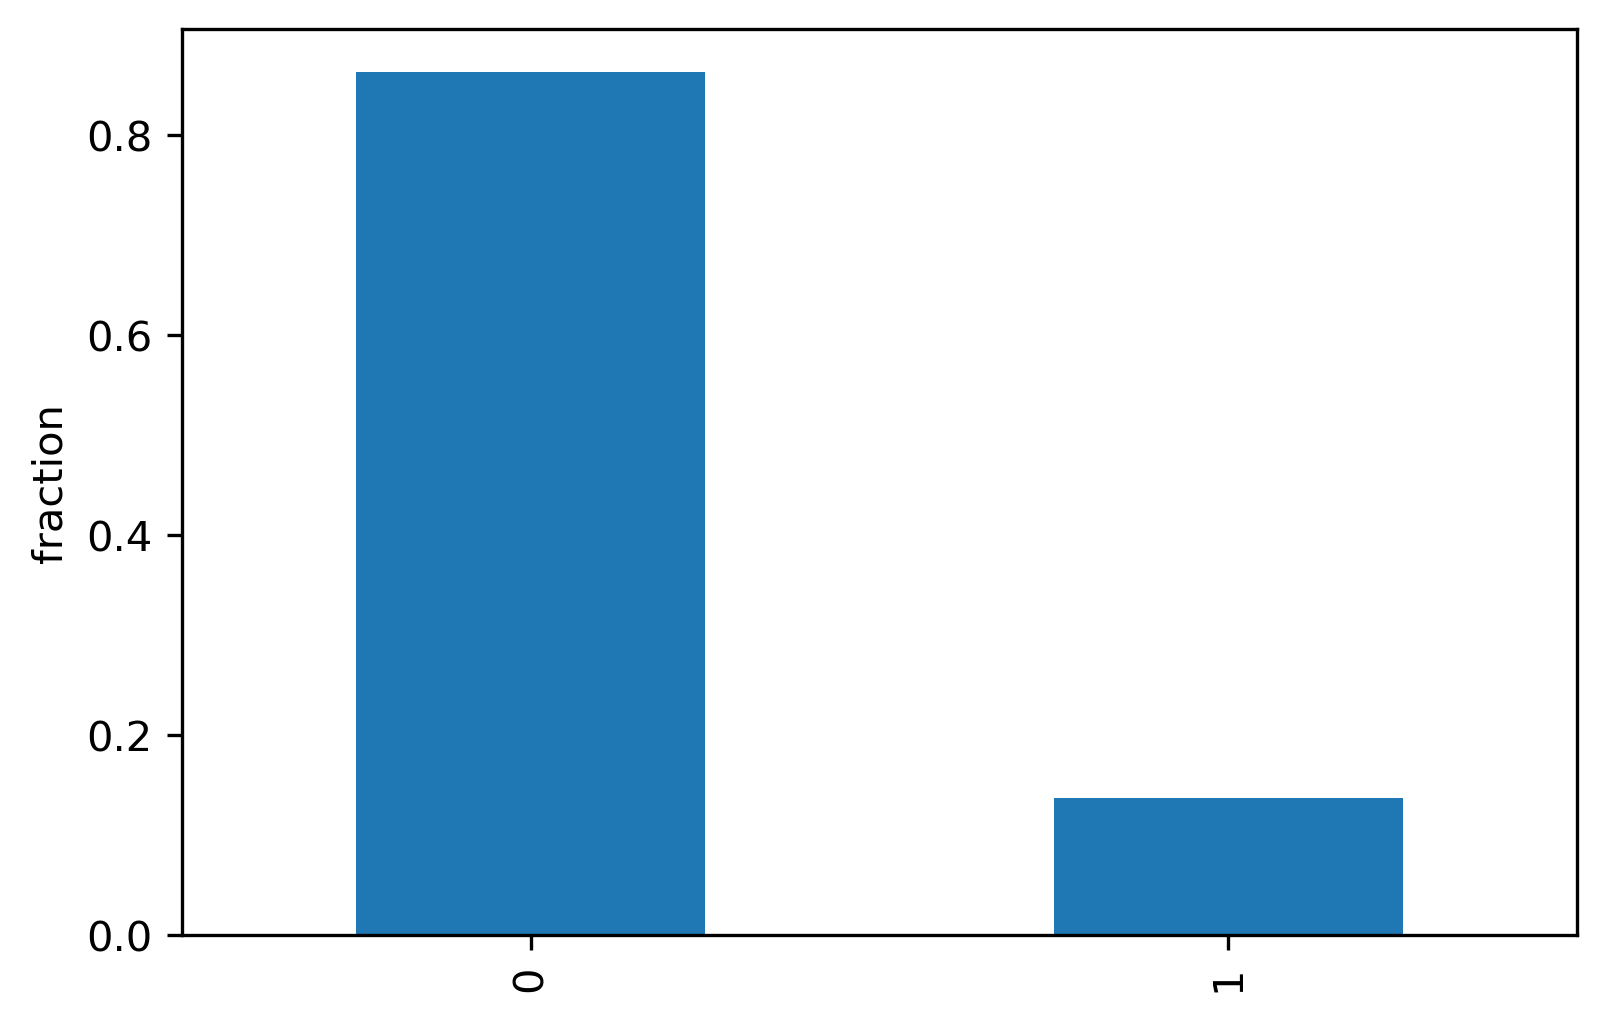

Threshold Value: 5355.666917706896
0    34902
1     4742
Name: shares, dtype: int64


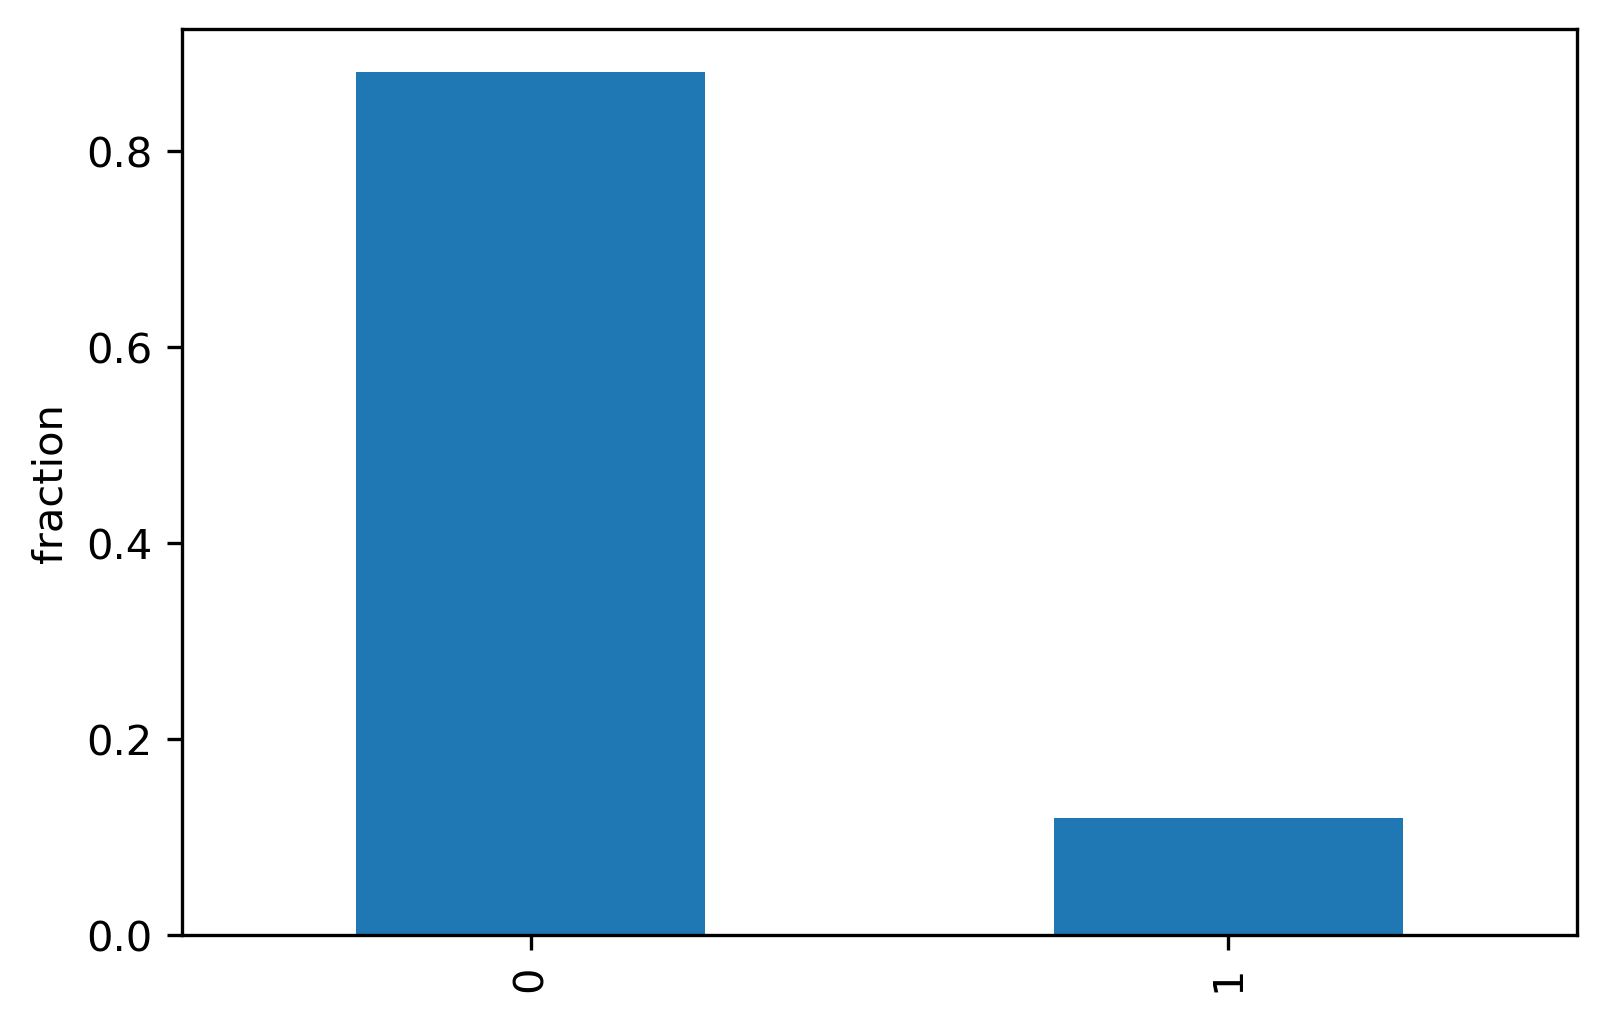

Threshold Value: 6020.894493336132
0    35541
1     4103
Name: shares, dtype: int64


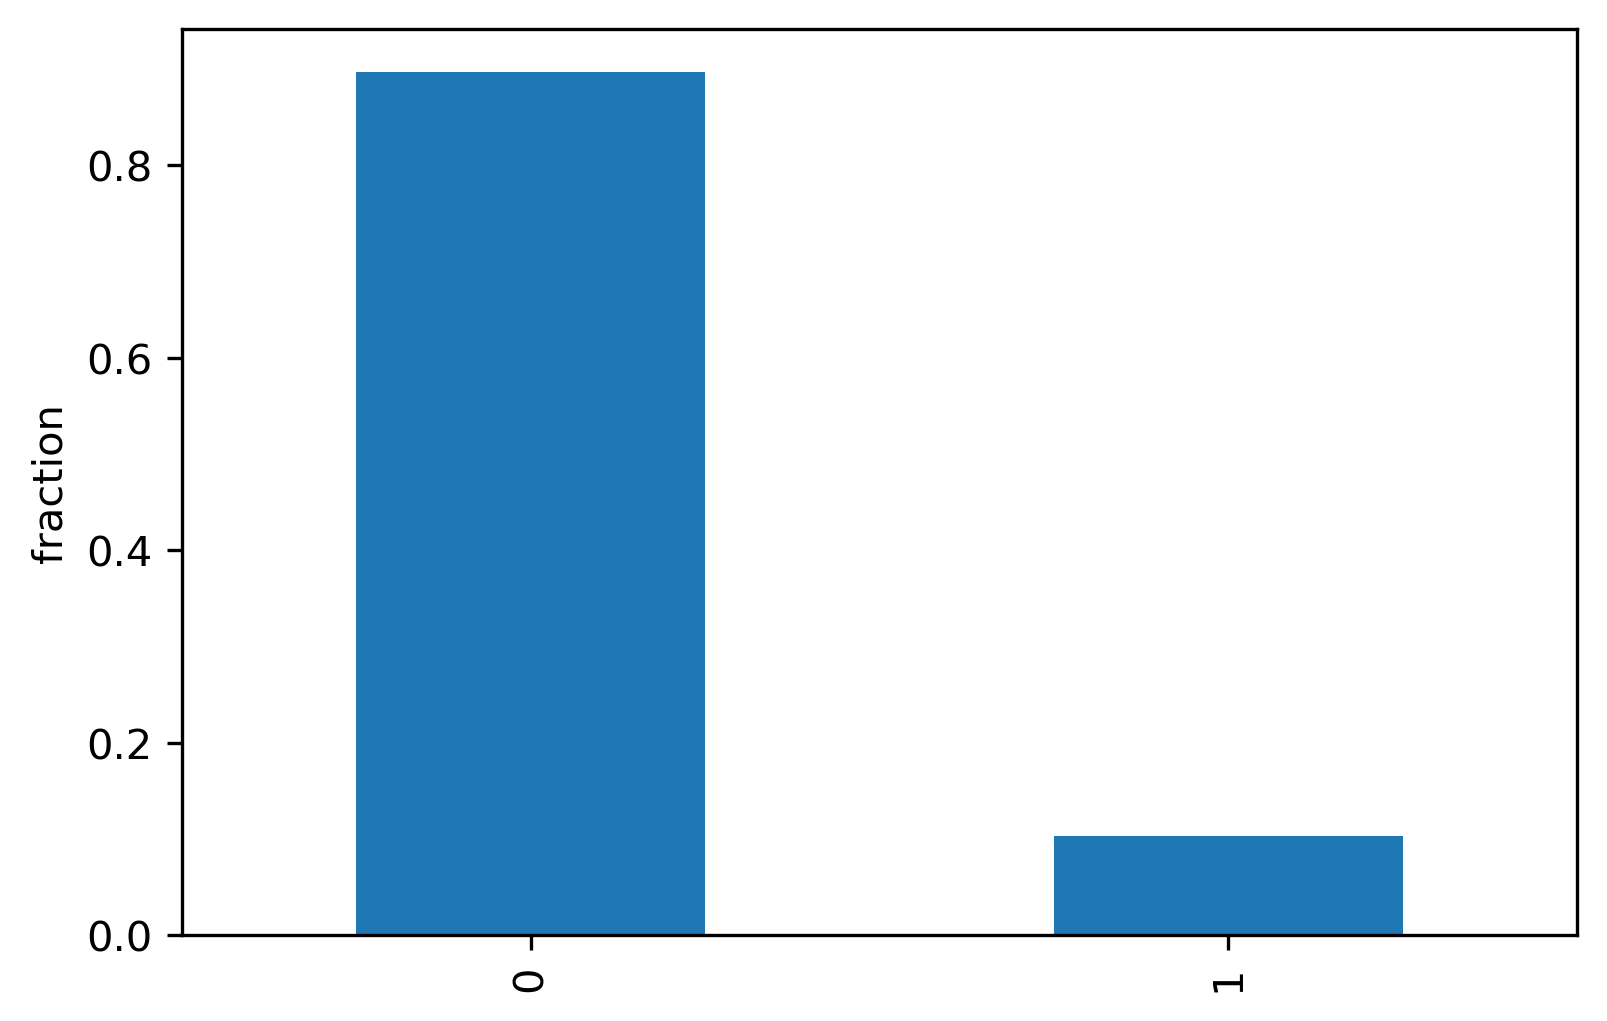

Threshold Value: 6768.750009458535
0    36077
1     3567
Name: shares, dtype: int64


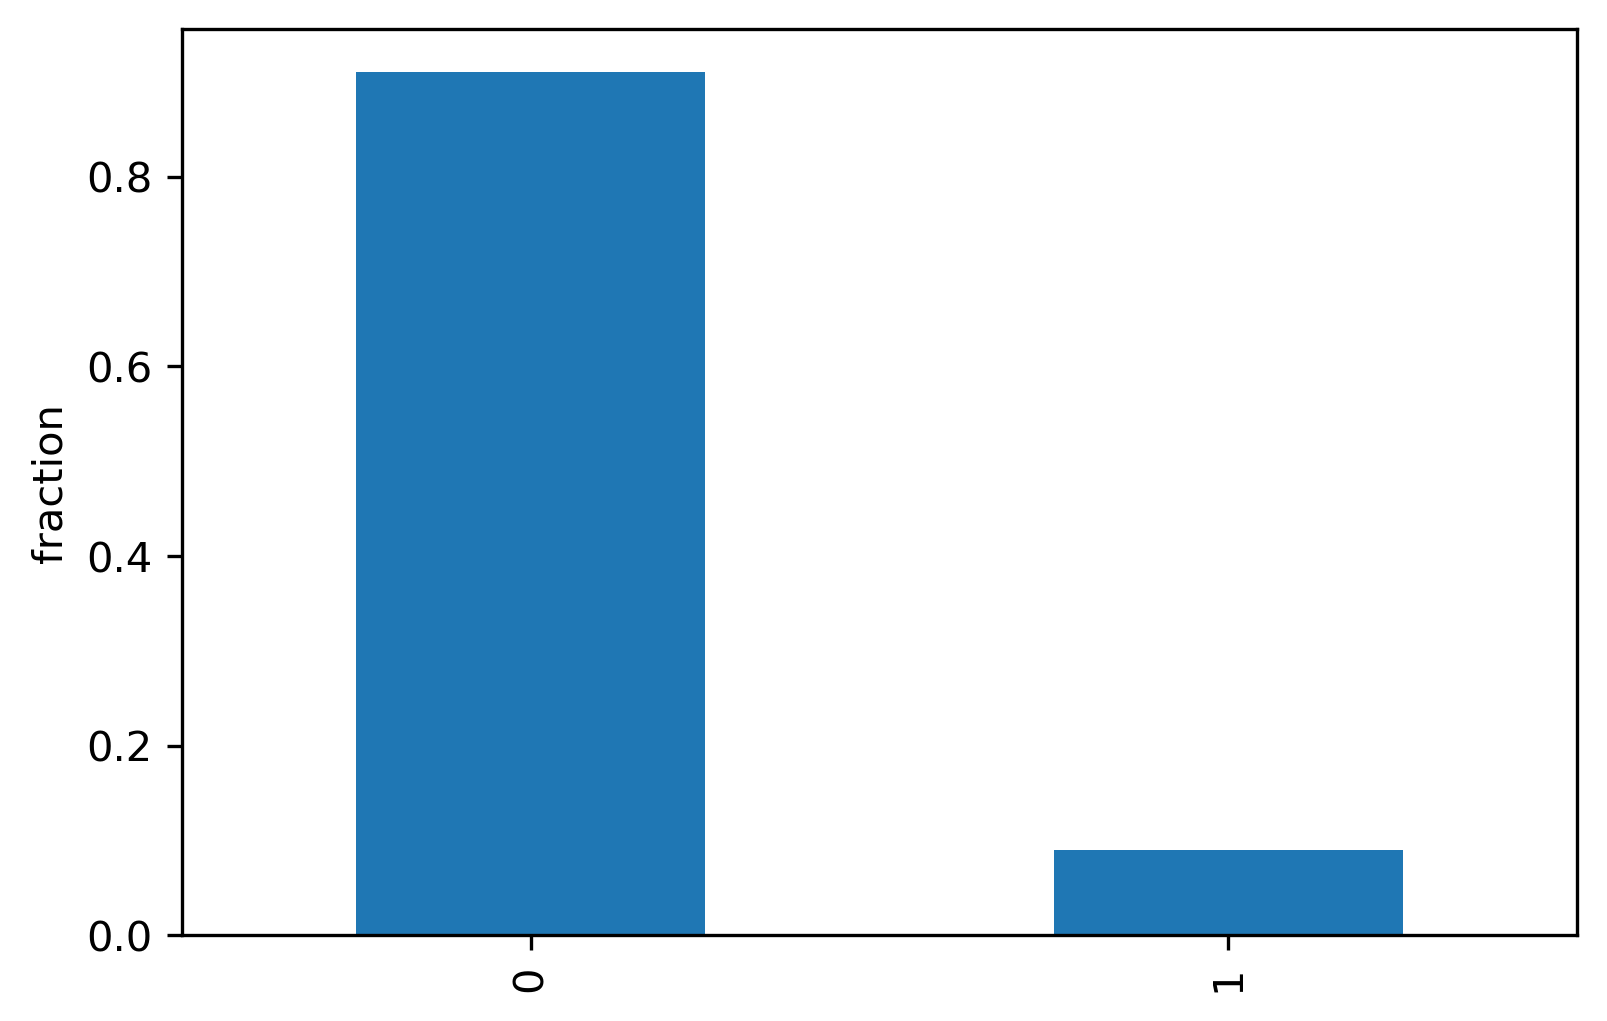

Threshold Value: 7609.496685459883
0    36548
1     3096
Name: shares, dtype: int64


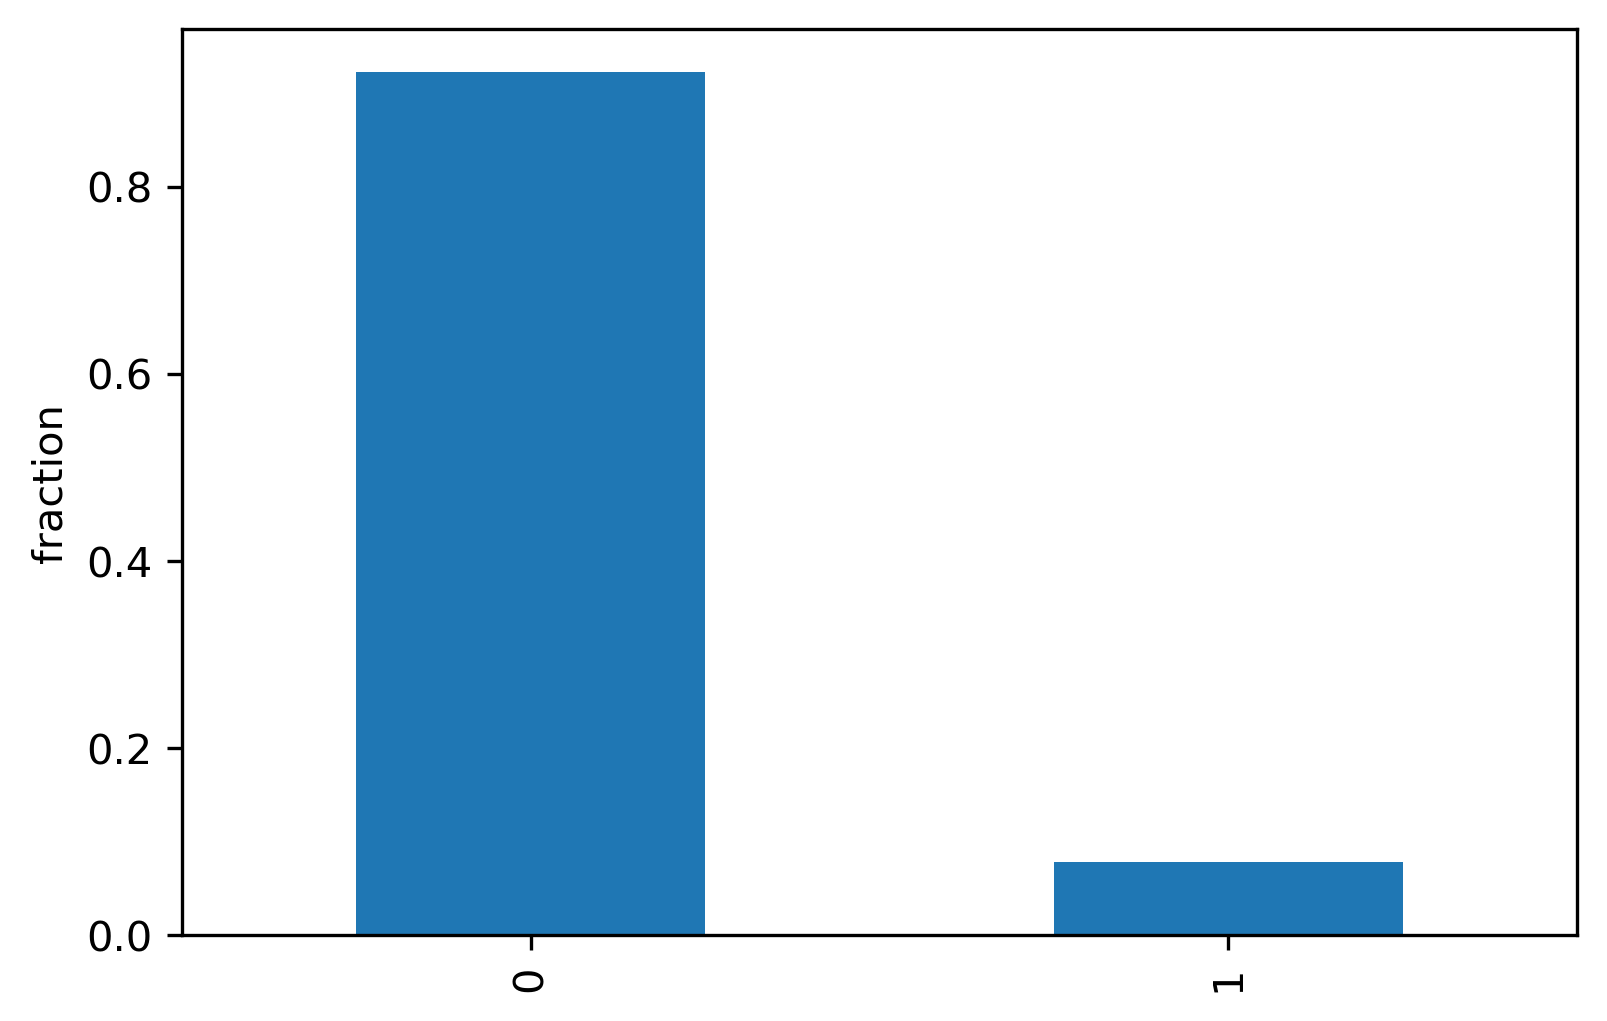

Threshold Value: 8554.672535565684
0    36954
1     2690
Name: shares, dtype: int64


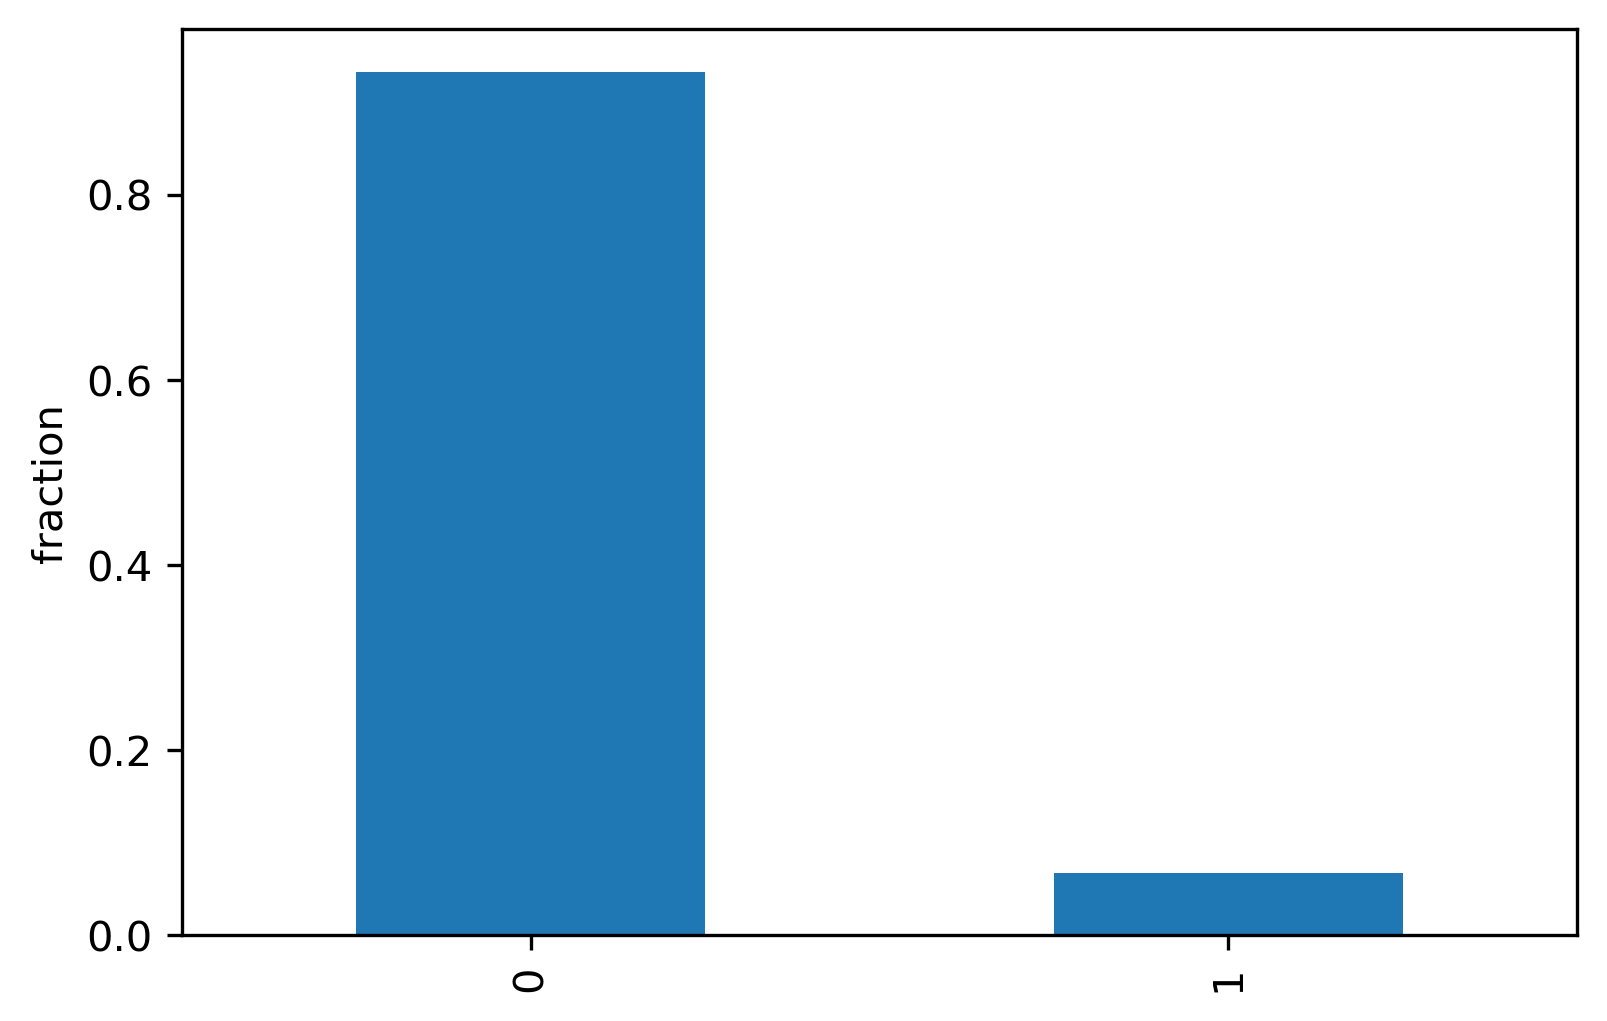

Threshold Value: 9617.248711152964
0    37331
1     2313
Name: shares, dtype: int64


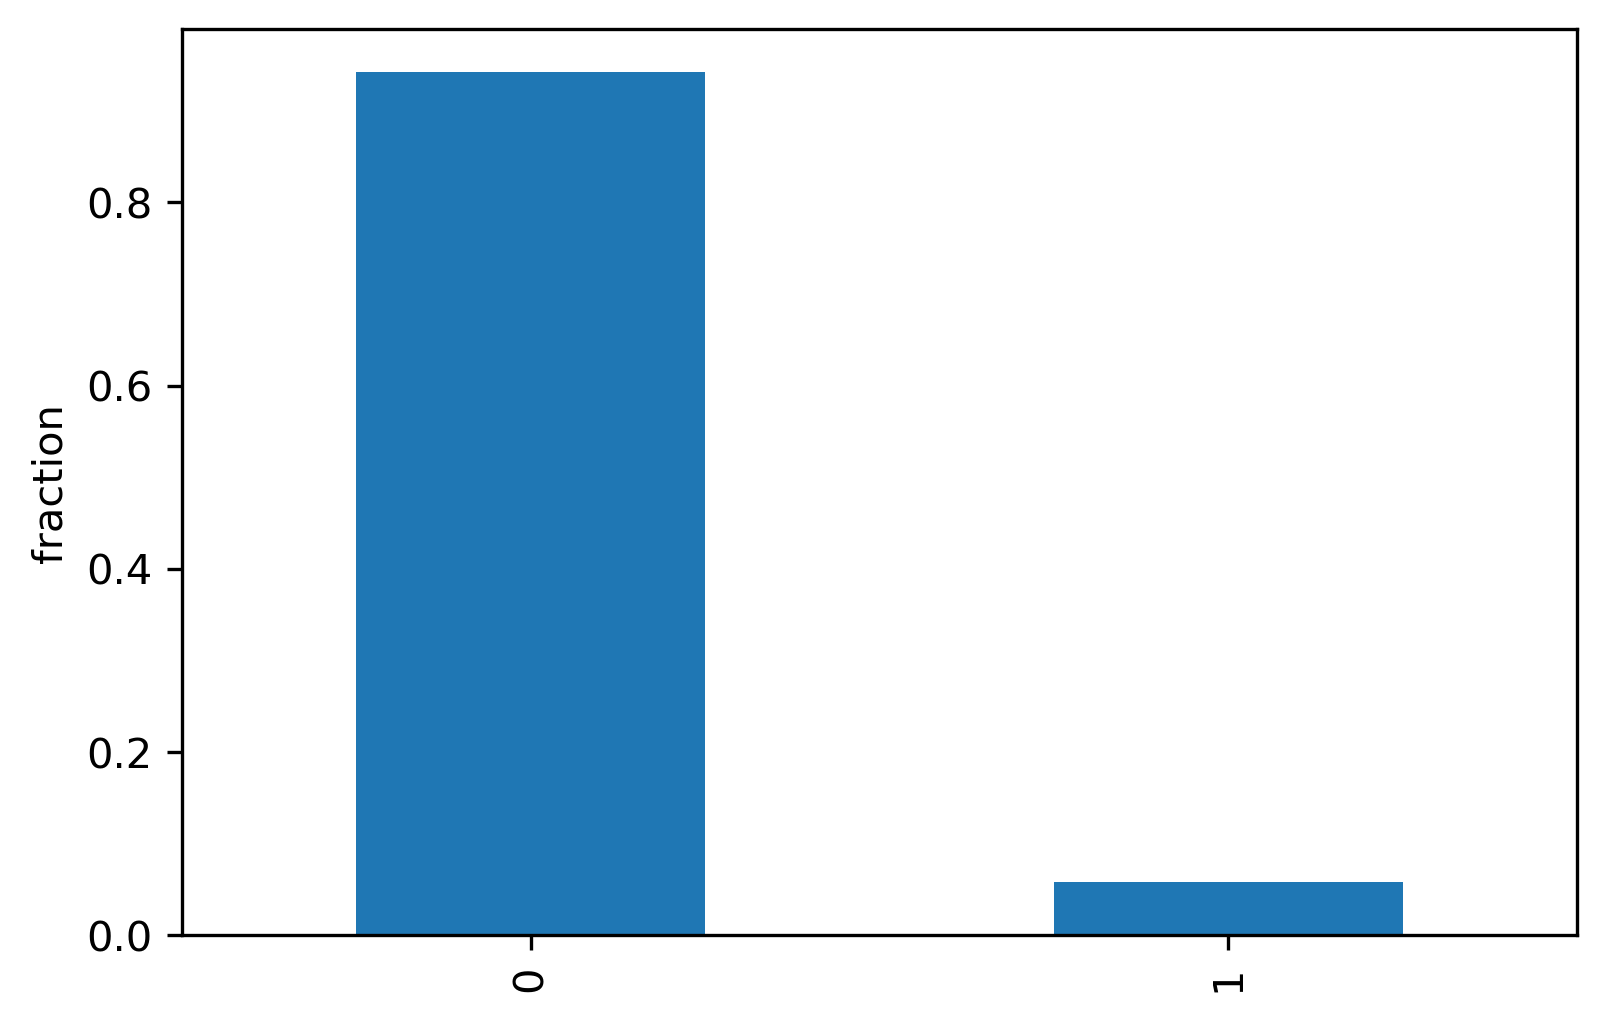

Threshold Value: 10811.807510766077
0    37663
1     1981
Name: shares, dtype: int64


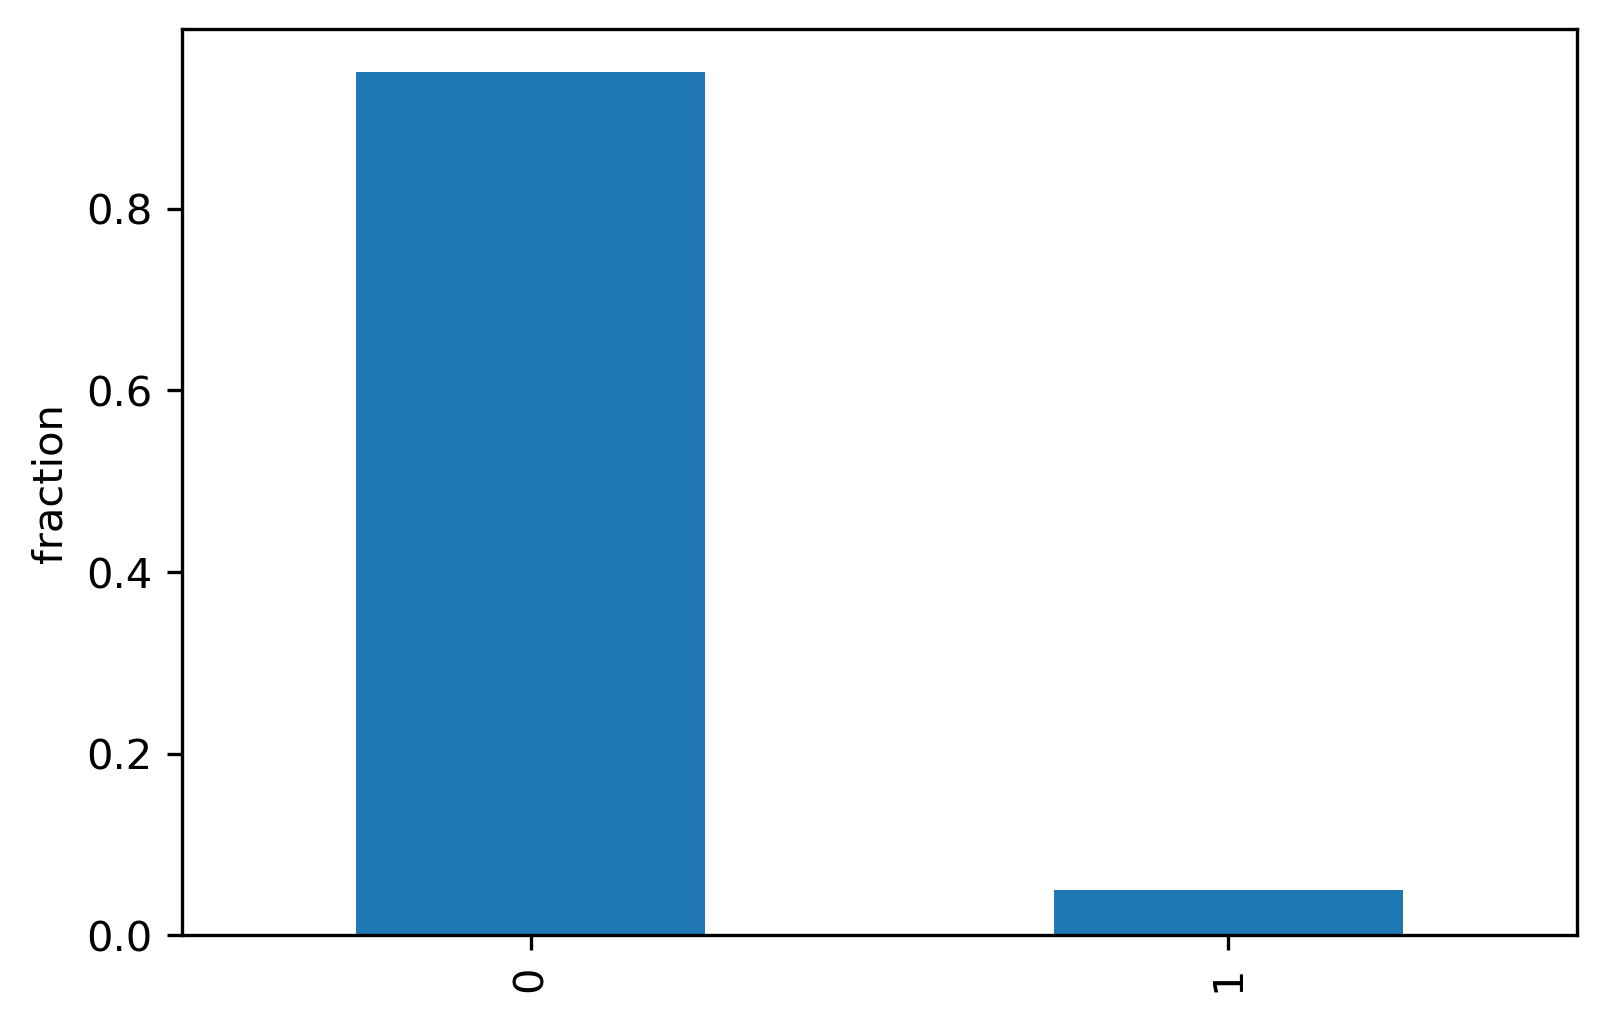

Threshold Value: 12154.742500762884
0    37954
1     1690
Name: shares, dtype: int64


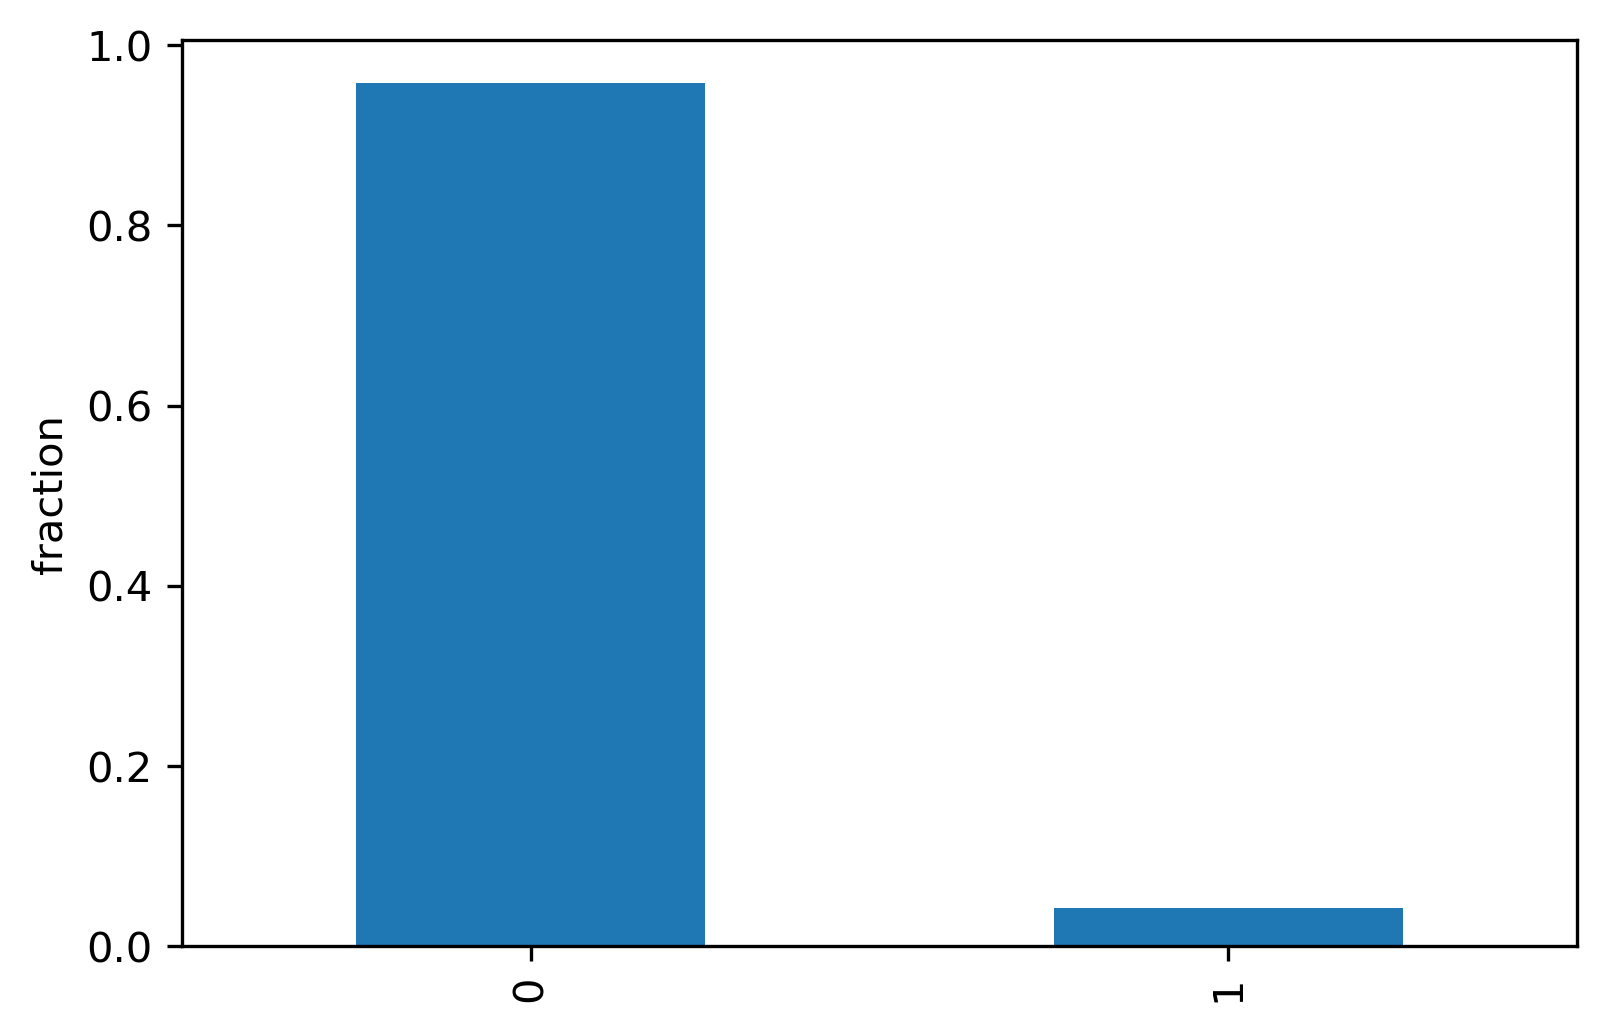

Threshold Value: 13664.483492953244
0    38200
1     1444
Name: shares, dtype: int64


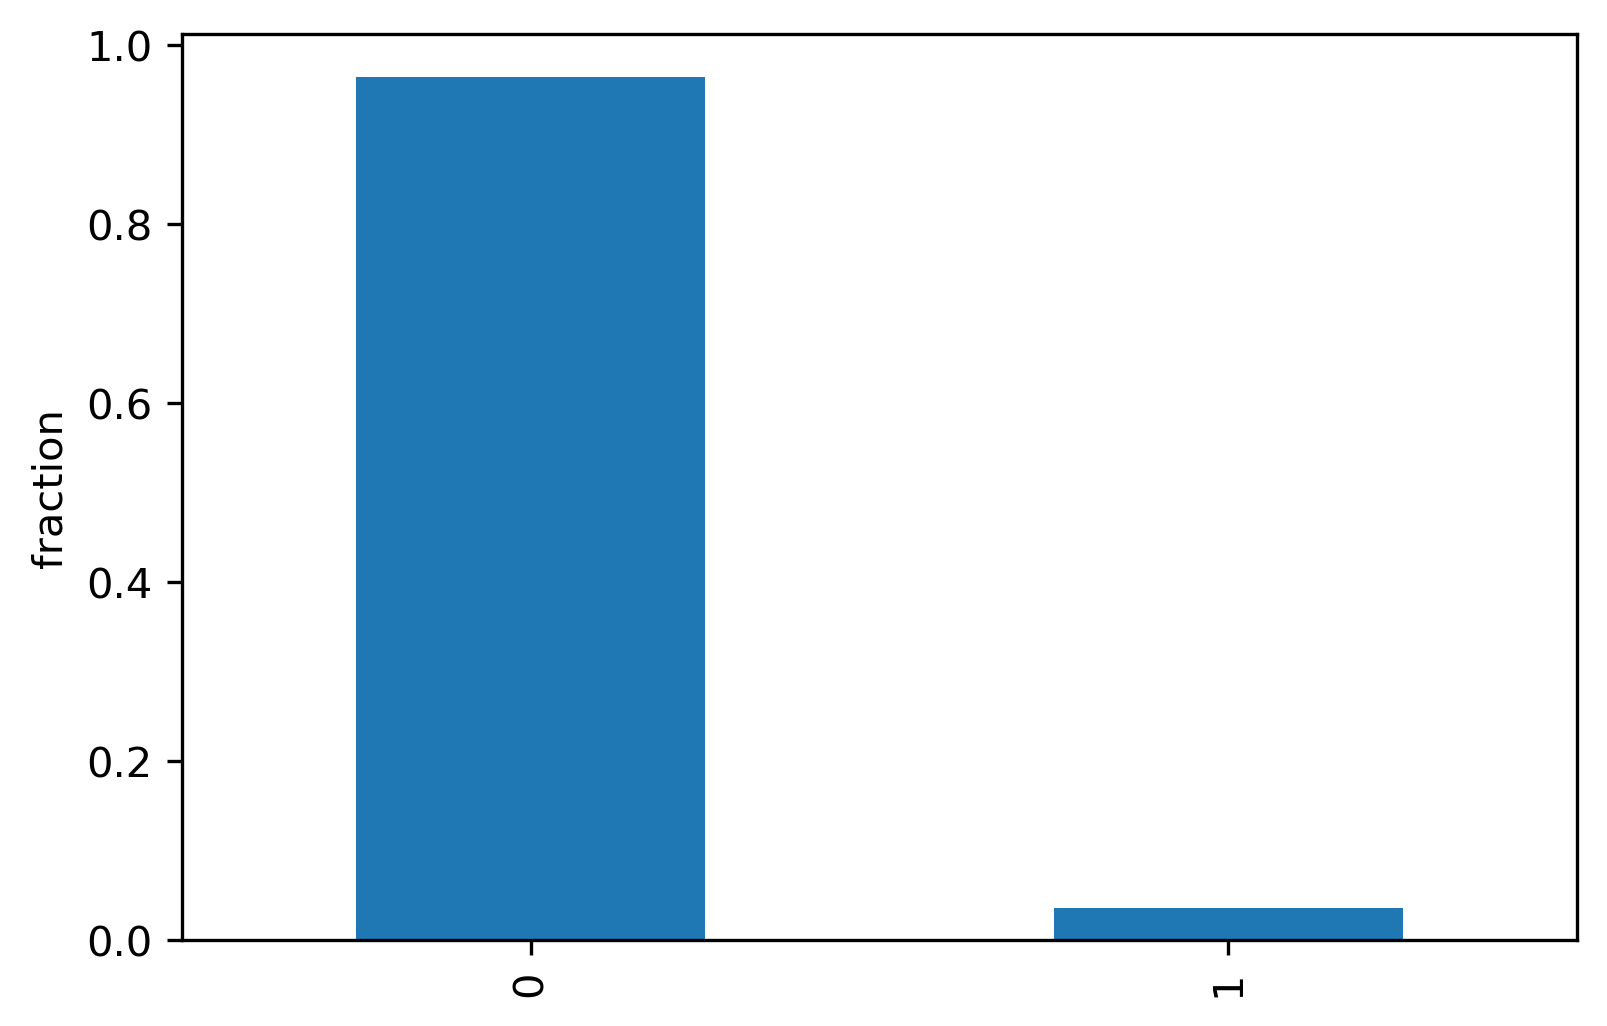

Threshold Value: 15361.749466718296
0    38410
1     1234
Name: shares, dtype: int64


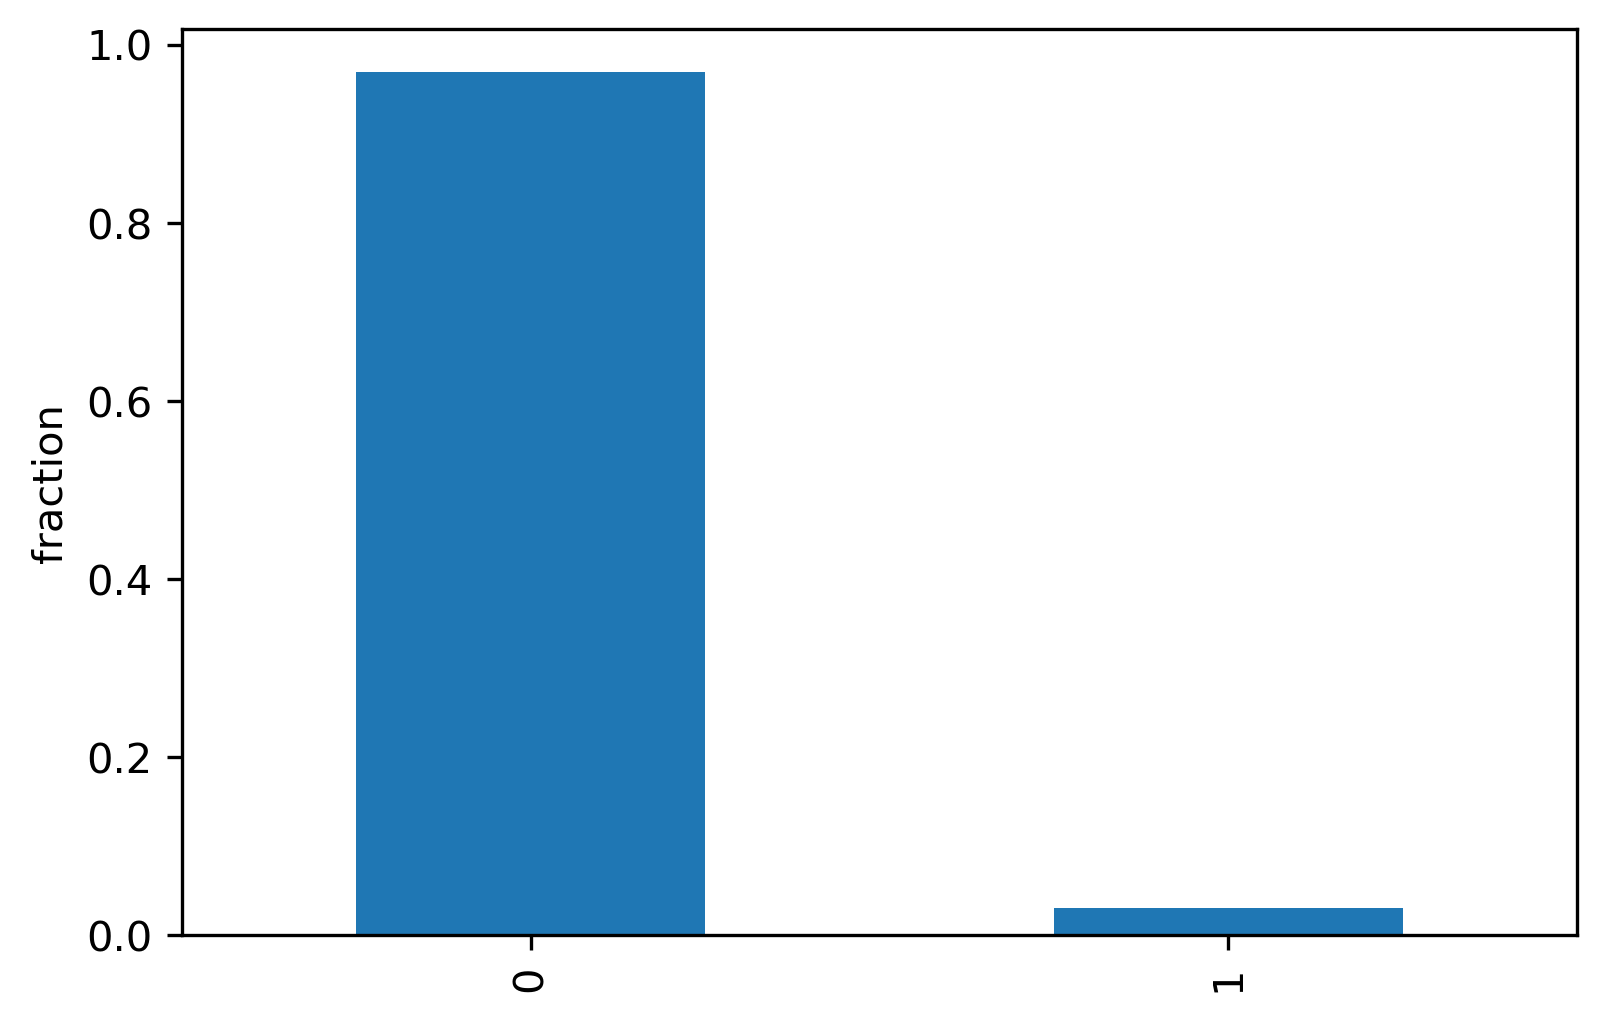

Threshold Value: 17269.83290659436
0    38615
1     1029
Name: shares, dtype: int64


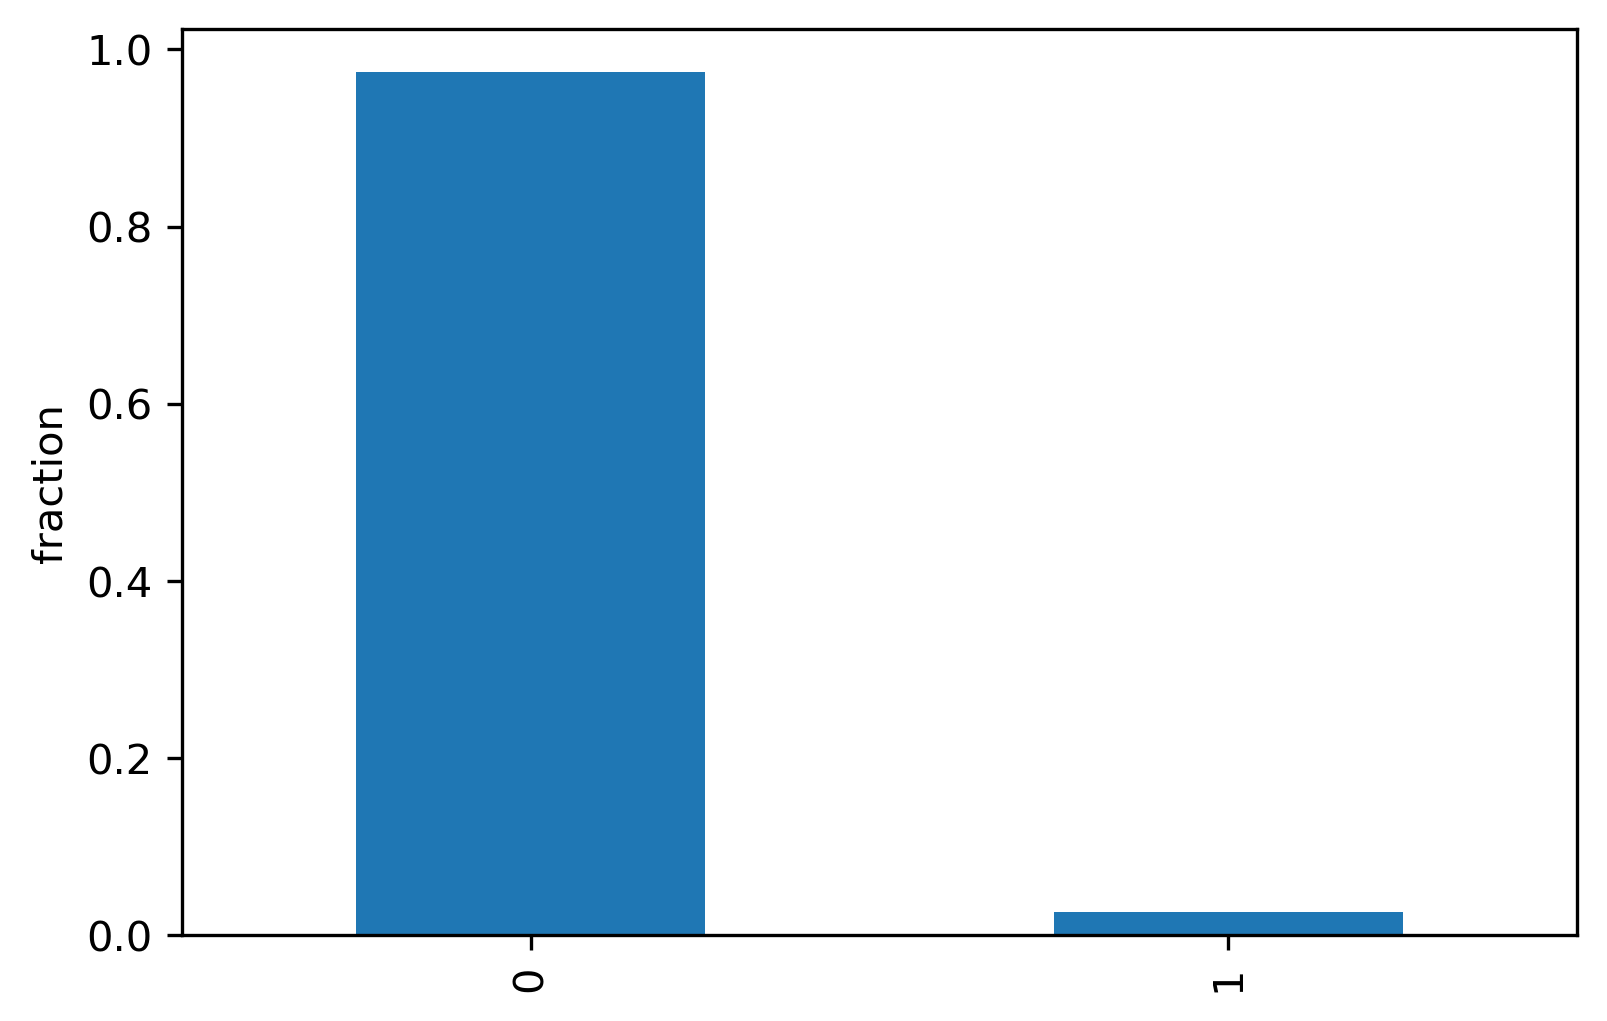

Threshold Value: 19414.919457438817
0    38793
1      851
Name: shares, dtype: int64


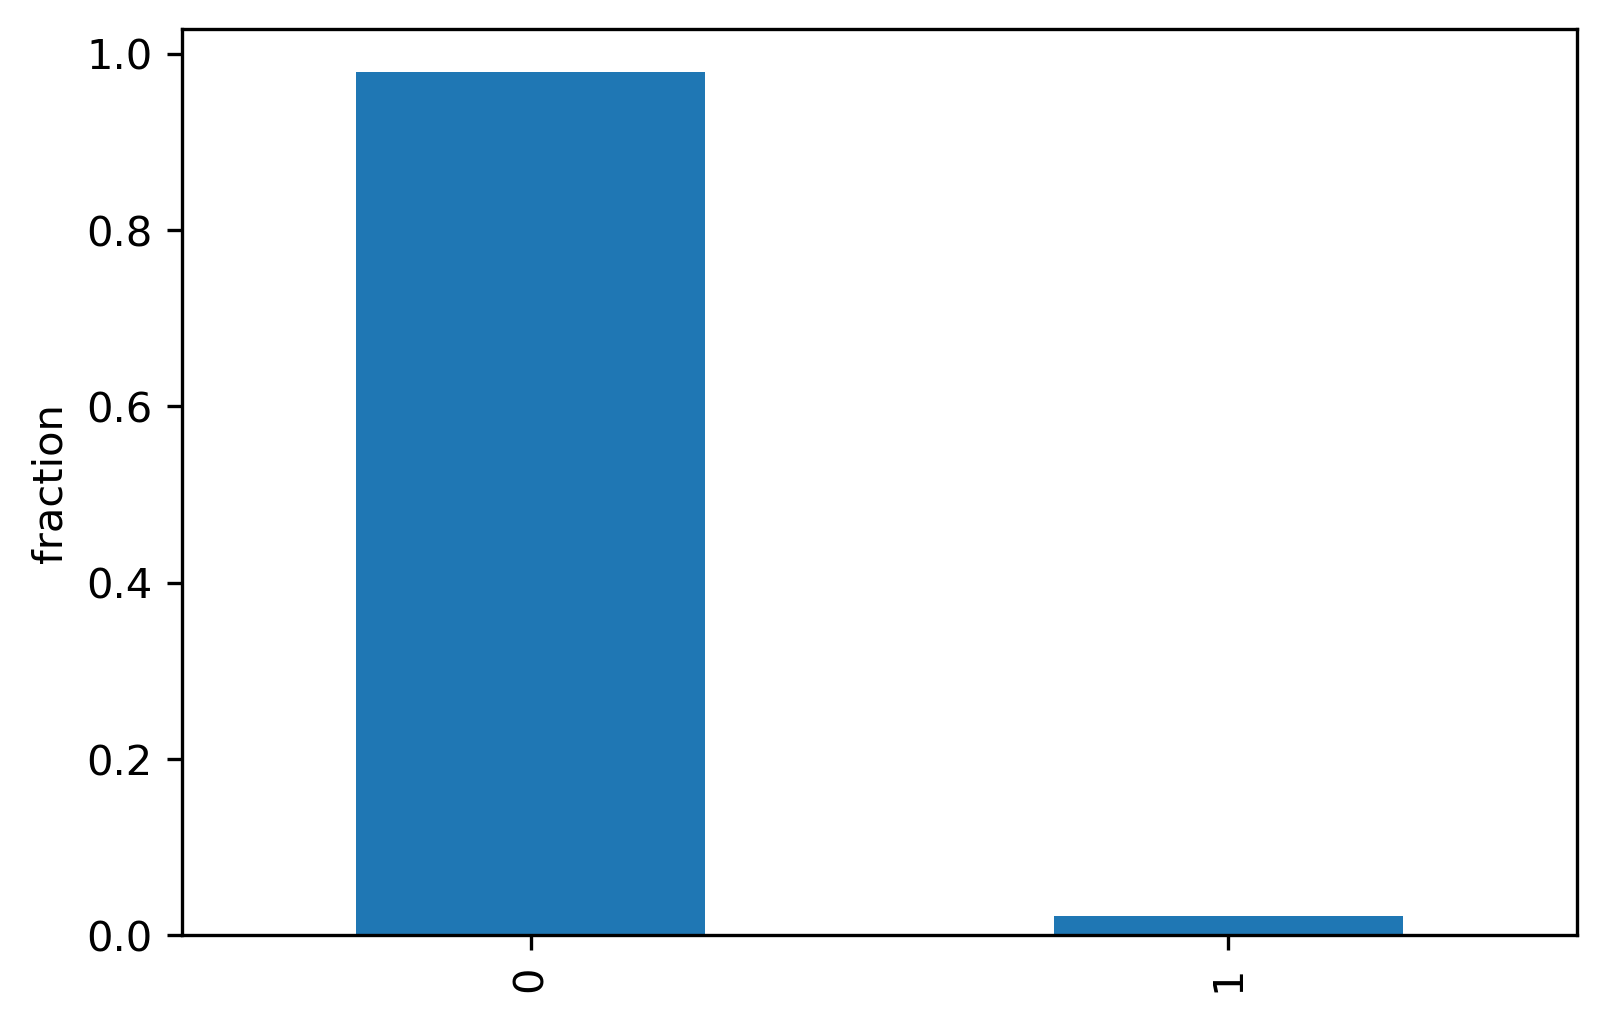

Threshold Value: 21826.44728397487
0    38925
1      719
Name: shares, dtype: int64


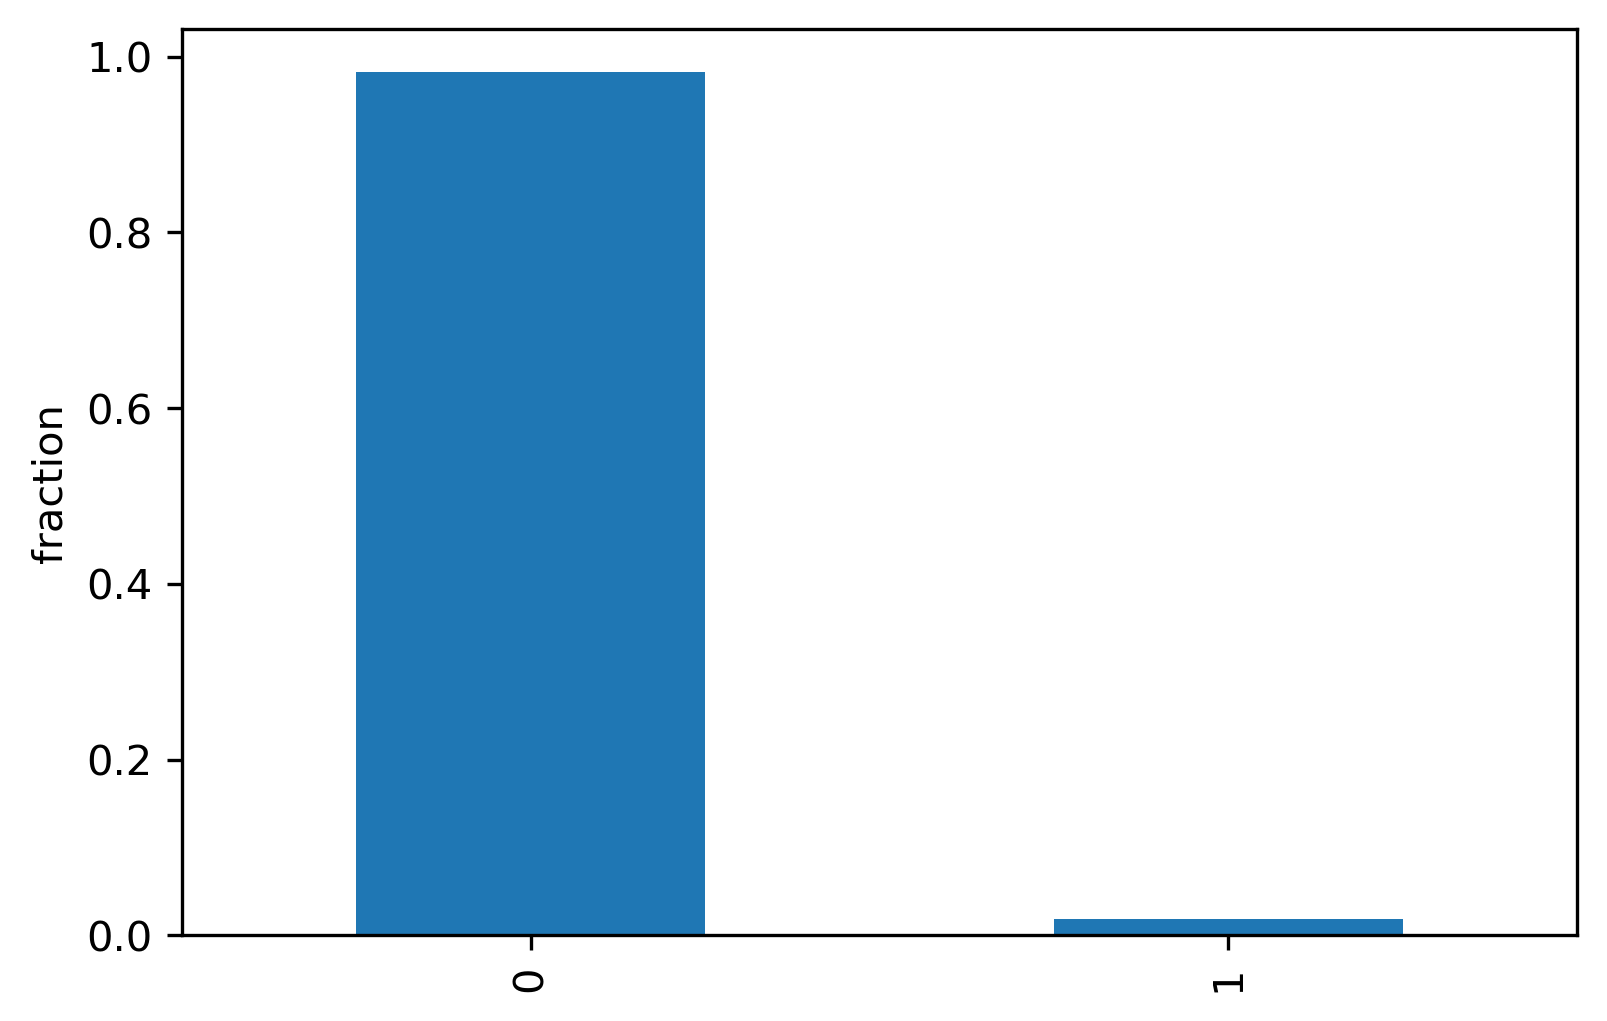

Threshold Value: 24537.51106639817
0    39053
1      591
Name: shares, dtype: int64


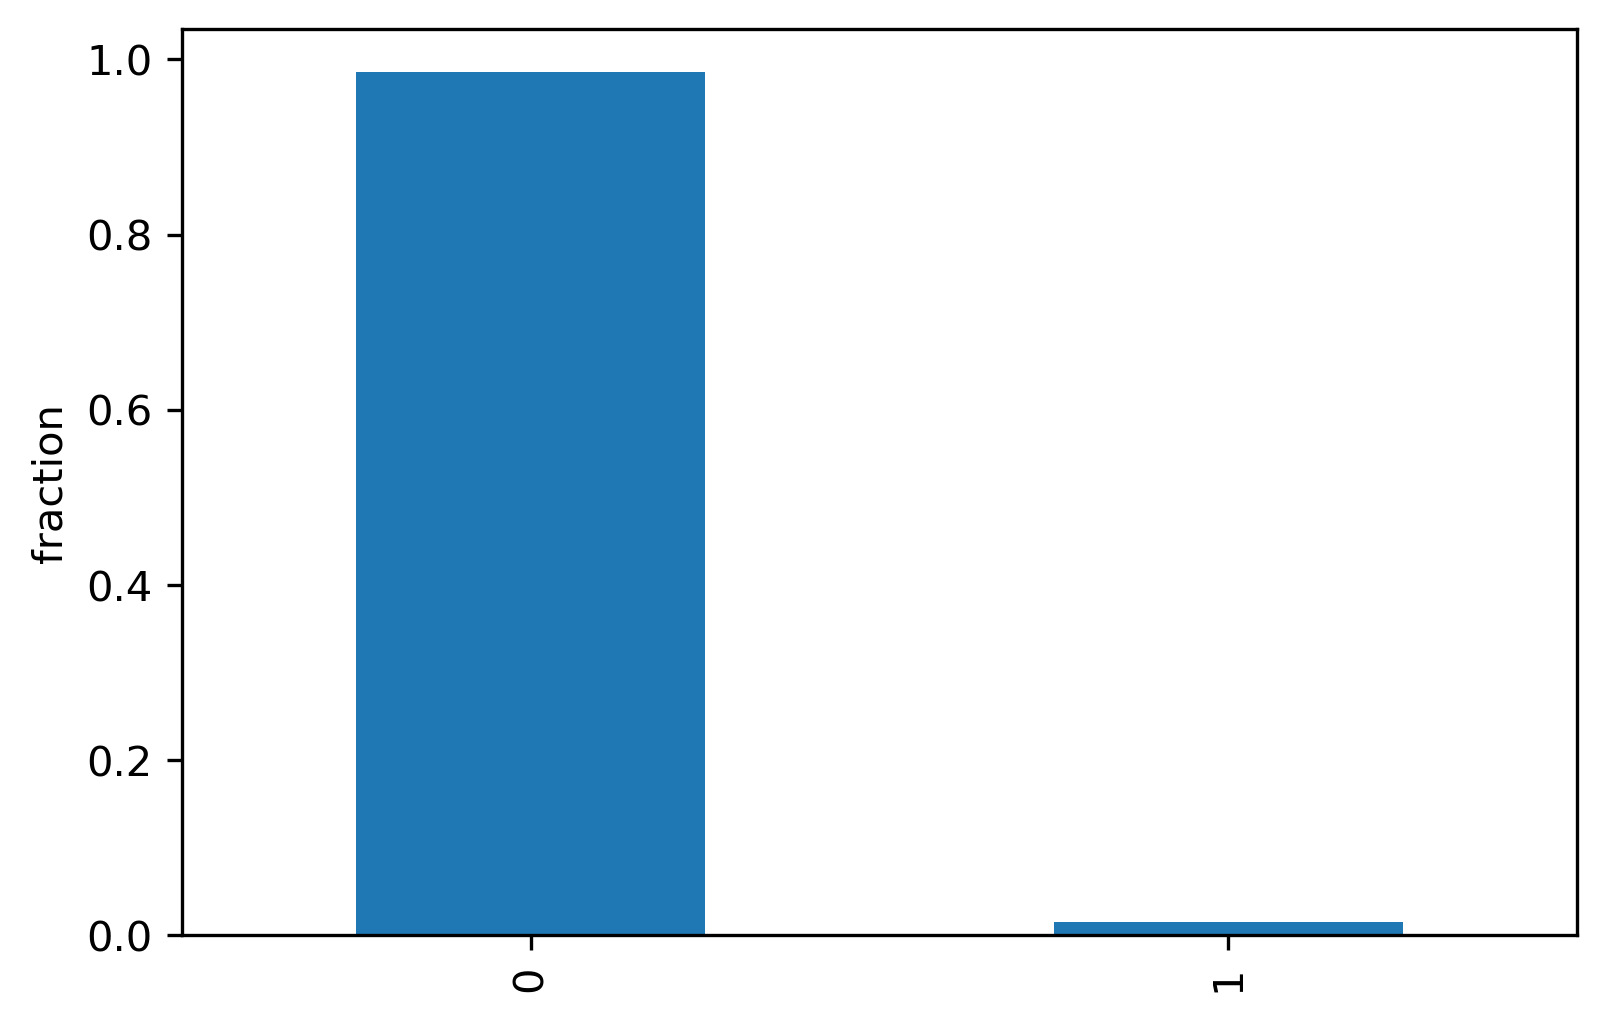

Threshold Value: 27585.316176291868
0    39162
1      482
Name: shares, dtype: int64


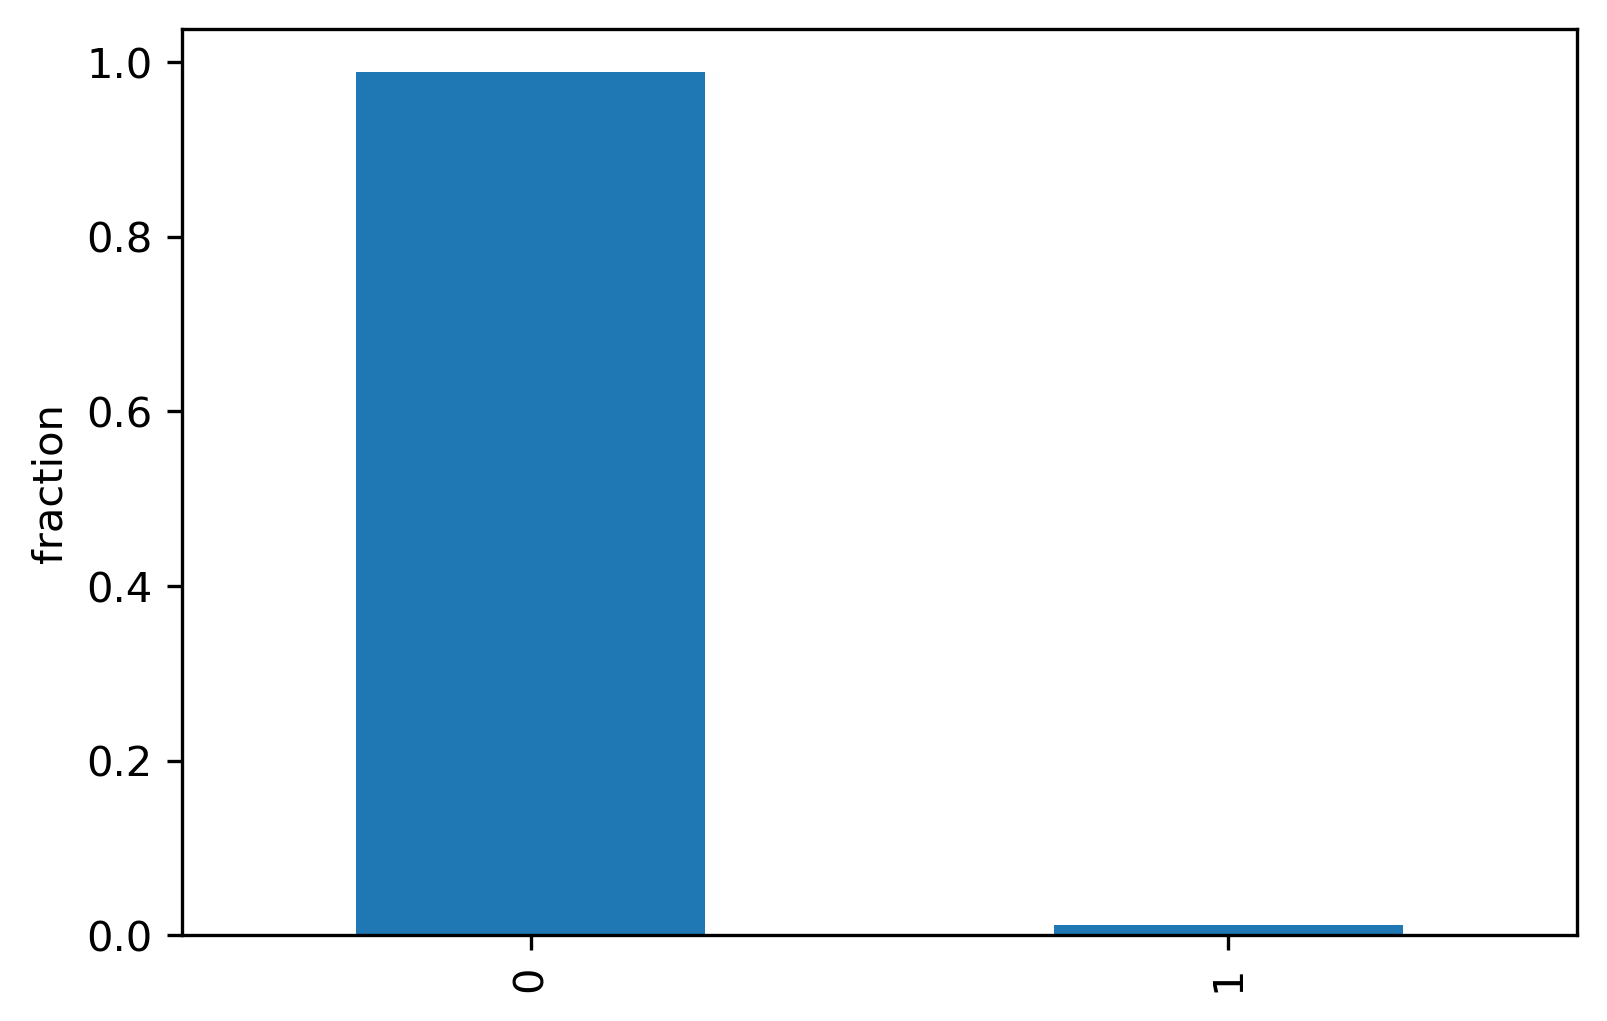

Threshold Value: 31011.689265747755
0    39232
1      412
Name: shares, dtype: int64


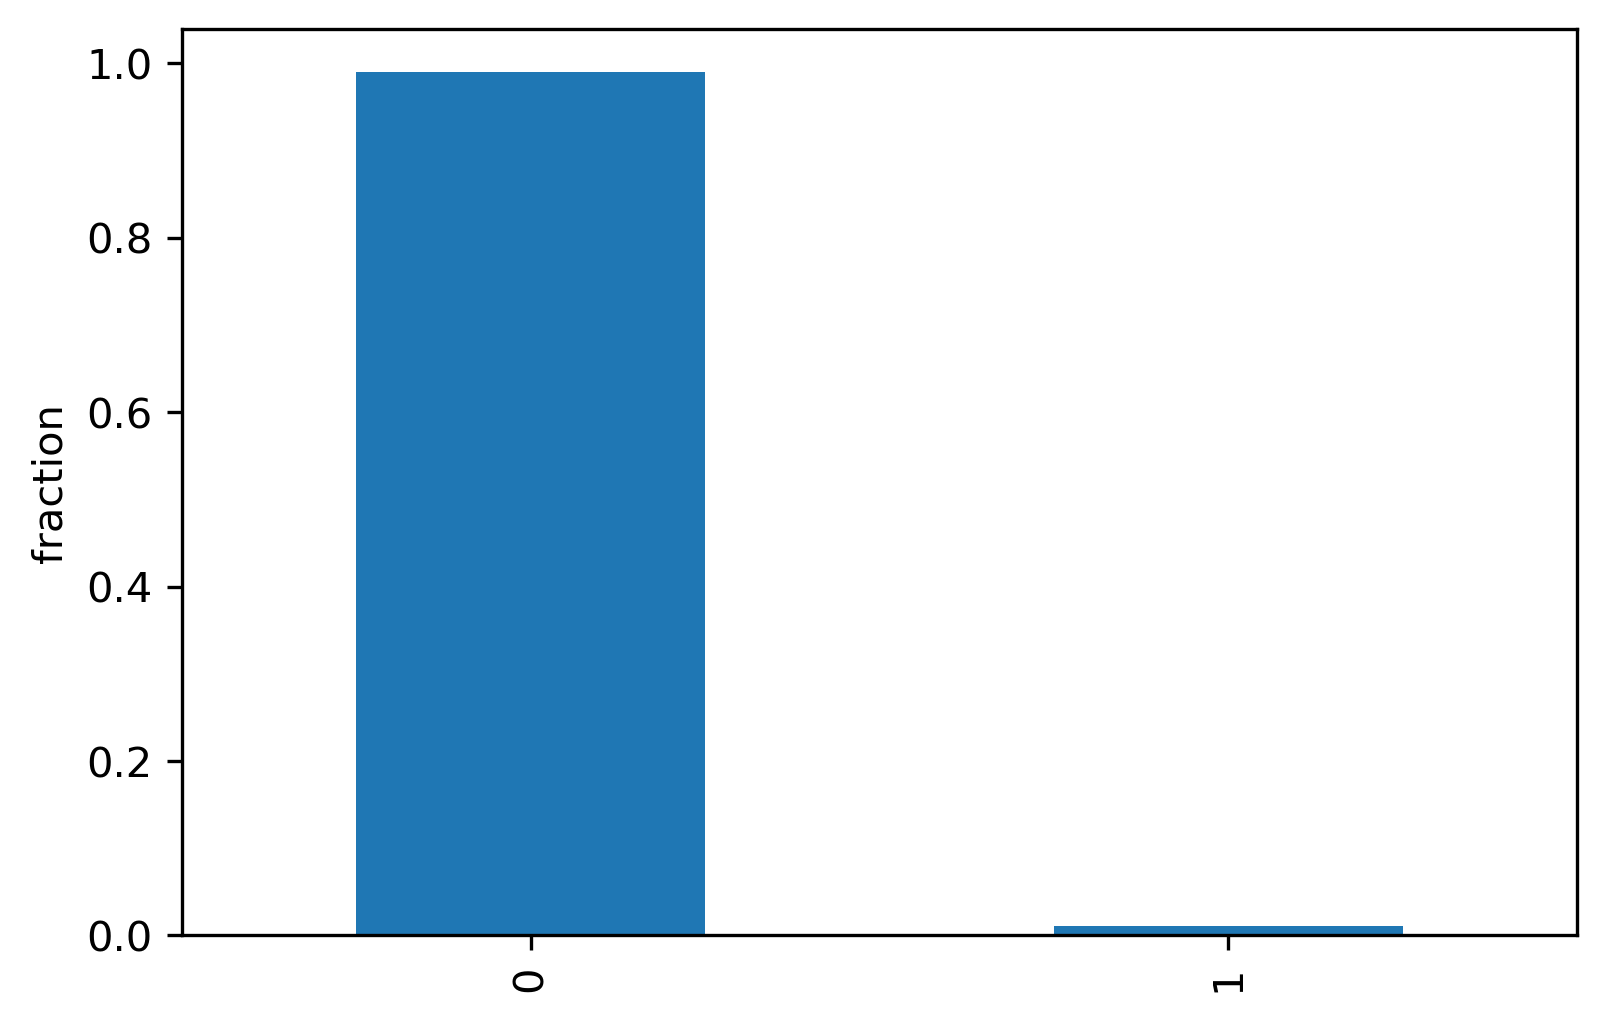

Threshold Value: 34863.65227678088
0    39292
1      352
Name: shares, dtype: int64


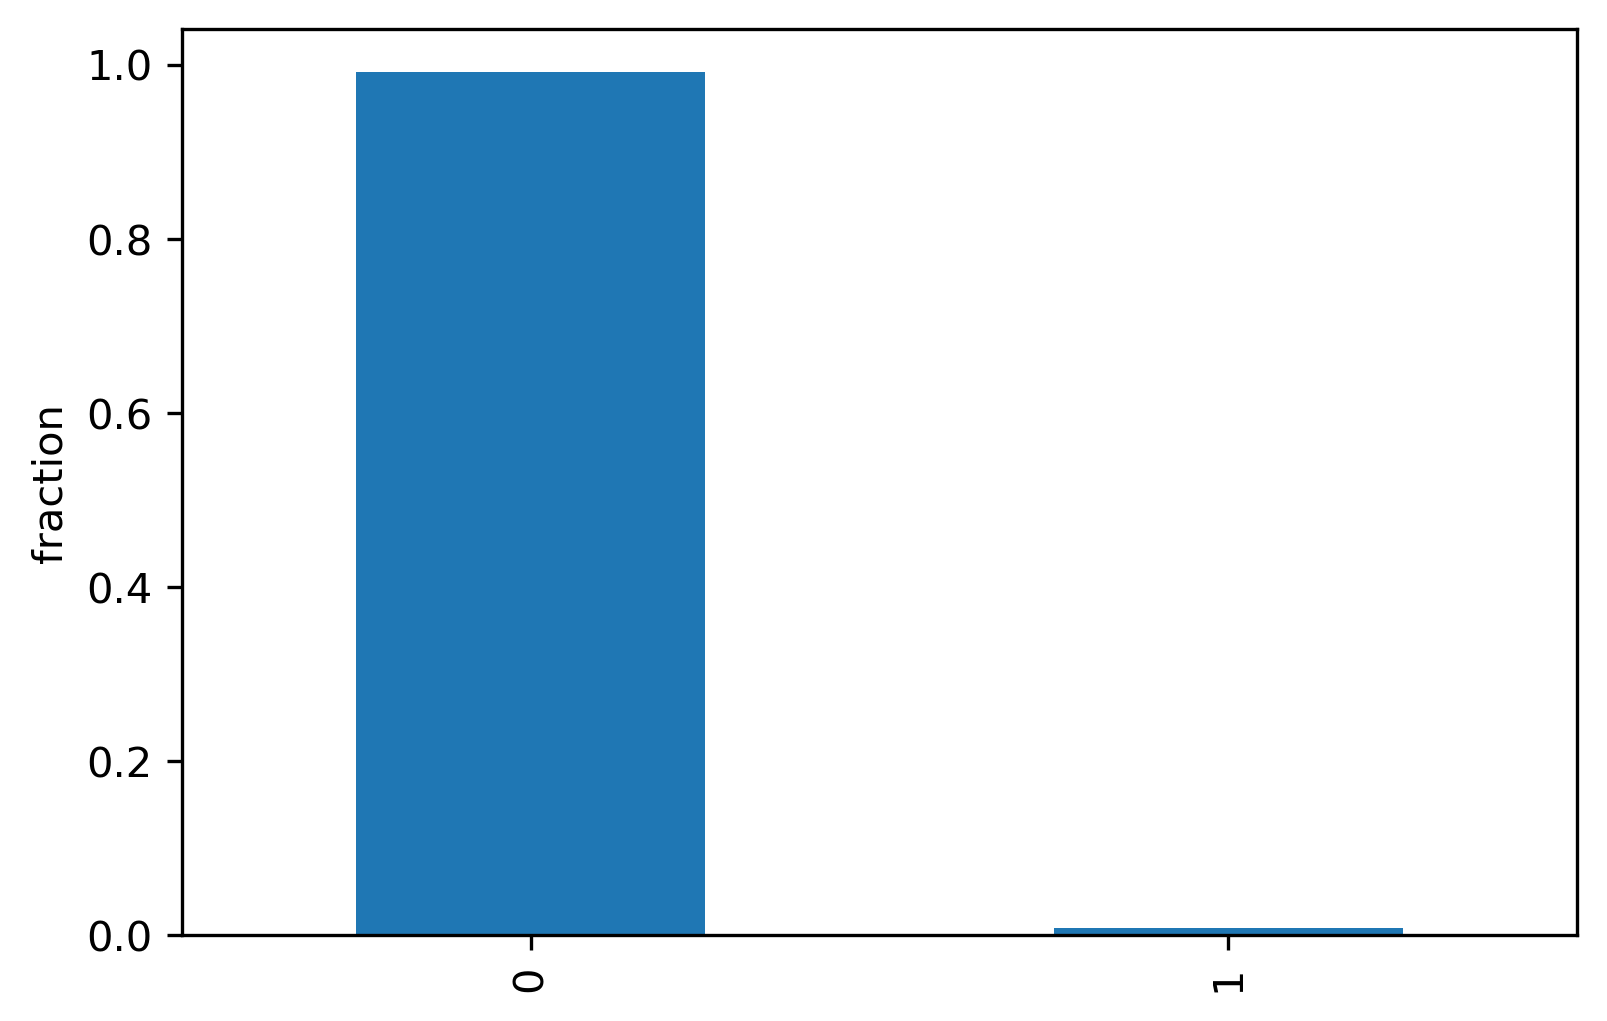

Threshold Value: 39194.06774847221
0    39346
1      298
Name: shares, dtype: int64


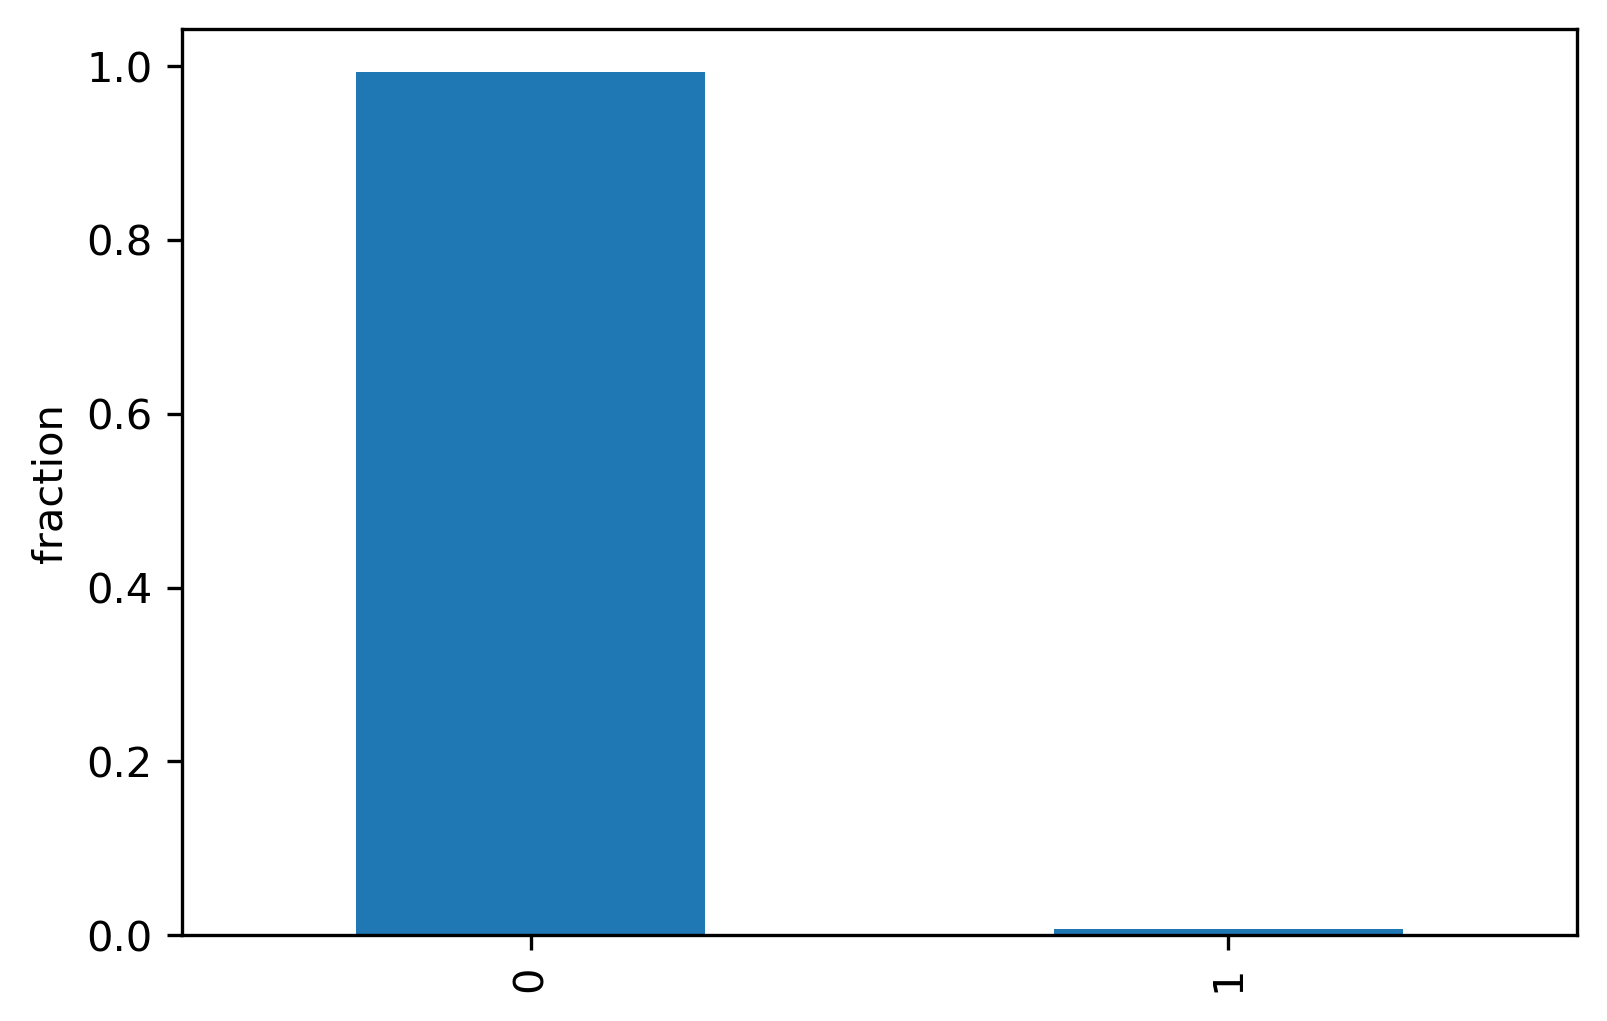

Threshold Value: 44062.36427773573
0    39392
1      252
Name: shares, dtype: int64


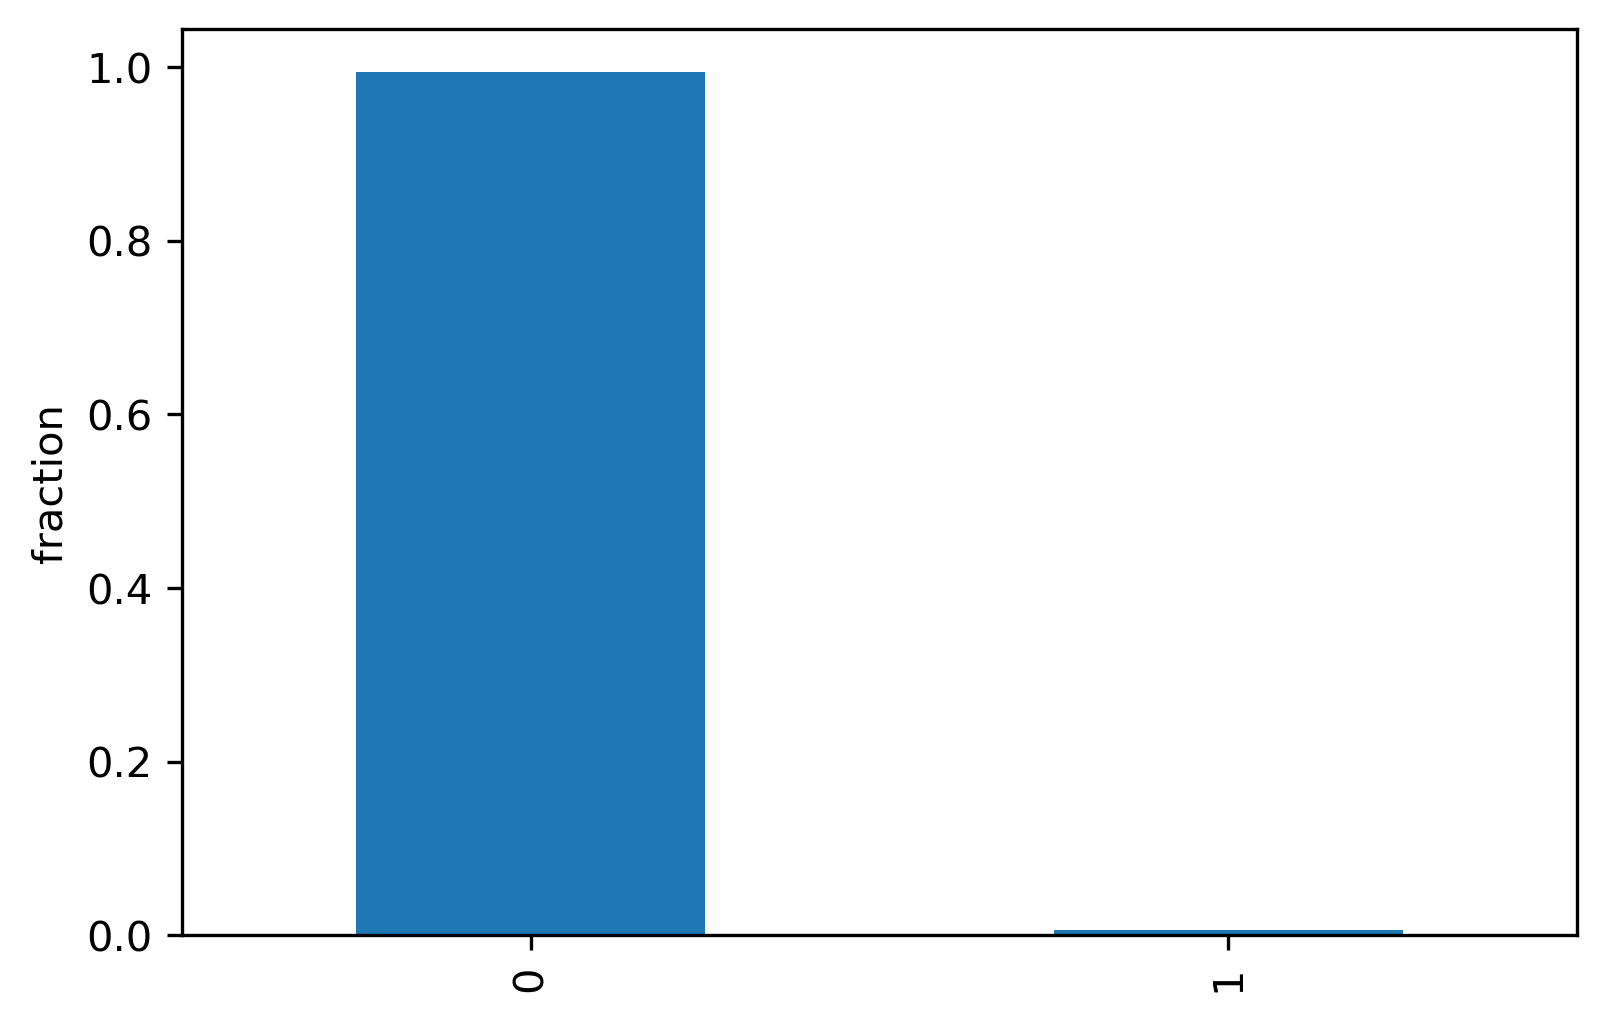

Threshold Value: 49535.352089591805
0    39438
1      206
Name: shares, dtype: int64


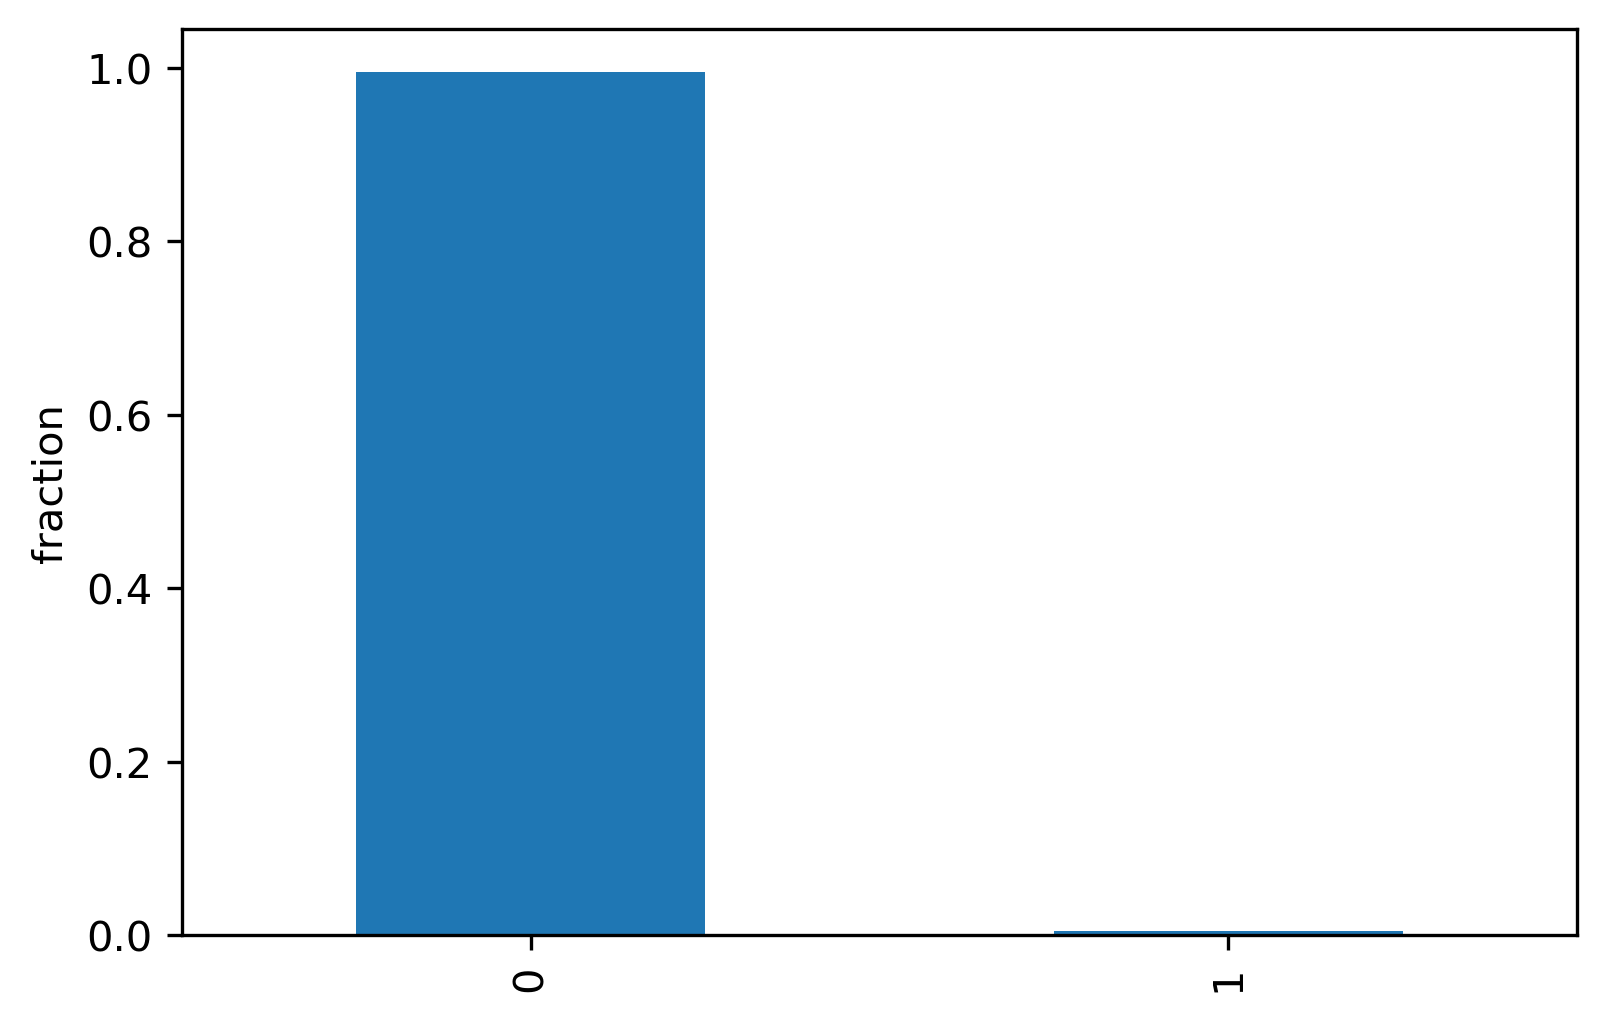

Threshold Value: 55688.13990945267
0    39481
1      163
Name: shares, dtype: int64


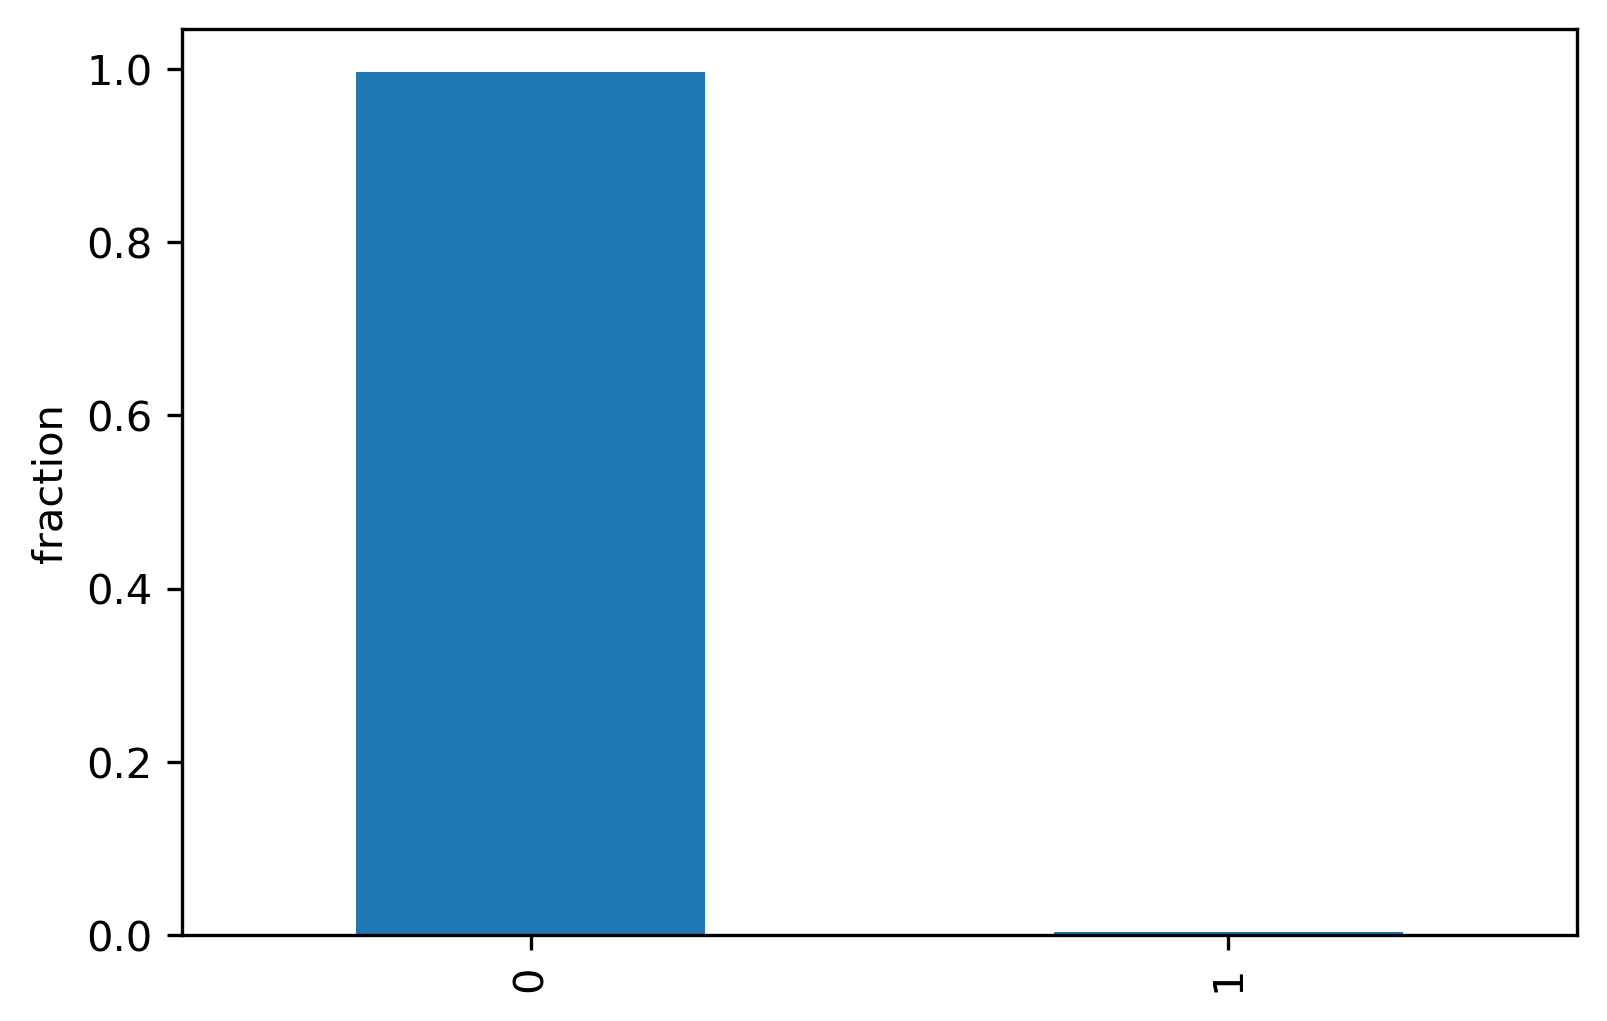

Threshold Value: 62605.16572014828
0    39510
1      134
Name: shares, dtype: int64


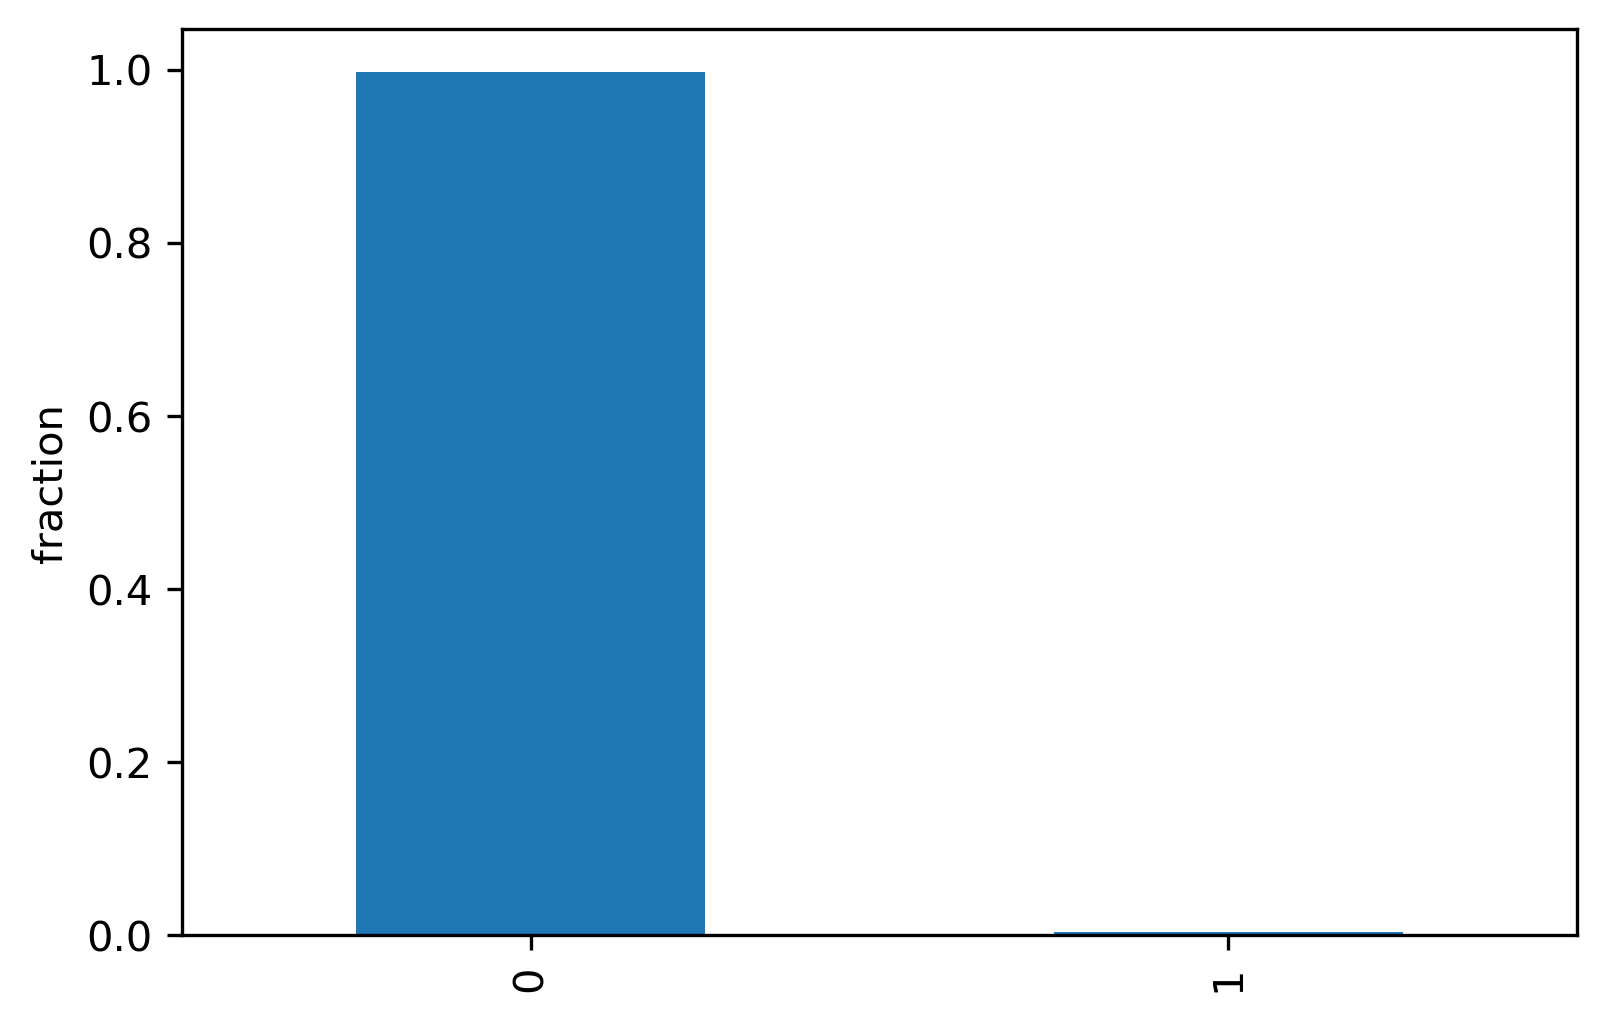

Threshold Value: 70381.35554931562
0    39534
1      110
Name: shares, dtype: int64


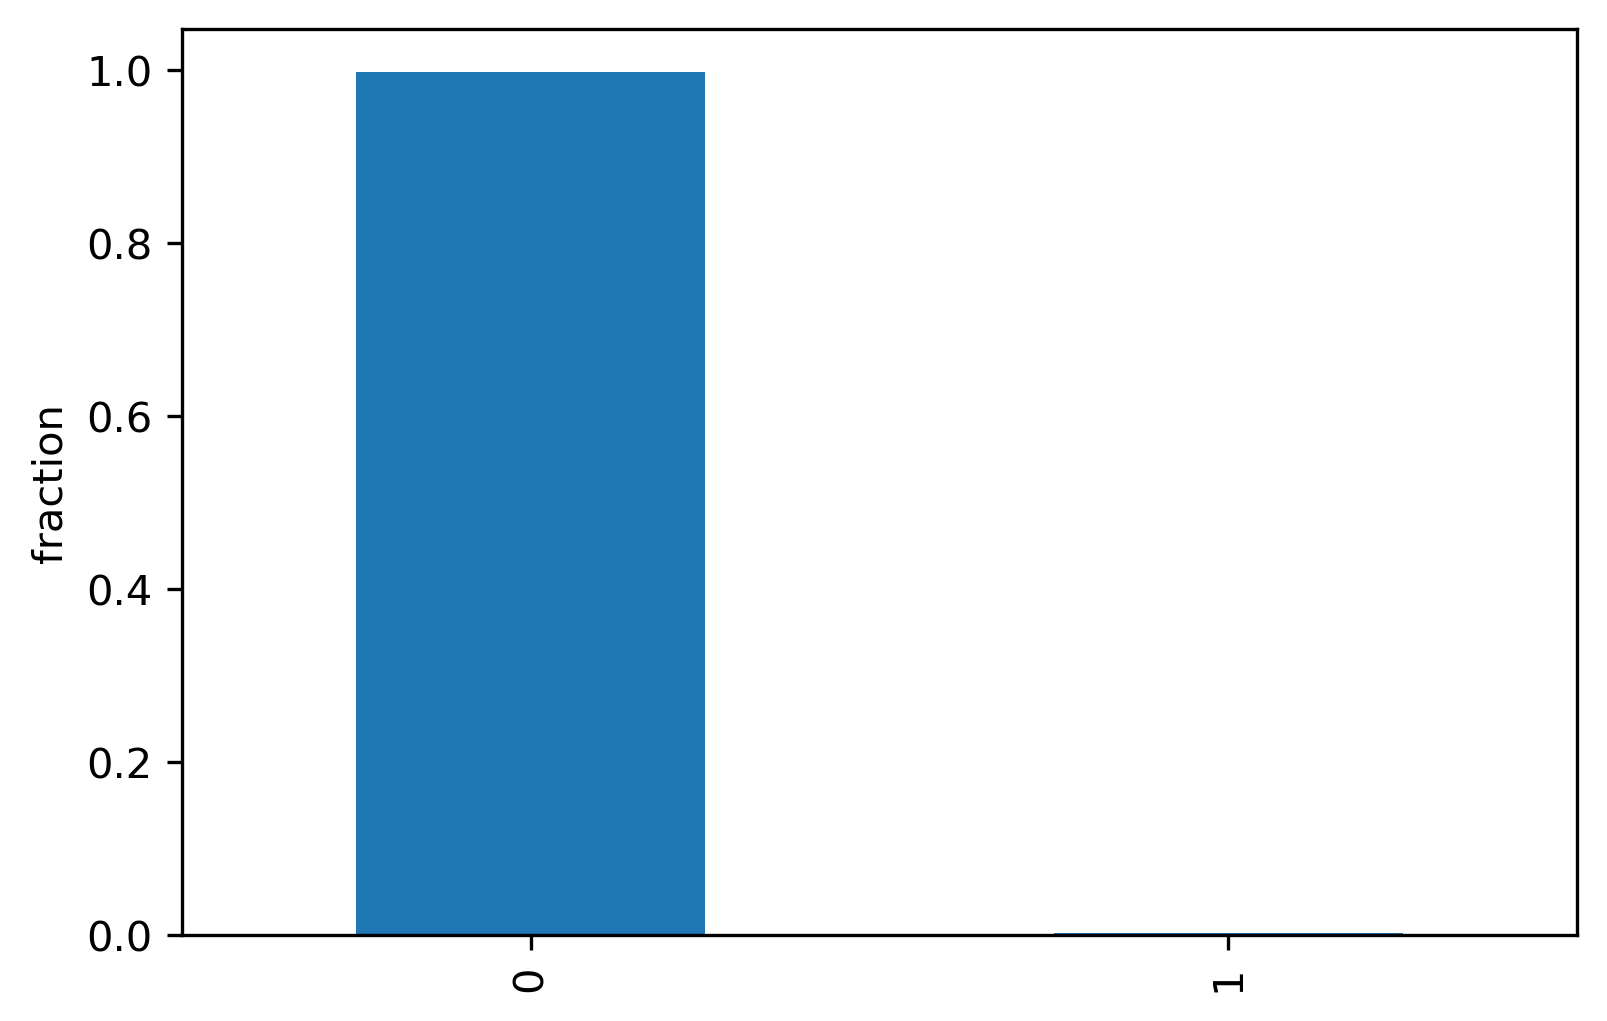

Threshold Value: 79123.42618981327
0    39555
1       89
Name: shares, dtype: int64


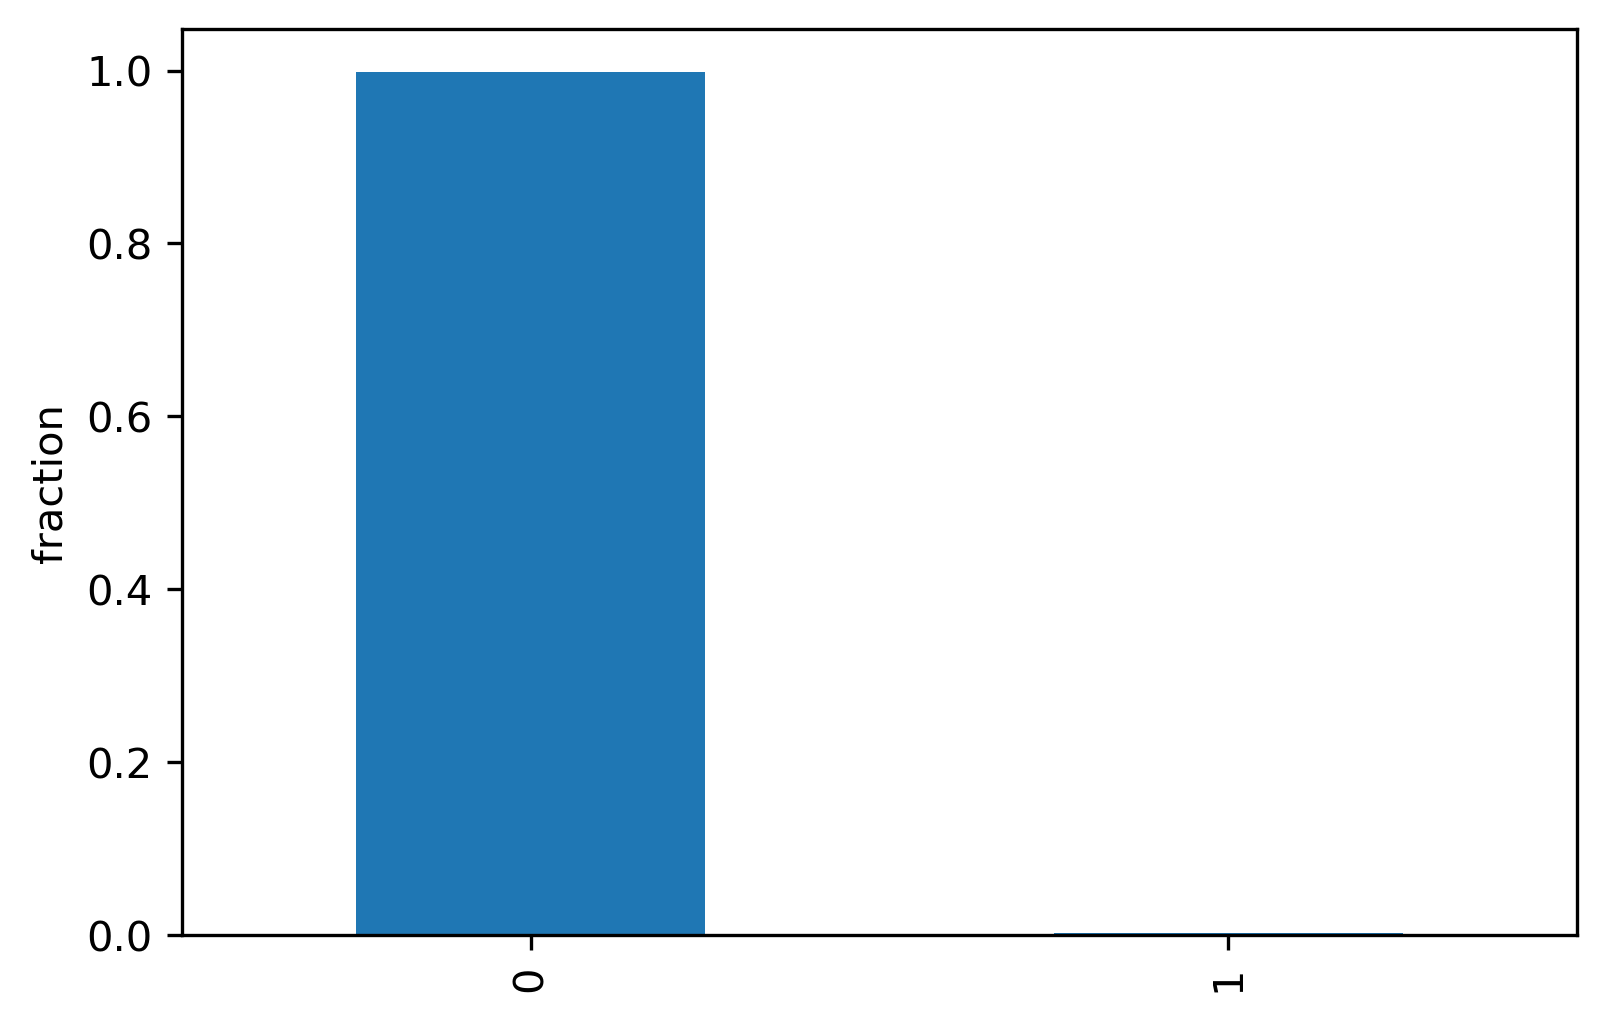

Threshold Value: 88951.34973108236
0    39569
1       75
Name: shares, dtype: int64


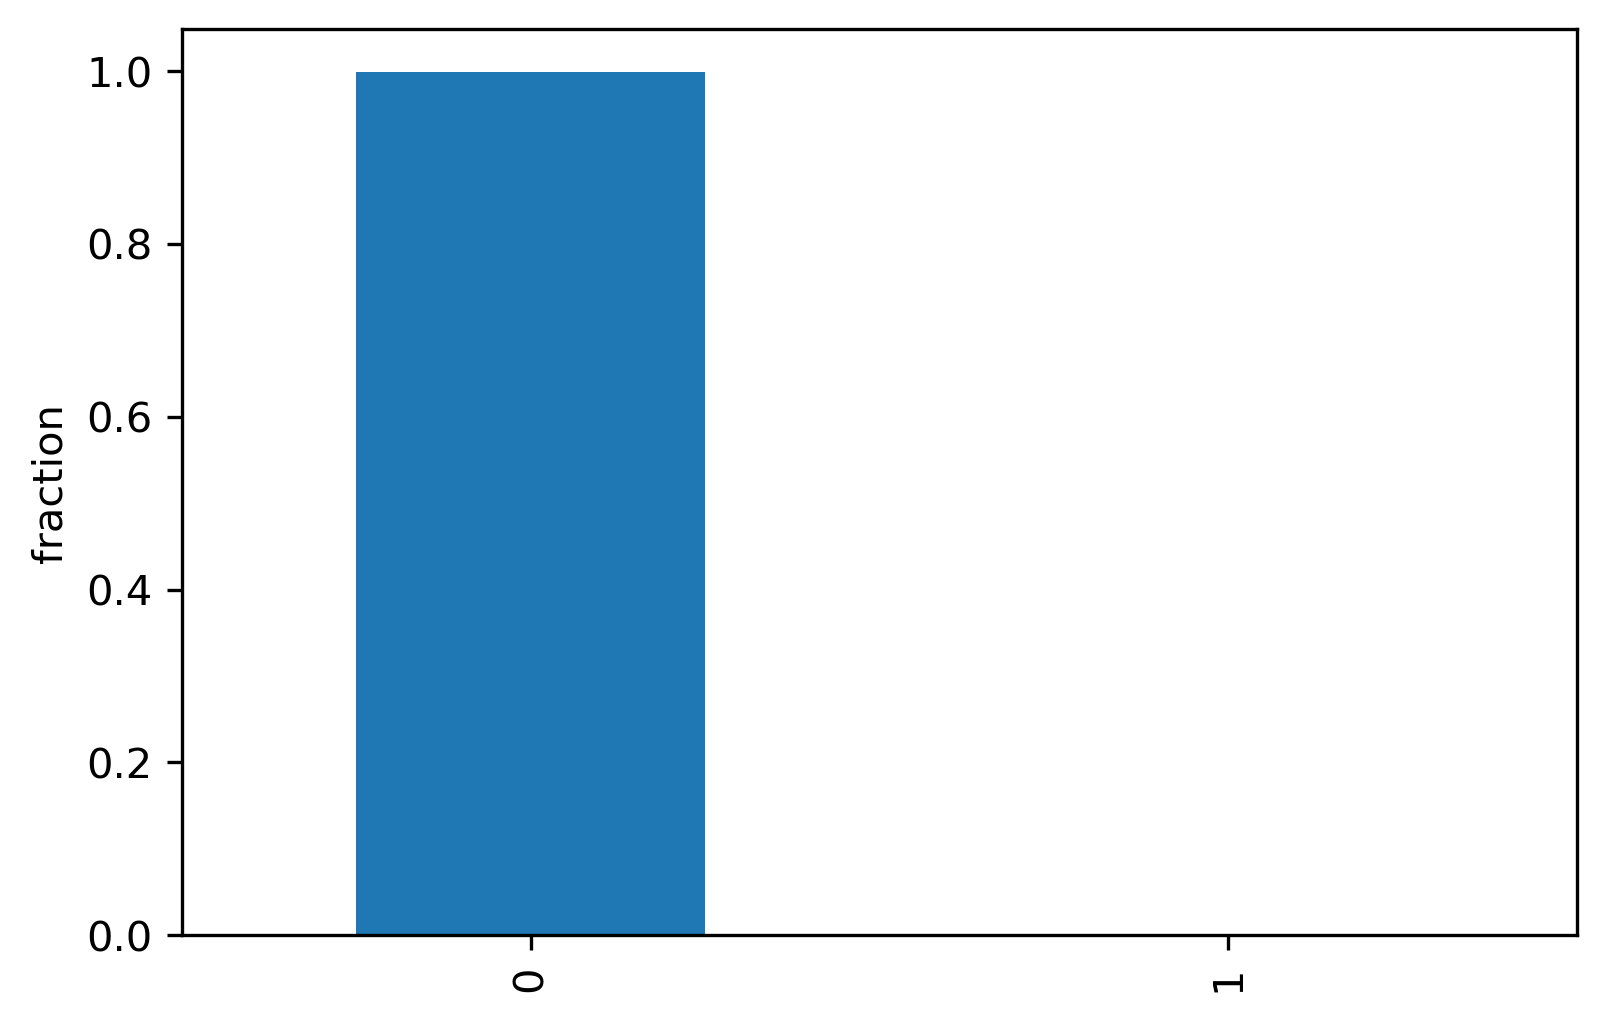

Threshold Value: 100000.0
0    39586
1       58
Name: shares, dtype: int64


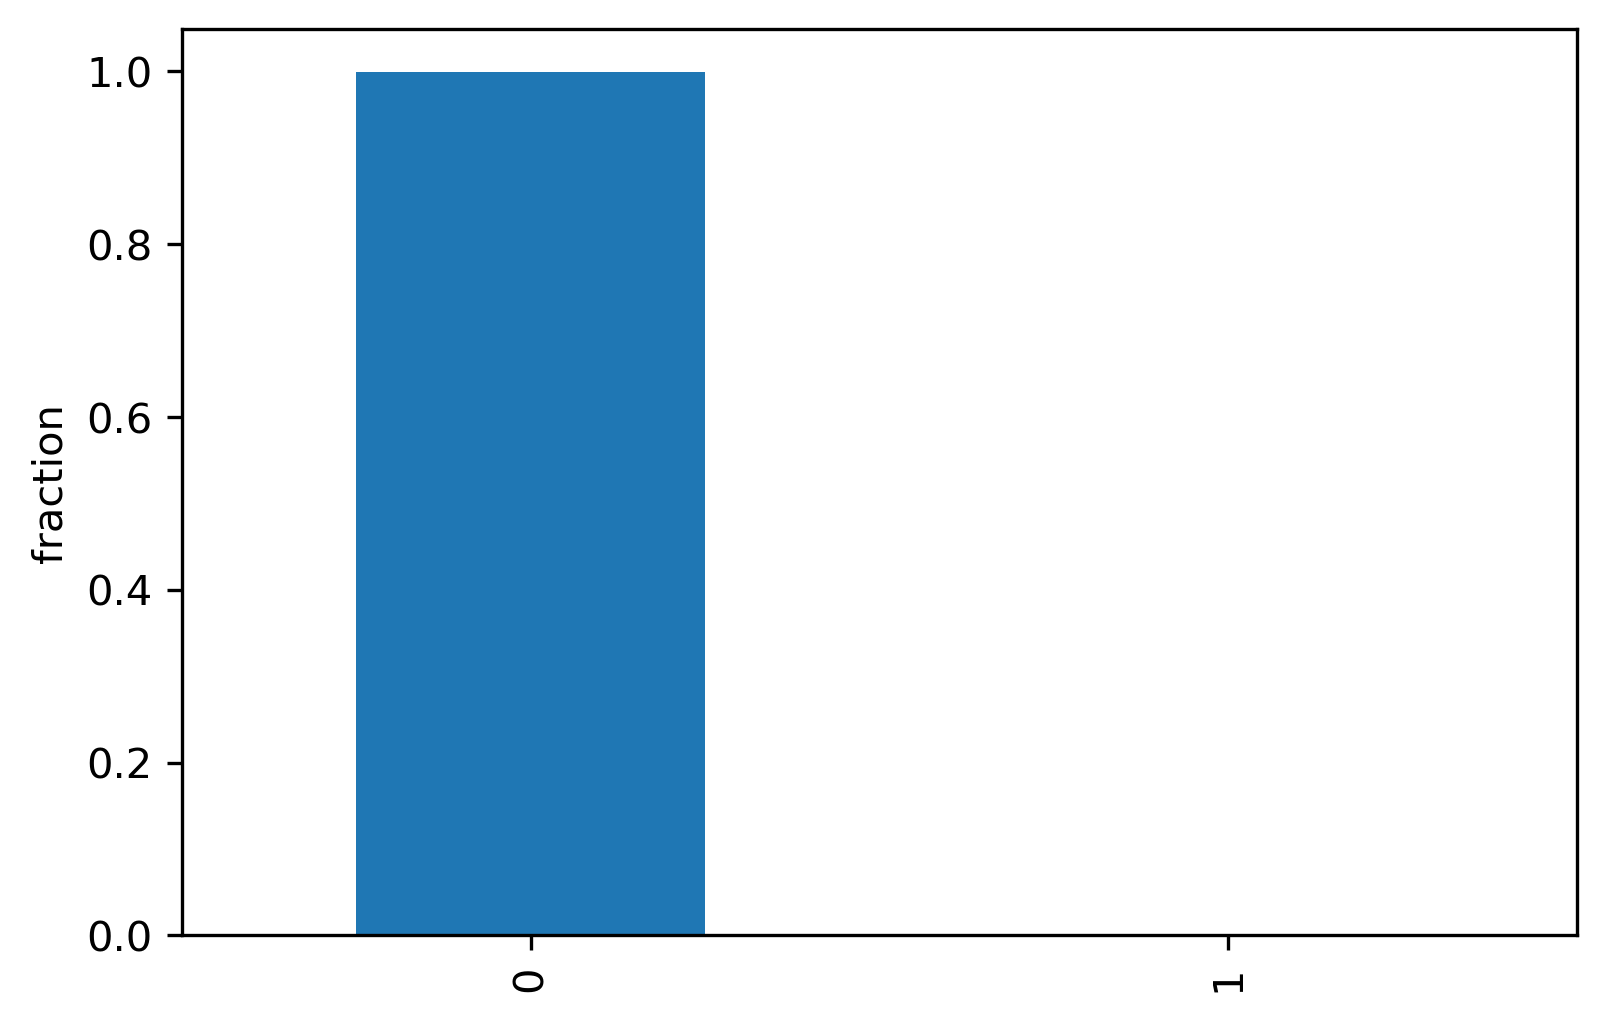

In [8]:
for threshold in thresholds:
    # We classify all values above threshold as 1, and all values <= threshold as 0
    print(f"Threshold Value: {threshold}")
    data = df[var].copy()
    data.loc[data <= threshold] = 0
    data.loc[data > threshold] = 1
    view_threshold_breakdown(data)

Consistent with our primary reference paper, we find that setting a threshold between 1314 and 1477 gives a balanced mix of popular and unpopular articles, so that is what we go with 1400. 